### Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
% matplotlib inline
import warnings
warnings.filterwarnings('ignore')

UsageError: Line magic function `%` not found.


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#Display full contents of a dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

C:\Users\seagu\AppData\Local\Temp\ipykernel_18244\2056470801.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


### Import the dataset

In [4]:
contacts=pd.read_csv('C:/Users/seagu/OneDrive/Paris/Becky-Training/training/case study/Data Challenge/Airbnb/contacts.csv')
users=pd.read_csv('C:/Users/seagu/OneDrive/Paris/Becky-Training/training/case study/Data Challenge/Airbnb/users.csv')
listings=pd.read_csv('C:/Users/seagu/OneDrive/Paris/Becky-Training/training/case study/Data Challenge/Airbnb/listings.csv')

In [5]:
contacts.index = [x for x in range(1, len(contacts.values)+1)]
contacts.index.name = 'id'
contacts.head()

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first
id,,,,,,,,,,,,,,
1,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53,2016-04-21 03:15:00.0,2016-04-21 03:15:00.0,2016-04-21 03:15:00.0,2016-08-02,2016-08-06,4.0,30,31.0,book_it,past_booker
2,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36.0,NaN,NaN,2016-08-11,2016-08-22,5.0,2,312.0,contact_me,past_booker
3,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47.0,NaN,NaN,2016-03-14,2016-03-23,1.0,3,164.0,contact_me,new
4,b0af8848-fe2a-4ef1-991e-26ab3066feb3,01614601-d5a4-4776-ab9b-c10d3b865bf0,855f6779-346c-45fc-a64b-ea133250ca7a,2016-05-05 14:42:52,2016-05-05 15:17:40.0,2016-05-05 15:17:40.0,NaN,2016-05-27,2016-05-29,2.0,3,203.0,contact_me,new
5,5ddbbcc3-ac1a-4d8a-b6f8-0f675b76d1b2,f2fed6f3-4c5c-453d-9e64-37c62b8bd06d,f2928a59-c5e7-42b2-9c37-240a40f38dc0,2016-06-23 03:09:25.0,2016-06-23 03:09:26.0,2016-06-23 03:09:33.0,2016-06-23 03:09:33.0,2016-08-19,2016-08-21,3.0,25,0.0,instant_book,past_booker


### Explore the Data

#### Preliminary examination of the data

In [42]:
contacts.info()
users.info()
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27887 entries, 1 to 27887
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id_guest_anon                         27887 non-null  object 
 1   id_host_anon                          27887 non-null  object 
 2   id_listing_anon                       27887 non-null  object 
 3   ts_interaction_first                  27887 non-null  object 
 4   ts_reply_at_first                     25855 non-null  object 
 5   ts_accepted_at_first                  16415 non-null  object 
 6   ts_booking_at                         11587 non-null  object 
 7   ds_checkin_first                      27887 non-null  object 
 8   ds_checkout_first                     27887 non-null  object 
 9   m_guests                              27886 non-null  float64
 10  m_interactions                        27887 non-null  int64  
 11  m_first_message

### Sanity Checking

In [6]:
from pandasql import sqldf
import pandasql as psql
pysqldf = lambda q: sqldf(q, globals())

#### contact_me

In [372]:
asss=contacts.groupby('contact_channel_first')['m_guests'].mean()
asss

contact_channel_first
book_it         2.631818
contact_me      3.052307
instant_book    2.457305
Name: m_guests, dtype: float64

In [44]:
contact_me=contacts[(contacts['contact_channel_first'] == 'contact_me')]
contact_me.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12828 entries, 2 to 27885
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id_guest_anon                         12828 non-null  object 
 1   id_host_anon                          12828 non-null  object 
 2   id_listing_anon                       12828 non-null  object 
 3   ts_interaction_first                  12828 non-null  object 
 4   ts_reply_at_first                     11659 non-null  object 
 5   ts_accepted_at_first                  5482 non-null   object 
 6   ts_booking_at                         911 non-null    object 
 7   ds_checkin_first                      12828 non-null  object 
 8   ds_checkout_first                     12828 non-null  object 
 9   m_guests                              12827 non-null  float64
 10  m_interactions                        12828 non-null  int64  
 11  m_first_message

In [8]:
#RUEL1: The first interaction time <= reply time <= accepted time  <= booking time
rule1 = contacts[(contacts['contact_channel_first'] == 'contact_me') & ((contacts['ts_reply_at_first'] < contacts['ts_interaction_first'])|(contacts['ts_accepted_at_first'] < contacts['ts_interaction_first'])|(contacts['ts_booking_at'] < contacts['ts_interaction_first']))]
rule1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id_guest_anon                         0 non-null      object 
 1   id_host_anon                          0 non-null      object 
 2   id_listing_anon                       0 non-null      object 
 3   ts_interaction_first                  0 non-null      object 
 4   ts_reply_at_first                     0 non-null      object 
 5   ts_accepted_at_first                  0 non-null      object 
 6   ts_booking_at                         0 non-null      object 
 7   ds_checkin_first                      0 non-null      object 
 8   ds_checkout_first                     0 non-null      object 
 9   m_guests                              0 non-null      float64
 10  m_interactions                        0 non-null      int64  
 11  m_first_message_length_in_chara

In [7]:
#Treatment
contacts.loc[(contacts['contact_channel_first'] == 'contact_me') & (contacts['ts_reply_at_first'] < contacts['ts_interaction_first']), 'ts_reply_at_first'] = contacts['ts_interaction_first']
contacts.loc[(contacts['contact_channel_first'] == 'contact_me') & (contacts['ts_accepted_at_first'] < contacts['ts_interaction_first']), 'ts_accepted_at_first'] = contacts['ts_interaction_first']

In [47]:
# def time_diff(d1, d2):
#     return abs((d2 - d1).dt.total_seconds())

# a=time_diff(rule1['ts_accepted_at_first'],rule1['ts_interaction_first'])
# a.describe()

In [48]:
# RULE#1: For contact_me method, the interaction time for each record must be the earliest time, where ts_interaction_first <= ts_reply_at_first <= ts_accepted_at_first <= ts_booking_at
rule1SQl =sqldf("""with cte as(
                select *
                from contacts
                where contact_channel_first='contact_me')

                select * from cte
                where ts_reply_at_first < ts_interaction_first OR
                ts_accepted_at_first < ts_interaction_first OR
                ts_booking_at < ts_interaction_first OR 
                ts_accepted_at_first < ts_reply_at_first OR
                ts_booking_at < ts_accepted_at_first
                """)
rule1SQl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   id                                    0 non-null      object
 1   id_guest_anon                         0 non-null      object
 2   id_host_anon                          0 non-null      object
 3   id_listing_anon                       0 non-null      object
 4   ts_interaction_first                  0 non-null      object
 5   ts_reply_at_first                     0 non-null      object
 6   ts_accepted_at_first                  0 non-null      object
 7   ts_booking_at                         0 non-null      object
 8   ds_checkin_first                      0 non-null      object
 9   ds_checkout_first                     0 non-null      object
 10  m_guests                              0 non-null      object
 11  m_interactions                        0 non-null 

#### book_it

In [49]:
book_it=contacts[(contacts['contact_channel_first'] == 'book_it')]
book_it.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8366 entries, 1 to 27880
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id_guest_anon                         8366 non-null   object 
 1   id_host_anon                          8366 non-null   object 
 2   id_listing_anon                       8366 non-null   object 
 3   ts_interaction_first                  8366 non-null   object 
 4   ts_reply_at_first                     7503 non-null   object 
 5   ts_accepted_at_first                  4240 non-null   object 
 6   ts_booking_at                         3983 non-null   object 
 7   ds_checkin_first                      8366 non-null   object 
 8   ds_checkout_first                     8366 non-null   object 
 9   m_guests                              8366 non-null   float64
 10  m_interactions                        8366 non-null   int64  
 11  m_first_message_

In [12]:
rule2 = contacts[(contacts['contact_channel_first'] == 'book_it') & ((contacts['ts_accepted_at_first'].notnull()) & (contacts['ts_booking_at'].isnull()))]
rule2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id_guest_anon                         0 non-null      object 
 1   id_host_anon                          0 non-null      object 
 2   id_listing_anon                       0 non-null      object 
 3   ts_interaction_first                  0 non-null      object 
 4   ts_reply_at_first                     0 non-null      object 
 5   ts_accepted_at_first                  0 non-null      object 
 6   ts_booking_at                         0 non-null      object 
 7   ds_checkin_first                      0 non-null      object 
 8   ds_checkout_first                     0 non-null      object 
 9   m_guests                              0 non-null      float64
 10  m_interactions                        0 non-null      int64  
 11  m_first_message_length_in_chara

In [13]:
rule21 = contacts[(contacts['contact_channel_first'] == 'book_it') & ((contacts['ts_accepted_at_first'].notnull()) & (contacts['ts_booking_at'].notnull()) & (contacts['ts_accepted_at_first'] != contacts['ts_booking_at']))]
rule21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id_guest_anon                         0 non-null      object 
 1   id_host_anon                          0 non-null      object 
 2   id_listing_anon                       0 non-null      object 
 3   ts_interaction_first                  0 non-null      object 
 4   ts_reply_at_first                     0 non-null      object 
 5   ts_accepted_at_first                  0 non-null      object 
 6   ts_booking_at                         0 non-null      object 
 7   ds_checkin_first                      0 non-null      object 
 8   ds_checkout_first                     0 non-null      object 
 9   m_guests                              0 non-null      float64
 10  m_interactions                        0 non-null      int64  
 11  m_first_message_length_in_chara

In [14]:
rule22 = contacts[(contacts['contact_channel_first'] == 'book_it') & ((contacts['ts_reply_at_first'] < contacts['ts_interaction_first'])|(contacts['ts_accepted_at_first'] < contacts['ts_interaction_first']))]
rule22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id_guest_anon                         0 non-null      object 
 1   id_host_anon                          0 non-null      object 
 2   id_listing_anon                       0 non-null      object 
 3   ts_interaction_first                  0 non-null      object 
 4   ts_reply_at_first                     0 non-null      object 
 5   ts_accepted_at_first                  0 non-null      object 
 6   ts_booking_at                         0 non-null      object 
 7   ds_checkin_first                      0 non-null      object 
 8   ds_checkout_first                     0 non-null      object 
 9   m_guests                              0 non-null      float64
 10  m_interactions                        0 non-null      int64  
 11  m_first_message_length_in_chara

In [11]:
#Treatment
contacts.loc[(contacts['contact_channel_first'] == 'book_it') & ((contacts['ts_accepted_at_first'].notnull()) & (contacts['ts_booking_at'].isnull())), 'ts_booking_at'] = contacts['ts_accepted_at_first']
contacts.loc[(contacts['contact_channel_first'] == 'book_it') & ((contacts['ts_accepted_at_first'].notnull()) & (contacts['ts_booking_at'].notnull())&(contacts['ts_accepted_at_first'] != contacts['ts_booking_at'])), 'ts_booking_at'] = contacts['ts_accepted_at_first']

contacts.loc[(contacts['contact_channel_first'] == 'book_it') & (contacts['ts_reply_at_first'] < contacts['ts_interaction_first']), 'ts_reply_at_first'] = contacts['ts_interaction_first']
contacts.loc[(contacts['contact_channel_first'] == 'book_it') & (contacts['ts_accepted_at_first'] < contacts['ts_interaction_first']), 'ts_accepted_at_first'] = contacts['ts_interaction_first']

In [14]:
rule23 = contacts[(contacts['contact_channel_first'] == 'book_it') & (contacts['ts_reply_at_first'] < contacts['ts_interaction_first'])]
rule23.info()
rule24 = contacts[(contacts['contact_channel_first'] == 'book_it') & (contacts['ts_accepted_at_first'] < contacts['ts_interaction_first'])]
rule24.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id_guest_anon                         0 non-null      object 
 1   id_host_anon                          0 non-null      object 
 2   id_listing_anon                       0 non-null      object 
 3   ts_interaction_first                  0 non-null      object 
 4   ts_reply_at_first                     0 non-null      object 
 5   ts_accepted_at_first                  0 non-null      object 
 6   ts_booking_at                         0 non-null      object 
 7   ds_checkin_first                      0 non-null      object 
 8   ds_checkout_first                     0 non-null      object 
 9   m_guests                              0 non-null      float64
 10  m_interactions                        0 non-null      int64  
 11  m_first_message_length_in_chara

In [55]:
# a=time_diff(rule23['ts_reply_at_first'],rule23['ts_interaction_first'])
# a.describe()

# b=time_diff(rule24['ts_accepted_at_first'],rule24['ts_interaction_first'])
# b.describe()

# c=time_diff(rule21['ts_accepted_at_first'],rule21['ts_booking_at'])
# c.describe()

In [56]:
# RULE#2: For book_it,The booking time cannot be null if the inquiry was accepted. The ts_interaction_first <= ts_reply_at_first <= ts_accepted_at_first = ts_booking_at
rule2 =sqldf("""with cte as(
                select *
                from contacts
                where contact_channel_first='book_it')

                select * 
                from cte
                where 
                ts_accepted_at_first != ts_booking_at OR
                ts_reply_at_first < ts_interaction_first OR
                ts_accepted_at_first < ts_interaction_first OR
                ts_booking_at < ts_interaction_first OR 
                ts_accepted_at_first < ts_reply_at_first
                """)
rule2.head()

,id,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first
0,204,cb800910-3749-46c4-b3df-21e2995ccb4f,fcfb33b2-09cc-4256-89bf-46e01a34b29f,9a517c0f-076c-4f4c-adce-4b4441ce0c7e,2016-01-06 10:21:49,2016-01-06 10:21:49,2016-01-06 10:21:49,2016-01-06 10:21:18.0,2016-01-22,2016-01-25,4.0,9,249.0,book_it,past_booker
1,995,db313e29-288d-4c7a-8882-71266a44a2d7,f5d36488-e881-4ba5-9ce0-8a971c086222,78fb1454-a6b9-49ab-8368-f1154efefeb4,2016-03-14 07:48:59,2016-03-14 07:48:59,2016-03-14 07:48:59,2016-03-14 07:47:50.0,2016-03-14,2016-03-20,2.0,6,0.0,book_it,past_booker
2,1065,86160e35-e85a-410f-b0fa-d845ca3ecd5c,a46df367-d319-4f1c-b068-8dbc0963f421,702c1801-aba7-44ab-99e9-c9076e497248,2016-04-27 02:14:59,2016-04-27 02:14:59,2016-04-27 02:14:59,2016-04-27 02:14:32.0,2016-06-30,2016-07-09,1.0,10,125.0,book_it,new
3,1090,0018eec4-d9a0-41d1-848a-727bd69b5ef8,e1a3dfbe-02f9-4426-a7a0-2899f09fdc63,392dc709-99e5-4110-a9aa-5e3ab0e3f92a,2016-06-20 15:19:54,2016-06-20 15:19:54,2016-06-20 15:19:54,2016-06-20 15:18:45.0,2016-08-19,2016-08-21,2.0,8,450.0,book_it,new
4,1523,3ea59c28-ea5e-4b02-b791-358763182a68,3ae68d59-d0a9-4c29-8b2d-dcbd933d7617,7fc6f3ed-62b1-4cff-9c0e-ee76c3bef5e3,2016-01-28 13:09:13,2016-01-28 13:09:13,2016-01-28 13:09:13,2016-01-28 13:08:55.0,2016-02-27,2016-03-12,2.0,30,253.0,book_it,past_booker


#### Instant booking

In [57]:
instant_book=contacts[(contacts['contact_channel_first'] == 'instant_book')]
instant_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6693 entries, 5 to 27887
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id_guest_anon                         6693 non-null   object 
 1   id_host_anon                          6693 non-null   object 
 2   id_listing_anon                       6693 non-null   object 
 3   ts_interaction_first                  6693 non-null   object 
 4   ts_reply_at_first                     6693 non-null   object 
 5   ts_accepted_at_first                  6693 non-null   object 
 6   ts_booking_at                         6693 non-null   object 
 7   ds_checkin_first                      6693 non-null   object 
 8   ds_checkout_first                     6693 non-null   object 
 9   m_guests                              6693 non-null   float64
 10  m_interactions                        6693 non-null   int64  
 11  m_first_message_

In [16]:
rule3 = contacts[(contacts['contact_channel_first'] == 'instant_book') & ((contacts['ts_interaction_first'] != contacts['ts_reply_at_first']) | (contacts['ts_accepted_at_first'] != contacts['ts_reply_at_first'])| (contacts['ts_reply_at_first'] != contacts['ts_accepted_at_first'])| (contacts['ts_accepted_at_first'] != contacts['ts_booking_at']))]
rule3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id_guest_anon                         0 non-null      object 
 1   id_host_anon                          0 non-null      object 
 2   id_listing_anon                       0 non-null      object 
 3   ts_interaction_first                  0 non-null      object 
 4   ts_reply_at_first                     0 non-null      object 
 5   ts_accepted_at_first                  0 non-null      object 
 6   ts_booking_at                         0 non-null      object 
 7   ds_checkin_first                      0 non-null      object 
 8   ds_checkout_first                     0 non-null      object 
 9   m_guests                              0 non-null      float64
 10  m_interactions                        0 non-null      int64  
 11  m_first_message_length_in_chara

In [15]:
#treatment
contacts.loc[(contacts['contact_channel_first'] == 'instant_book'), 'ts_accepted_at_first'] = contacts['ts_interaction_first']
contacts.loc[(contacts['contact_channel_first'] == 'instant_book'), 'ts_reply_at_first'] = contacts['ts_interaction_first']
contacts.loc[(contacts['contact_channel_first'] == 'instant_book'), 'ts_booking_at'] = contacts['ts_interaction_first']

In [60]:
# RULE#3: For instant book,since it is auto-accepted by the host,so the ts_interaction_first = ts_reply_at_first = ts_accepted_at_first =ts_booking_at
rule3_sql =sqldf("""with cte as(
                select *
                from contacts
                where contact_channel_first='instant_book')
                
                select * from cte
                where ts_interaction_first != ts_reply_at_first OR
                ts_reply_at_first != ts_accepted_at_first OR
                ts_accepted_at_first !=ts_booking_at
                """)
rule3_sql.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   id                                    0 non-null      object
 1   id_guest_anon                         0 non-null      object
 2   id_host_anon                          0 non-null      object
 3   id_listing_anon                       0 non-null      object
 4   ts_interaction_first                  0 non-null      object
 5   ts_reply_at_first                     0 non-null      object
 6   ts_accepted_at_first                  0 non-null      object
 7   ts_booking_at                         0 non-null      object
 8   ds_checkin_first                      0 non-null      object
 9   ds_checkout_first                     0 non-null      object
 10  m_guests                              0 non-null      object
 11  m_interactions                        0 non-null 

####  check in date

In [17]:
# RULE#4: The inquiry time should not be later than the check in date . 
rule4 =sqldf("""select * 
                from contacts
                where ds_checkin_first < DATE(ts_interaction_first)
                """)
rule4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    26 non-null     int64  
 1   id_guest_anon                         26 non-null     object 
 2   id_host_anon                          26 non-null     object 
 3   id_listing_anon                       26 non-null     object 
 4   ts_interaction_first                  26 non-null     object 
 5   ts_reply_at_first                     22 non-null     object 
 6   ts_accepted_at_first                  15 non-null     object 
 7   ts_booking_at                         13 non-null     object 
 8   ds_checkin_first                      26 non-null     object 
 9   ds_checkout_first                     26 non-null     object 
 10  m_guests                              26 non-null     float64
 11  m_interactions       

In [18]:
#Drop errorenous records
contacts =sqldf("""select * 
                from contacts
                where id NOT IN (select id from rule4)
                """)

In [19]:
rule4 = contacts[(contacts['ds_checkin_first'] < pd.to_datetime(contacts['ts_interaction_first'],format='%Y-%m-%d'))]
rule4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868 entries, 12 to 27847
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    868 non-null    int64  
 1   id_guest_anon                         868 non-null    object 
 2   id_host_anon                          868 non-null    object 
 3   id_listing_anon                       868 non-null    object 
 4   ts_interaction_first                  868 non-null    object 
 5   ts_reply_at_first                     797 non-null    object 
 6   ts_accepted_at_first                  572 non-null    object 
 7   ts_booking_at                         494 non-null    object 
 8   ds_checkin_first                      868 non-null    object 
 9   ds_checkout_first                     868 non-null    object 
 10  m_guests                              868 non-null    float64
 11  m_interactions  

In [20]:
# RULE#5: The check in date should not be later than the check out date.
rule5 = contacts[(contacts['ds_checkout_first'] < contacts['ds_checkin_first'])]
rule5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    0 non-null      int64  
 1   id_guest_anon                         0 non-null      object 
 2   id_host_anon                          0 non-null      object 
 3   id_listing_anon                       0 non-null      object 
 4   ts_interaction_first                  0 non-null      object 
 5   ts_reply_at_first                     0 non-null      object 
 6   ts_accepted_at_first                  0 non-null      object 
 7   ts_booking_at                         0 non-null      object 
 8   ds_checkin_first                      0 non-null      object 
 9   ds_checkout_first                     0 non-null      object 
 10  m_guests                              0 non-null      float64
 11  m_interactions                 

In [65]:
rule5 =sqldf("""select *
                from contacts
                where ds_checkout_first < ds_checkin_first
                """)
rule5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   id                                    0 non-null      object
 1   id_guest_anon                         0 non-null      object
 2   id_host_anon                          0 non-null      object
 3   id_listing_anon                       0 non-null      object
 4   ts_interaction_first                  0 non-null      object
 5   ts_reply_at_first                     0 non-null      object
 6   ts_accepted_at_first                  0 non-null      object
 7   ts_booking_at                         0 non-null      object
 8   ds_checkin_first                      0 non-null      object
 9   ds_checkout_first                     0 non-null      object
 10  m_guests                              0 non-null      object
 11  m_interactions                        0 non-null 

#### Negative Values

In [23]:
lstcheck=listings[(listings['total_reviews'] < 0)]
lstcheck.info()
ucheck1 = users[(users['words_in_user_profile'] < 0)]
ucheck1.info()
contactscheck1 = contacts[(contacts['m_interactions'] < 0)]
contactscheck1.info()
contactscheck2 = contacts[(contacts['m_first_message_length_in_characters'] < 0)]
contactscheck2.info()
contactscheck3 = contacts[(contacts['m_guests'] <= 0)]
contactscheck3.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_listing_anon       0 non-null      object 
 1   room_type             0 non-null      object 
 2   listing_neighborhood  0 non-null      object 
 3   total_reviews         0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 0.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id_user_anon           0 non-null      object
 1   country                0 non-null      object
 2   words_in_user_profile  0 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 0.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 15 columns):
 #   Column                                Non-Null Co

In [22]:
# RULE#6: Remove negative total reviews and zero number of guest
listings = listings[listings['total_reviews'] >= 0]
users = users[users['words_in_user_profile'] >= 0]
contacts = contacts[contacts['m_interactions'] >= 0]
contacts = contacts[contacts['m_first_message_length_in_characters'] >= 0]
contacts = contacts[contacts['m_guests'] > 0]

#### Duplicates

In [25]:
# RULE#7: Remove duplicate records in each table

print('Duplicated value(s) in listings dataset : ', listings.duplicated().sum())
print('Duplicated value(s) in users dataset : ', users.duplicated().sum())
print('Duplicated value(s) in contacts dataset : ', contacts.duplicated().sum())

users.drop_duplicates(keep="first", inplace=True)

Duplicated value(s) in listings dataset :  0
Duplicated value(s) in users dataset :  0
Duplicated value(s) in contacts dataset :  0


### Merge the dataset

In [26]:
contacts.info()
users.info()
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27856 entries, 0 to 27860
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    27856 non-null  int64  
 1   id_guest_anon                         27856 non-null  object 
 2   id_host_anon                          27856 non-null  object 
 3   id_listing_anon                       27856 non-null  object 
 4   ts_interaction_first                  27856 non-null  object 
 5   ts_reply_at_first                     25828 non-null  object 
 6   ts_accepted_at_first                  16398 non-null  object 
 7   ts_booking_at                         11829 non-null  object 
 8   ds_checkin_first                      27856 non-null  object 
 9   ds_checkout_first                     27856 non-null  object 
 10  m_guests                              27856 non-null  float64
 11  m_interactions 

In [27]:
data_types  = ["float32","float64","int32","int64","object","category","datetime64[ns]"]

def display_data_description(data, Numerical_data_types, categorical_data_types):
    
    print("Data Description :")
    display(data.describe().T)
    display(data.describe(include=np.object).T)

display_data_description(contacts,data_types[0:4] ,data_types[4:7])

Data Description :


,count,mean,std,min,25%,50%,75%,max
id,27856.0,13943.477312,8049.656008,1.0,6972.75,13945.5,20911.25,27887.0
m_guests,27856.0,2.783278,1.864025,1.0,2.00,2.0,4.00,16.0
m_interactions,27856.0,8.256785,10.036623,1.0,3.00,5.0,10.00,410.0
m_first_message_length_in_characters,27856.0,193.779078,183.215946,0.0,66.00,154.0,269.00,2341.0


C:\Users\seagu\AppData\Local\Temp\ipykernel_18244\3438876363.py:7: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  display(data.describe(include=np.object).T)


,count,unique,top,freq
id_guest_anon,27856,22545,25940fca-7aa9-480d-9cf0-56cc1136d30c,40
id_host_anon,27856,8956,261917c5-0378-4a79-bce6-de34ce54034a,216
id_listing_anon,27856,12812,73f9cbd5-7557-4137-9a35-7fde4e2d7ee2,31
ts_interaction_first,27856,27840,2016-01-16 13:12:53,2
ts_reply_at_first,25828,25806,2016-02-26 13:45:40.0,2
ts_accepted_at_first,16398,16391,2016-04-30 18:32:42.0,2
ts_booking_at,11829,11826,2016-05-12 17:07:49.0,2
ds_checkin_first,27856,422,2016-02-05,1227
ds_checkout_first,27856,443,2016-02-10,1447
contact_channel_first,27856,3,contact_me,12809


In [28]:
#Since the users' table contains guests and hosts, we need to create two copies, one for guests and another for hosts.
users_host = users.copy()
users_host.columns=['id_host_anon', 'country_host', 'words_in_host_profile']
users_guest = users.copy()
users_guest.columns=['id_guest_anon', 'country_guest', 'words_in_guest_profile']

In [29]:
df=pd.merge(users_host,contacts,left_on='id_host_anon',right_on='id_host_anon').merge(listings,on='id_listing_anon')
df=pd.merge(df,users_guest,left_on='id_guest_anon',right_on='id_guest_anon')
# df.index = [x for x in range(1, len(df.values)+1)]
# df.index.name = 'id'

In [30]:
df.head()

,id_host_anon,country_host,words_in_host_profile,id,id_guest_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first,room_type,listing_neighborhood,total_reviews,country_guest,words_in_guest_profile
0,55abeba0-18ef-4c58-80f4-3c278b706aca,BR,1,6803,a538ef99-ac40-481c-84f6-6edd8538bc17,bc6e220b-397f-4063-a6d1-e40e3e6b7209,2016-06-07 18:16:00,2016-06-08 13:24:46.0,2016-06-08 13:24:46.0,None,2016-12-30,2017-01-02,2.0,3,45.0,contact_me,past_booker,Entire home/apt,-unknown-,0.0,BR,0
1,01942bba-4f2a-4592-bd96-6c0eda4f828a,BR,182,19075,a538ef99-ac40-481c-84f6-6edd8538bc17,04999d40-c22a-4338-8f9f-51aa14366b7b,2016-06-07 20:14:43,2016-06-07 20:56:54.0,2016-06-07 20:59:20.0,None,2016-12-30,2017-01-02,2.0,4,48.0,contact_me,past_booker,Entire home/apt,-unknown-,10.0,BR,0
2,55abeba0-18ef-4c58-80f4-3c278b706aca,BR,1,19358,5246d8be-9a4a-4d7b-82b3-d34ec350582a,bc6e220b-397f-4063-a6d1-e40e3e6b7209,2016-05-20 17:00:37,2016-05-20 17:19:15.0,2016-05-20 17:23:20.0,None,2016-06-04,2016-07-09,1.0,8,170.0,contact_me,new,Entire home/apt,-unknown-,0.0,BR,0
3,8611da94-f6df-4ad1-ad8b-c0cee2939581,BR,25,14796,5246d8be-9a4a-4d7b-82b3-d34ec350582a,c33bd587-d6c3-489e-b37e-f108a5f38705,2016-05-21 22:39:40,2016-05-22 00:58:13.0,None,None,2016-06-04,2016-07-08,1.0,18,128.0,contact_me,new,Entire home/apt,-unknown-,4.0,BR,0
4,5d62d35a-7d6d-45dd-ae9b-a5d2f82a7d7b,BR,98,17919,767749be-227f-438f-bf95-e58bf1c53a43,5cdca497-2062-4dc3-a672-ffdc35111b7a,2016-01-11 14:04:18,2016-01-12 12:30:32.0,None,None,2016-08-15,2016-08-21,6.0,2,322.0,contact_me,new,Entire home/apt,Copacabana,1.0,BR,0


### Convert data type

In [31]:
df['ts_interaction_first']= pd.to_datetime(df['ts_interaction_first'])
df['ts_reply_at_first']= pd.to_datetime(df['ts_reply_at_first'])
df['ts_accepted_at_first']= pd.to_datetime(df['ts_accepted_at_first'])
df['ts_booking_at']= pd.to_datetime(df['ts_booking_at'])

In [32]:
df['ds_checkin_first']= pd.to_datetime(df['ds_checkin_first'],format='%Y-%m-%d')
df['ds_checkout_first']= pd.to_datetime(df['ds_checkout_first'],format='%Y-%m-%d')

In [33]:
df['guest_user_stage_first'].replace('-unknown-', np.nan, inplace=True)
df['listing_neighborhood'].replace('-unknown-', np.nan, inplace=True)

In [34]:
df['Booked'] = pd.to_datetime(df['ts_booking_at'], errors='coerce').notna().astype(int)
df['Accepted'] = pd.to_datetime(df['ts_accepted_at_first'], errors='coerce').notna().astype(int)
df['Replied'] = pd.to_datetime(df['ts_reply_at_first'], errors='coerce').notna().astype(int)

In [35]:
display_data_description(df,data_types[0:4] ,data_types[4:7])

Data Description :


,count,mean,std,min,25%,50%,75%,max
words_in_host_profile,27764.0,53.932611,102.284985,0.0,1.00,21.0,63.00,1460.0
id,27764.0,13944.925983,8049.431471,1.0,6977.75,13948.5,20910.25,27887.0
m_guests,27764.0,2.784901,1.865671,1.0,2.00,2.0,4.00,16.0
m_interactions,27764.0,8.253170,10.032360,1.0,3.00,5.0,10.00,410.0
m_first_message_length_in_characters,27764.0,193.766856,183.165776,0.0,66.00,154.0,269.00,2341.0
total_reviews,27764.0,15.767541,27.712035,0.0,0.00,3.0,18.00,268.0
words_in_guest_profile,27764.0,10.088100,30.506105,0.0,0.00,0.0,1.00,658.0
Booked,27764.0,0.424759,0.494315,0.0,0.00,0.0,1.00,1.0
Accepted,27764.0,0.588604,0.492096,0.0,0.00,1.0,1.00,1.0
Replied,27764.0,0.927136,0.259918,0.0,1.00,1.0,1.00,1.0


C:\Users\seagu\AppData\Local\Temp\ipykernel_18244\3438876363.py:7: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  display(data.describe(include=np.object).T)


,count,unique,top,freq
id_host_anon,27764,8926,261917c5-0378-4a79-bce6-de34ce54034a,216
country_host,27764,26,BR,27450
id_guest_anon,27764,22488,25940fca-7aa9-480d-9cf0-56cc1136d30c,40
id_listing_anon,27764,12771,73f9cbd5-7557-4137-9a35-7fde4e2d7ee2,31
contact_channel_first,27764,3,contact_me,12768
guest_user_stage_first,27729,2,new,15835
room_type,27764,3,Entire home/apt,20901
listing_neighborhood,16002,67,Copacabana,6518
country_guest,27763,121,BR,13549


In [39]:
df.head()

,id_host_anon,country_host,words_in_host_profile,id,id_guest_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first,room_type,listing_neighborhood,total_reviews,country_guest,words_in_guest_profile,Booked,Accepted,Replied
0,55abeba0-18ef-4c58-80f4-3c278b706aca,BR,1,6803,a538ef99-ac40-481c-84f6-6edd8538bc17,bc6e220b-397f-4063-a6d1-e40e3e6b7209,2016-06-07 18:16:00,2016-06-08 13:24:46,2016-06-08 13:24:46,NaT,2016-12-30,2017-01-02,2.0,3,45.0,contact_me,past_booker,Entire home/apt,NaN,0.0,BR,0,0,1,1
1,01942bba-4f2a-4592-bd96-6c0eda4f828a,BR,182,19075,a538ef99-ac40-481c-84f6-6edd8538bc17,04999d40-c22a-4338-8f9f-51aa14366b7b,2016-06-07 20:14:43,2016-06-07 20:56:54,2016-06-07 20:59:20,NaT,2016-12-30,2017-01-02,2.0,4,48.0,contact_me,past_booker,Entire home/apt,NaN,10.0,BR,0,0,1,1
2,55abeba0-18ef-4c58-80f4-3c278b706aca,BR,1,19358,5246d8be-9a4a-4d7b-82b3-d34ec350582a,bc6e220b-397f-4063-a6d1-e40e3e6b7209,2016-05-20 17:00:37,2016-05-20 17:19:15,2016-05-20 17:23:20,NaT,2016-06-04,2016-07-09,1.0,8,170.0,contact_me,new,Entire home/apt,NaN,0.0,BR,0,0,1,1
3,8611da94-f6df-4ad1-ad8b-c0cee2939581,BR,25,14796,5246d8be-9a4a-4d7b-82b3-d34ec350582a,c33bd587-d6c3-489e-b37e-f108a5f38705,2016-05-21 22:39:40,2016-05-22 00:58:13,NaT,NaT,2016-06-04,2016-07-08,1.0,18,128.0,contact_me,new,Entire home/apt,NaN,4.0,BR,0,0,0,1
4,5d62d35a-7d6d-45dd-ae9b-a5d2f82a7d7b,BR,98,17919,767749be-227f-438f-bf95-e58bf1c53a43,5cdca497-2062-4dc3-a672-ffdc35111b7a,2016-01-11 14:04:18,2016-01-12 12:30:32,NaT,NaT,2016-08-15,2016-08-21,6.0,2,322.0,contact_me,new,Entire home/apt,Copacabana,1.0,BR,0,0,0,1


------

### Univariate analysis:

In [36]:
contact_me=df[(df['contact_channel_first'] == 'contact_me')]
book_it=df[(df['contact_channel_first'] == 'book_it')]
instant_book=df[(df['contact_channel_first'] == 'instant_book')]

In [80]:
'#00A699','#FC642D','#484848'

('#00A699', '#FC642D', '#484848')

In [39]:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom", fontsize = 7.5)

#### Continuous Variabls

##### Number of guest per booking

<Figure size 800x400 with 0 Axes>

<AxesSubplot:xlabel='m_guests', ylabel='Count'>

Text(0.5, 1.0, 'For all inquiries through 3 channels')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Number of guest')

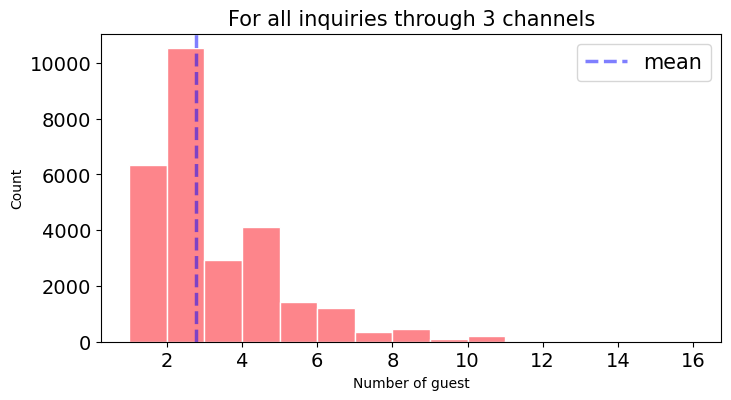

In [169]:
plt.figure(figsize=[8,4])
sns.histplot(data=df, x='m_guests',binwidth=1,color='#FD5C64',edgecolor="white")

plt.axvline(x=df['m_guests'].mean(),color='blue',ls='--', lw=2.5, label="mean", alpha=0.5)
plt.legend(fontsize=15)

plt.title("For all inquiries through 3 channels", fontsize=15)
plt.ylabel('Count')
plt.xlabel('Number of guest')
plt.tick_params(axis='both', which='major', labelsize=14)

Text(0.5, 1.0, 'All inquiries in contact_me')

Text(0.5, 0, 'Number of guest')

Text(0.5, 1.0, 'All inquiries in book_it')

Text(0.5, 0, 'Number of guest')

(0.0, 16.0)

Text(0.5, 1.0, 'All inquiries in instant_book')

Text(0.5, 0, 'Number of guest')

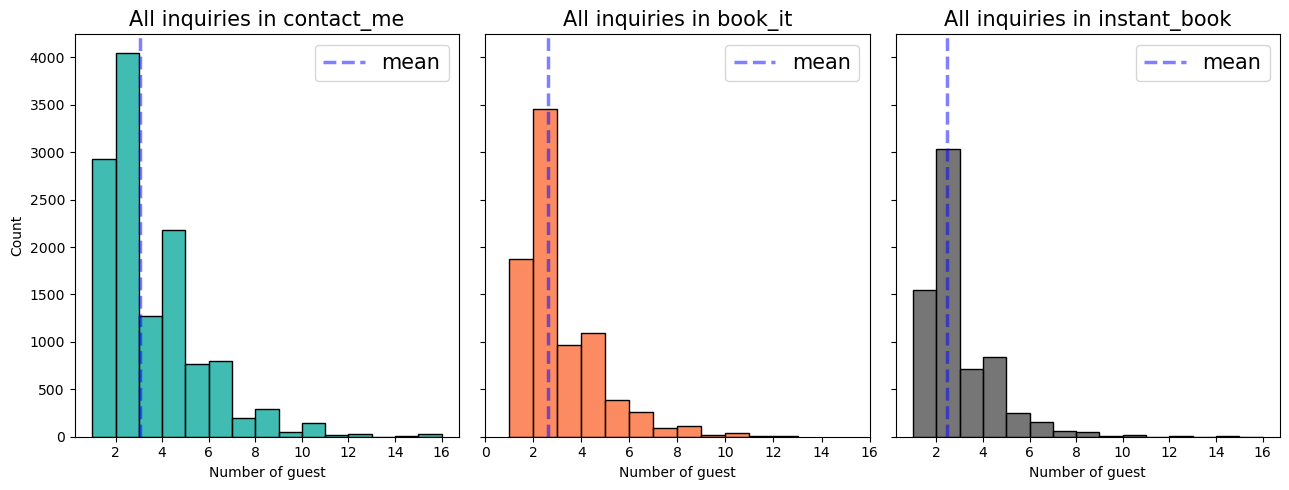

In [83]:
fig, axs = plt.subplots(ncols=3, sharey=True, figsize=(13,5))
axs[0].set_title('All inquiries in contact_me', size=15)
axs[0].set_xlabel('Number of guest')
axs[1].set_title('All inquiries in book_it', size=15)
axs[1].set_xlabel('Number of guest')
axs[1].set_xlim(left=0, right=16)
axs[2].set_title('All inquiries in instant_book', size=15)
axs[2].set_xlabel('Number of guest')

ax1=sns.histplot(data=contact_me, x="m_guests",binwidth=1,color='#00A699',ax=axs[0])
ax1.axvline(x=contact_me['m_guests'].mean(),color='blue',ls='--', lw=2.5, label="mean", alpha=0.5)
ax1.legend(fontsize=15)

ax2=sns.histplot(data=book_it, x="m_guests",binwidth=1,color='#FC642D',ax=axs[1])
ax2.axvline(x=book_it['m_guests'].mean(),color='blue',ls='--', lw=2.5, label="mean", alpha=0.5)
ax2.legend(fontsize=15)

ax3=sns.histplot(data=instant_book, x="m_guests",binwidth=1,color='#484848',ax=axs[2])
ax3.axvline(x=instant_book['m_guests'].mean(),color='blue',ls='--', lw=2.5, label="mean", alpha=0.5)
ax3.legend(fontsize=15)
fig.tight_layout()

##### Length of Stay

In [285]:
#Length of Stay
def duration(d1, d2):
    return abs((d2 - d1).dt.days)
df['length_of_stay']=duration(df['ds_checkout_first'],df['ds_checkin_first'])

<Figure size 800x400 with 0 Axes>

<AxesSubplot:xlabel='length_of_stay', ylabel='Count'>

(0.0, 21.0)

Text(0.5, 1.0, 'For all inquiries through 3 channels')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Length of Stay (Days)')

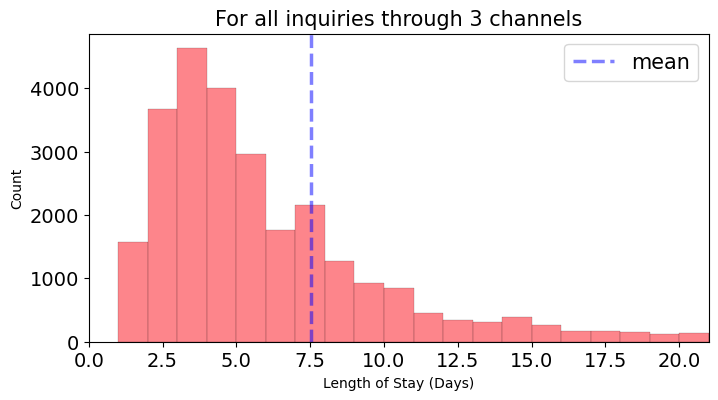

In [293]:
plt.figure(figsize=[8,4])
sns.histplot(data=df, x='length_of_stay',binwidth=1,color='#FD5C64')
plt.xlim(0,21)

plt.axvline(x=df['length_of_stay'].mean(),color='blue',ls='--', lw=2.5, label="mean", alpha=0.5)
plt.legend(fontsize=15)

plt.title("For all inquiries through 3 channels", fontsize=15)
plt.ylabel('Count')
plt.xlabel('Length of Stay (Days)')
plt.tick_params(axis='both', which='major', labelsize=14)

Text(0.5, 1.0, 'All inquiries in contact_me')

(0.0, 40.0)

Text(0.5, 0, 'Length of Stay (Days)')

Text(0.5, 1.0, 'All inquiries in book_it')

(0.0, 40.0)

Text(0.5, 0, 'Length of Stay (Days)')

Text(0.5, 1.0, 'All inquiries in instant_book')

(0.0, 40.0)

Text(0.5, 0, 'Length of Stay (Days)')

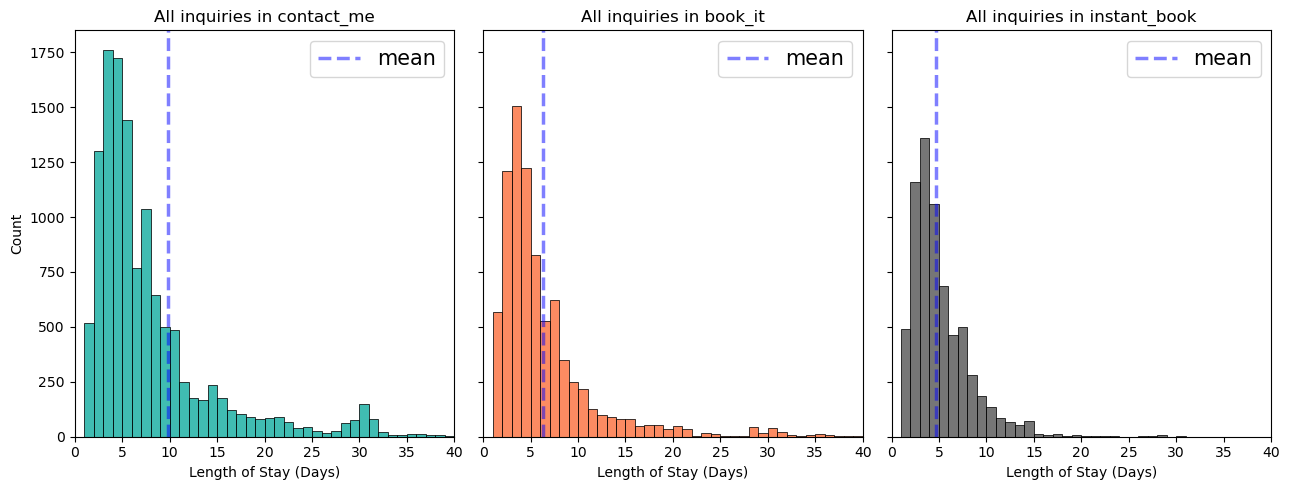

In [255]:
fig, axs = plt.subplots(ncols=3, sharey=True, figsize=(13,5))
axs[0].set_title('All inquiries in contact_me')
axs[0].set_xlim(left=0, right=40)
axs[0].set_xlabel('Length of Stay (Days)')
axs[1].set_title('All inquiries in book_it')
axs[1].set_xlim(left=0, right=40)
axs[1].set_xlabel('Length of Stay (Days)')
axs[2].set_title('All inquiries in instant_book')
axs[2].set_xlim(left=0, right=40)
axs[2].set_xlabel('Length of Stay (Days)')

ax1=sns.histplot(data=contact_me, x="length_of_stay",binwidth=1,color='#00A699',ax=axs[0])
ax1.axvline(x=contact_me['length_of_stay'].mean(),color='blue',ls='--', lw=2.5, label="mean", alpha=0.5)
ax1.legend(fontsize=15)

ax2=sns.histplot(data=book_it, x="length_of_stay",binwidth=1,color='#FC642D',ax=axs[1])
ax2.axvline(x=book_it['length_of_stay'].mean(),color='blue',ls='--', lw=2.5, label="mean", alpha=0.5)
ax2.legend(fontsize=15)

ax3=sns.histplot(data=instant_book, x="length_of_stay",binwidth=1,color='#484848',ax=axs[2])
ax3.axvline(x=instant_book['length_of_stay'].mean(),color='blue',ls='--', lw=2.5, label="mean", alpha=0.5)
ax3.legend(fontsize=15)
fig.tight_layout()


<AxesSubplot:xlabel='length_of_stay', ylabel='contact_channel_first'>

(0.0, 400.0)

Text(0.5, 1.0, 'For inquiries in each channel')

Text(0.5, 0, 'Length of Stay (Days)')

Text(0, 0.5, 'Contact Channel')

<Figure size 1500x2000 with 0 Axes>

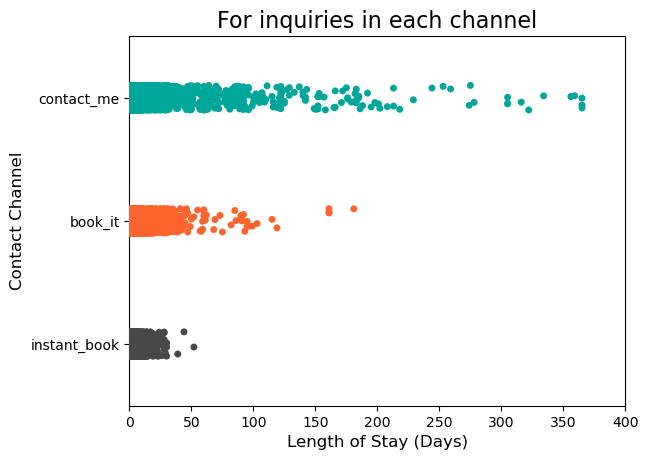

<Figure size 1500x2000 with 0 Axes>

In [87]:
sns.stripplot(x='length_of_stay',y='contact_channel_first',data=df,palette=['#00A699','#FC642D','#484848'])
plt.xlim(0,400)
plt.title("For inquiries in each channel", fontsize=16)
plt.xlabel('Length of Stay (Days)',fontsize=12)
plt.ylabel('Contact Channel',fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.figure(figsize=[15,20])

<Figure size 1200x800 with 0 Axes>

(0.0, 40.0)

<AxesSubplot:xlabel='length_of_stay', ylabel='contact_channel_first'>

Text(0.5, 1.0, 'For inquiries in each channel')

Text(0.5, 0, 'Number of guest per inquiry')

Text(0, 0.5, 'Contact Channel')

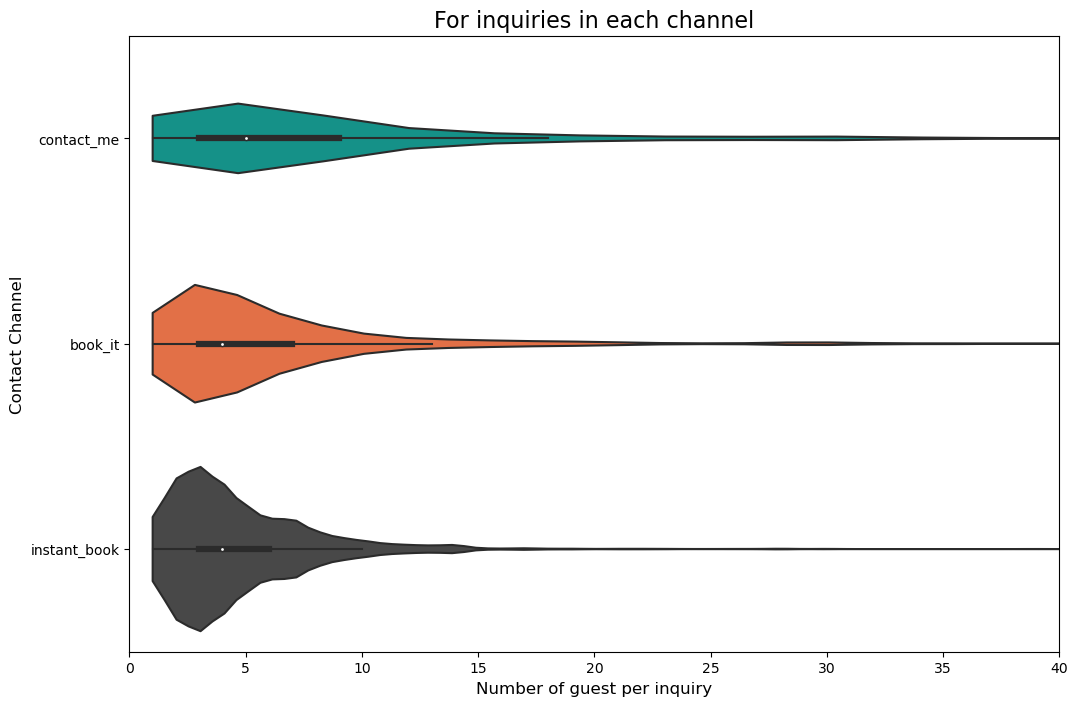

In [88]:
plt.figure(figsize=[12,8])
plt.xlim(0,40)
sns.violinplot(data=df,x='length_of_stay',y='contact_channel_first',cut=0, bw=.15,palette=['#00A699','#FC642D','#484848'])
plt.title("For inquiries in each channel", fontsize=16)
plt.xlabel('Number of guest per inquiry',fontsize=12)
plt.ylabel('Contact Channel',fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)


21.0

<AxesSubplot:ylabel='length_of_stay'>

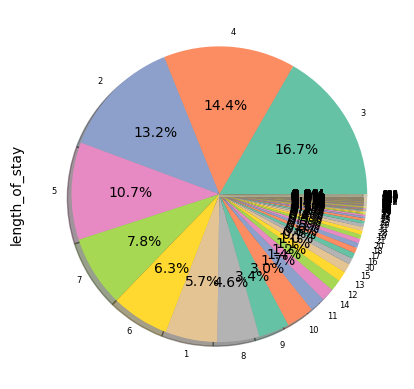

In [ ]:
np.percentile(df['length_of_stay'],95)
df['length_of_stay'].value_counts().plot.pie(legend=False,autopct='%1.1f%%',shadow=True,startangle=0)

##### m_interactions

<Figure size 800x500 with 0 Axes>

<AxesSubplot:xlabel='m_interactions', ylabel='Count'>

(0.0, 25.0)

Text(0.5, 1.0, 'For all inquiries through 3 channels')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Number of Interactions')

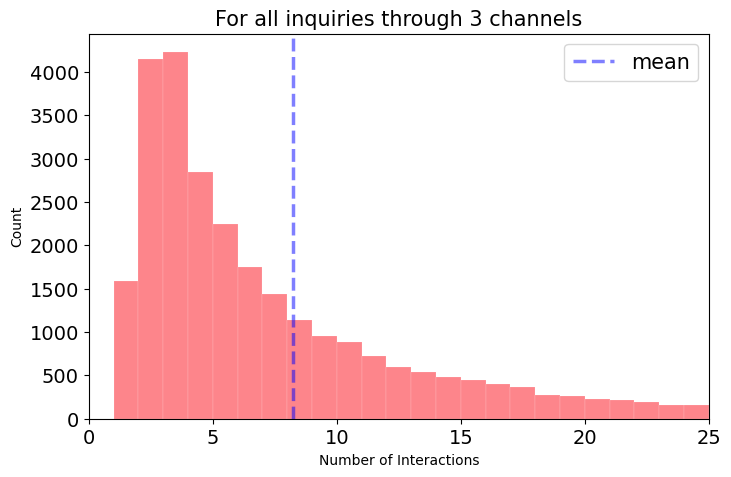

In [281]:
plt.figure(figsize=[8,5])
sns.histplot(data=df, x='m_interactions',binwidth=1,color='#FD5C64',edgecolor="white")
plt.xlim(0,25)

plt.axvline(x=df['m_interactions'].mean(),color='blue',ls='--', lw=2.5, label="mean", alpha=0.5)
plt.legend(fontsize=15)

plt.title("For all inquiries through 3 channels", fontsize=15)
plt.ylabel('Count')
plt.xlabel('Number of Interactions')
plt.tick_params(axis='both', which='major', labelsize=14)

Text(0.5, 1.0, 'All inquiries in contact_me')

(0.0, 50.0)

Text(0.5, 0, 'Number of Interactions')

Text(0.5, 1.0, 'All inquiries in book_it')

(0.0, 50.0)

Text(0.5, 0, 'Number of Interactions')

Text(0.5, 1.0, 'All inquiries in instant_book')

(0.0, 50.0)

Text(0.5, 0, 'Number of Interactions')

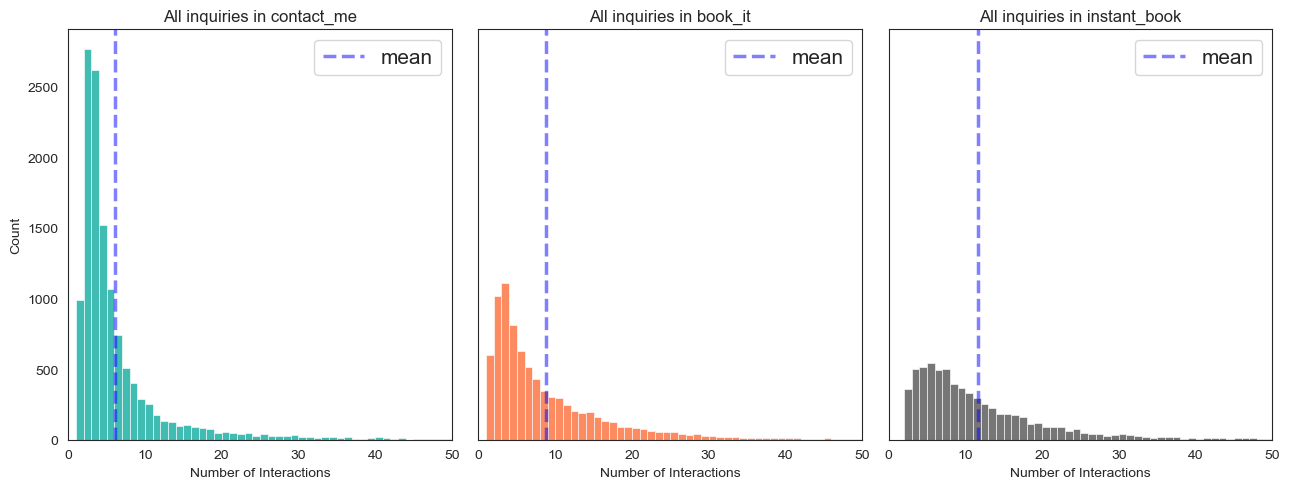

In [ ]:
fig, axs = plt.subplots(ncols=3, sharey=True, figsize=(13,5))
axs[0].set_title('All inquiries in contact_me')
axs[0].set_xlim(left=0, right=50)
axs[0].set_xlabel('Number of Interactions')
axs[1].set_title('All inquiries in book_it')
axs[1].set_xlim(left=0, right=50)
axs[1].set_xlabel('Number of Interactions')
axs[2].set_title('All inquiries in instant_book')
axs[2].set_xlim(left=0, right=50)
axs[2].set_xlabel('Number of Interactions')

ax1=sns.histplot(data=contact_me, x="m_interactions",binwidth=1,color='#00A699',ax=axs[0])
ax1.axvline(x=contact_me['m_interactions'].mean(),color='blue',ls='--', lw=2.5, label="mean", alpha=0.5)
ax1.legend(fontsize=15)

ax2=sns.histplot(data=book_it, x="m_interactions",binwidth=1,color='#FC642D',ax=axs[1])
ax2.axvline(x=book_it['m_interactions'].mean(),color='blue',ls='--', lw=2.5, label="mean", alpha=0.5)
ax2.legend(fontsize=15)

ax3=sns.histplot(data=instant_book, x="m_interactions",binwidth=1,color='#484848',ax=axs[2])
ax3.axvline(x=instant_book['m_interactions'].mean(),color='blue',ls='--', lw=2.5, label="mean", alpha=0.5)
ax3.legend(fontsize=15)
fig.tight_layout()

In [ ]:
book_it['m_interactions'].mean()

8.844831730769231

##### m_first_message_length_in_characters

In [256]:
np.percentile(df['m_first_message_length_in_characters'],95)

539.0

<Figure size 800x500 with 0 Axes>

<AxesSubplot:xlabel='m_first_message_length_in_characters', ylabel='Count'>

(0.0, 500.0)

Text(0.5, 1.0, 'For all inquiries through 3 channels')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'message length (character)')

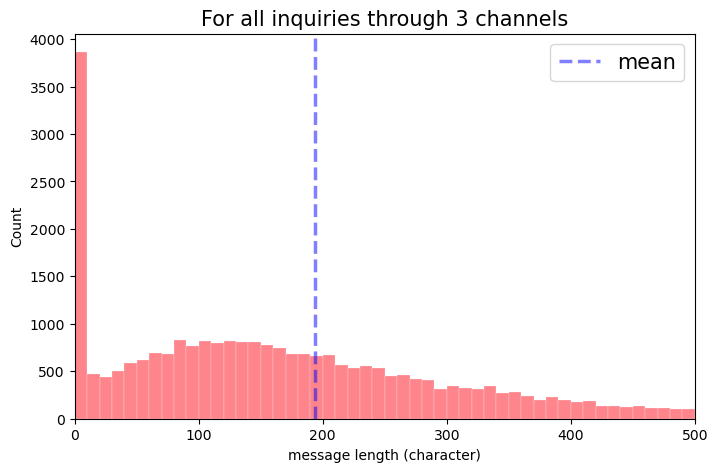

In [267]:
plt.figure(figsize=[8,5])
sns.histplot(data=df,x='m_first_message_length_in_characters',binwidth=10,color='#FD5C64',edgecolor="white")
plt.xlim(0,500)

plt.axvline(x=df['m_first_message_length_in_characters'].mean(),color='blue',ls='--', lw=2.5, label="mean", alpha=0.5)
plt.legend(fontsize=15)

plt.title("For all inquiries through 3 channels", fontsize=15)
plt.ylabel('Count')
plt.xlabel('message length (character)')

Text(0.5, 1.0, 'All inquiries in contact_me')

(0.0, 500.0)

Text(0.5, 1.0, 'All inquiries in book_it')

(0.0, 500.0)

Text(0.5, 1.0, 'All inquiries in instant_book')

(0.0, 500.0)

Text(0.5, 0, 'message length (character)')

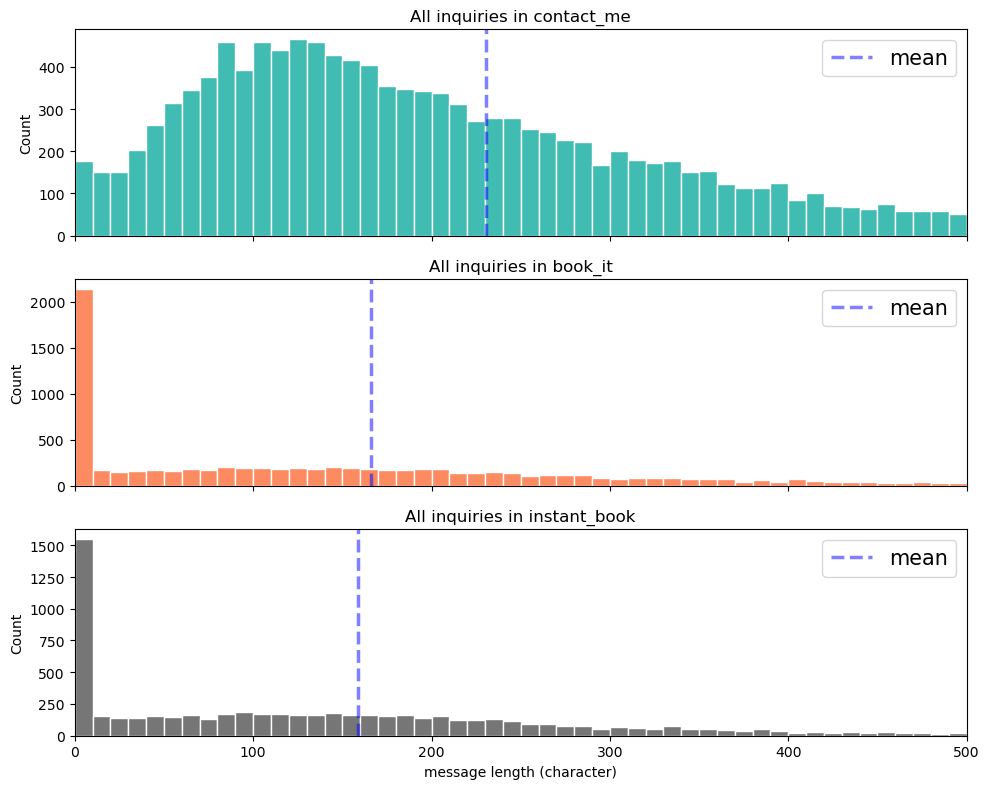

In [264]:
fig, axs = plt.subplots(nrows=3, sharex=True, figsize=(10,8))
axs[0].set_title('All inquiries in contact_me')
axs[0].set_xlim(left=0, right=500)
axs[1].set_title('All inquiries in book_it')
axs[1].set_xlim(left=0, right=500)
axs[2].set_title('All inquiries in instant_book')
axs[2].set_xlim(left=0, right=500)
axs[2].set_xlabel('message length (character)')

ax1=sns.histplot(data=contact_me, x="m_first_message_length_in_characters",binwidth=10,color='#00A699',ax=axs[0],edgecolor="white")
ax1.axvline(x=contact_me['m_first_message_length_in_characters'].mean(),color='blue',ls='--', lw=2.5, label="mean", alpha=0.5)
ax1.legend(fontsize=15)

ax2=sns.histplot(data=book_it, x="m_first_message_length_in_characters",binwidth=10,color='#FC642D',ax=axs[1],edgecolor="white")
ax2.axvline(x=book_it['m_first_message_length_in_characters'].mean(),color='blue',ls='--', lw=2.5, label="mean", alpha=0.5)
ax2.legend(fontsize=15)

ax3=sns.histplot(data=instant_book, x="m_first_message_length_in_characters",binwidth=10,color='#484848',ax=axs[2],edgecolor="white")
ax3.axvline(x=instant_book['m_first_message_length_in_characters'].mean(),color='blue',ls='--', lw=2.5, label="mean", alpha=0.5)
ax3.legend(fontsize=15)
fig.tight_layout()

##### Booking Lead Time

In [45]:
#Booking Lead Time
def duration(d1, d2):
    return abs((d2 - d1).dt.days/7)
df['Lead_Time']=duration(df['ts_interaction_first'],df['ds_checkin_first'])

<Figure size 800x500 with 0 Axes>

<AxesSubplot:xlabel='Lead_Time', ylabel='Count'>

(0.0, 114.0)

Text(0.5, 1.0, 'For all inquiries through 3 channels')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Lead Time (Weeks)')

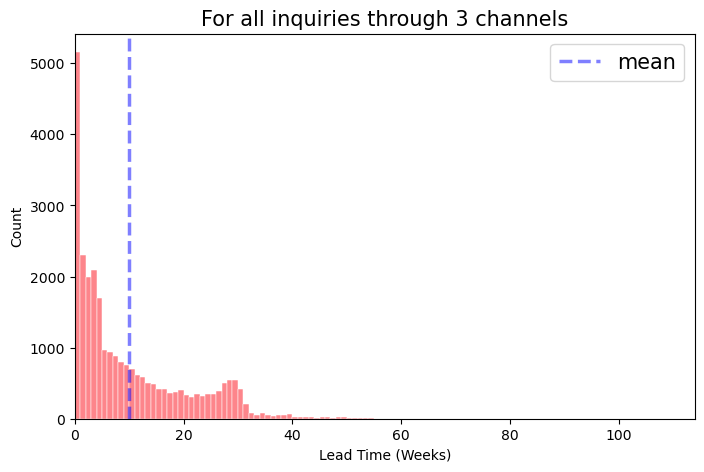

In [58]:
plt.figure(figsize=[8,5])
sns.histplot(data=df, x='Lead_Time',binwidth=1,color='#FD5C64',edgecolor="white")
plt.xlim(0,114)

plt.axvline(x=df['Lead_Time'].mean(),color='blue',ls='--', lw=2.5, label="mean", alpha=0.5)
plt.legend(fontsize=15)

plt.title("For all inquiries through 3 channels", fontsize=15)
plt.ylabel('Count')
plt.xlabel('Lead Time (Weeks)')

In [49]:
np.percentile(df['Lead_Time'],95)

29.857142857142858

In [52]:
df['Lead_Time'].describe()

count    27764.000000
mean     9.893042    
std      10.423179   
min      0.000000    
25%      1.714286    
50%      5.571429    
75%      15.857143   
max      114.714286  
Name: Lead_Time, dtype: float64

<Figure size 800x500 with 0 Axes>

<AxesSubplot:xlabel='Book_in_advance', ylabel='Count'>

(0.0, 250.0)

Text(0.5, 1.0, 'For all inquiries through 3 channels')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Lead Time (Day)')

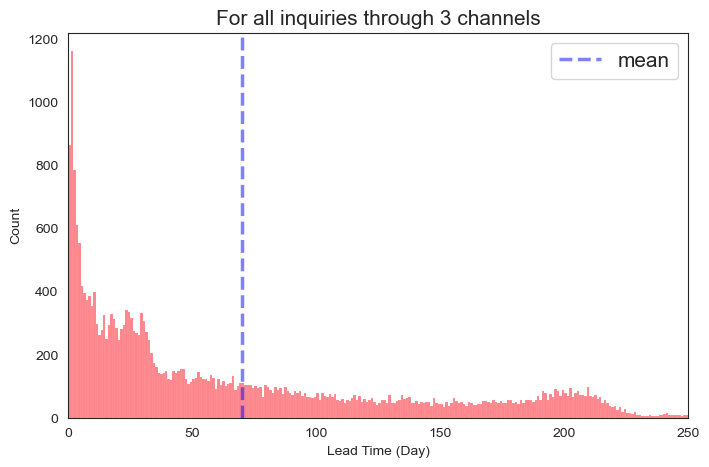

In [ ]:
plt.figure(figsize=[8,5])
sns.histplot(data=df, x='Book_in_advance',binwidth=1,color='#FD5C64',edgecolor="white")
plt.xlim(0,250)

plt.axvline(x=df['Book_in_advance'].mean(),color='blue',ls='--', lw=2.5, label="mean", alpha=0.5)
plt.legend(fontsize=15)

plt.title("For all inquiries through 3 channels", fontsize=15)
plt.ylabel('Count')
plt.xlabel('Lead Time (Day)')

<AxesSubplot:xlabel='Book_in_advance', ylabel='contact_channel_first'>

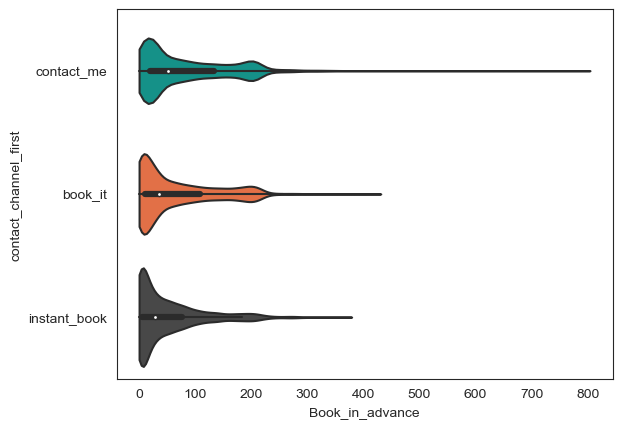

In [ ]:
sns.violinplot(data=df,x='Book_in_advance',y='contact_channel_first',cut=0, bw=.15,palette=['#00A699','#FC642D','#484848'])

Text(0.5, 1.0, 'All inquiries in contact_me')

Text(0.5, 0, 'Lead Time (Week)')

Text(0.5, 1.0, 'All inquiries in book_it')

Text(0.5, 0, 'Lead Time (Week)')

Text(0.5, 1.0, 'All inquiries in instant_book')

Text(0.5, 0, 'Lead Time (Week)')

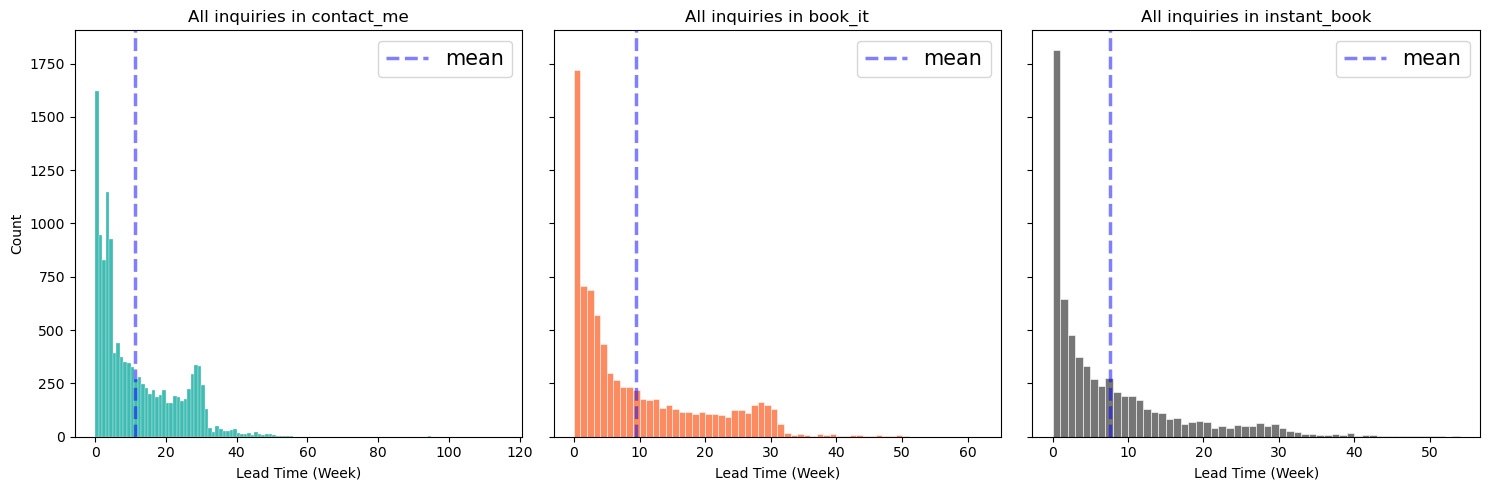

In [57]:
fig, axs = plt.subplots(ncols=3, sharey=True, figsize=(15,5))
axs[0].set_title('All inquiries in contact_me')
# axs[0].set_xlim(left=0, right=250)
axs[0].set_xlabel('Lead Time (Week)')
axs[1].set_title('All inquiries in book_it')
# axs[1].set_xlim(left=0, right=250)
axs[1].set_xlabel('Lead Time (Week)')
axs[2].set_title('All inquiries in instant_book')
# axs[2].set_xlim(left=0, right=250)
axs[2].set_xlabel('Lead Time (Week)')

ax1=sns.histplot(data=contact_me, x="Lead_Time",binwidth=1,color='#00A699',ax=axs[0],edgecolor="white")
ax1.axvline(x=contact_me['Lead_Time'].mean(),color='blue',ls='--', lw=2.5, label="mean", alpha=0.5)
ax1.legend(fontsize=15)

ax2=sns.histplot(data=book_it, x="Lead_Time",binwidth=1,color='#FC642D',ax=axs[1],edgecolor="white")
ax2.axvline(x=book_it['Lead_Time'].mean(),color='blue',ls='--', lw=2.5, label="mean", alpha=0.5)
ax2.legend(fontsize=15)

ax3=sns.histplot(data=instant_book, x="Lead_Time",binwidth=1,color='#484848',ax=axs[2],edgecolor="white")
ax3.axvline(x=instant_book['Lead_Time'].mean(),color='blue',ls='--', lw=2.5, label="mean", alpha=0.5)
ax3.legend(fontsize=15)
fig.tight_layout()

##### Total review 

<Figure size 800x500 with 0 Axes>

<AxesSubplot:xlabel='total_reviews', ylabel='Count'>

(0.0, 73.0)

Text(0.5, 1.0, 'For all inquiries through 3 channels')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Number of Review')

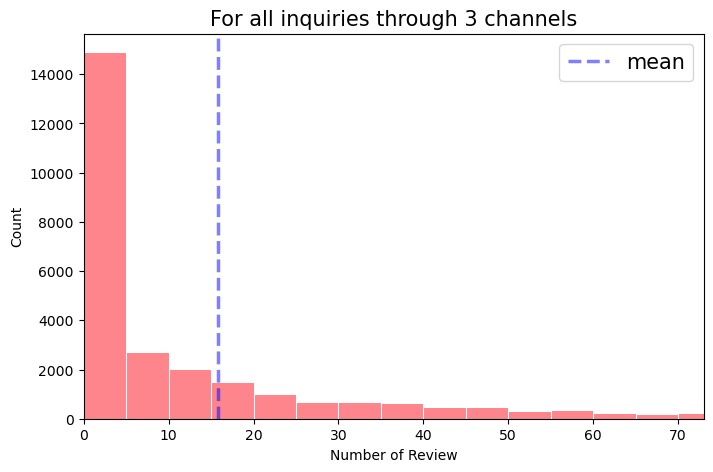

In [35]:
plt.figure(figsize=[8,5])
sns.histplot(data=df,x='total_reviews',binwidth=5,color='#FD5C64',edgecolor="white")
plt.xlim(0,73)

plt.axvline(x=df['total_reviews'].mean(),color='blue',ls='--', lw=2.5, label="mean", alpha=0.5)
plt.legend(fontsize=15)

plt.title("For all inquiries through 3 channels", fontsize=15)
plt.ylabel('Count')
plt.xlabel('Number of Review')

Text(0.5, 1.0, 'All inquiries in contact_me')

(0.0, 73.0)

Text(0.5, 1.0, 'All inquiries in book_it')

(0.0, 73.0)

Text(0.5, 1.0, 'All inquiries in instant_book')

(0.0, 73.0)

Text(0.5, 0, 'Number of Review')

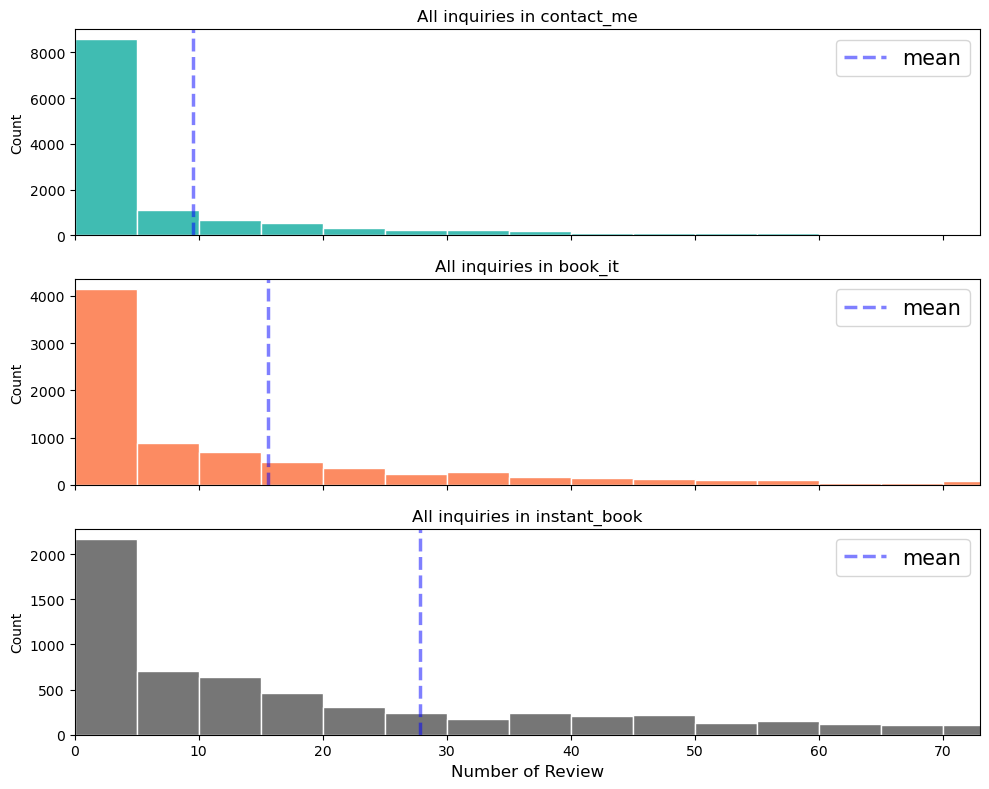

In [283]:
fig, axs = plt.subplots(nrows=3, sharex=True, figsize=(10,8))
axs[0].set_title('All inquiries in contact_me')
axs[0].set_xlim(left=0, right=73)
axs[1].set_title('All inquiries in book_it')
axs[1].set_xlim(left=0, right=73)
axs[2].set_title('All inquiries in instant_book')
axs[2].set_xlim(left=0, right=73)
axs[2].set_xlabel('Number of Review',size=12)

ax1=sns.histplot(data=contact_me, x="total_reviews",binwidth=5,color='#00A699',ax=axs[0],edgecolor="white")
ax1.axvline(x=contact_me['total_reviews'].mean(),color='blue',ls='--', lw=2.5, label="mean", alpha=0.5)
ax1.legend(fontsize=15)

ax2=sns.histplot(data=book_it, x="total_reviews",binwidth=5,color='#FC642D',ax=axs[1],edgecolor="white")
ax2.axvline(x=book_it['total_reviews'].mean(),color='blue',ls='--', lw=2.5, label="mean", alpha=0.5)
ax2.legend(fontsize=15)

ax3=sns.histplot(data=instant_book, x="total_reviews",binwidth=5,color='#484848',ax=axs[2],edgecolor="white")
ax3.axvline(x=instant_book['total_reviews'].mean(),color='blue',ls='--', lw=2.5, label="mean", alpha=0.5)
ax3.legend(fontsize=15)
fig.tight_layout()

<Figure size 1200x800 with 0 Axes>

<AxesSubplot:xlabel='total_reviews', ylabel='contact_channel_first'>

Text(0.5, 1.0, 'For inquiries in each channel')

Text(0.5, 0, 'Number of guest per inquiry')

Text(0, 0.5, 'Contact Channel')

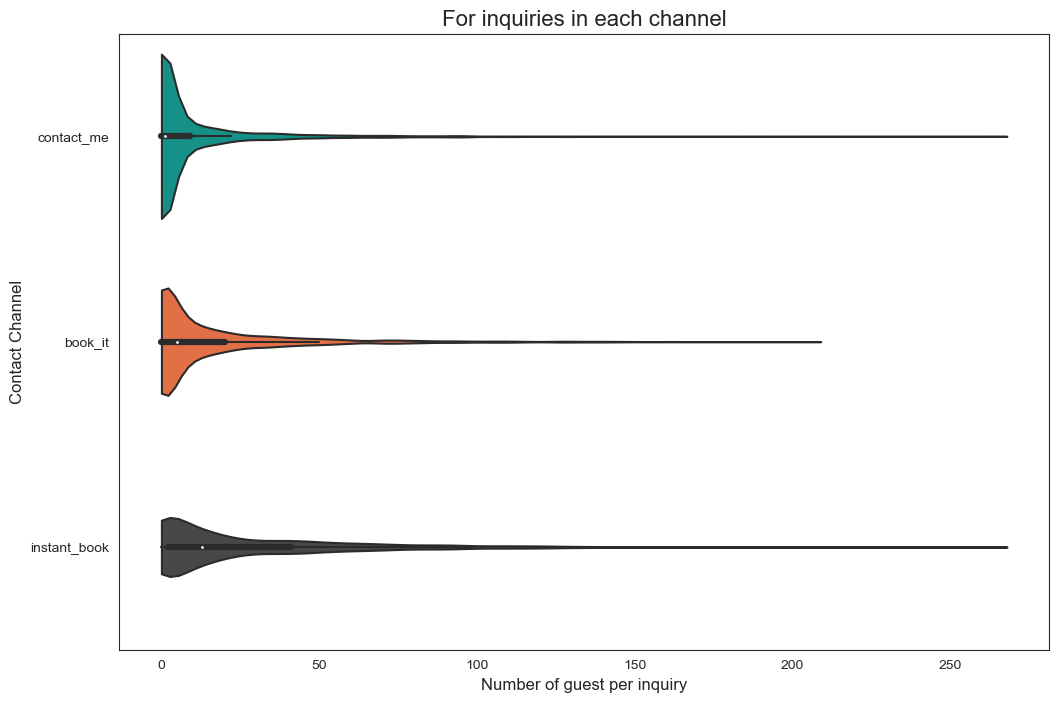

In [ ]:
plt.figure(figsize=[12,8])
sns.violinplot(data=df,x='total_reviews',y='contact_channel_first',cut=0, bw=.15,palette=['#00A699','#FC642D','#484848'])
plt.title("For inquiries in each channel", fontsize=16)
plt.xlabel('Number of guest per inquiry',fontsize=12)
plt.ylabel('Contact Channel',fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)

In [53]:
df['total_reviews'].describe()

count    27764.000000
mean     15.767541   
std      27.712035   
min      0.000000    
25%      0.000000    
50%      3.000000    
75%      18.000000   
max      268.000000  
Name: total_reviews, dtype: float64

In [48]:
np.percentile(df['total_reviews'],95)

73.0

#### Categorical Variables

In [160]:
sns.set_palette('Set2')

<AxesSubplot:xlabel='contact_channel_first', ylabel='count'>

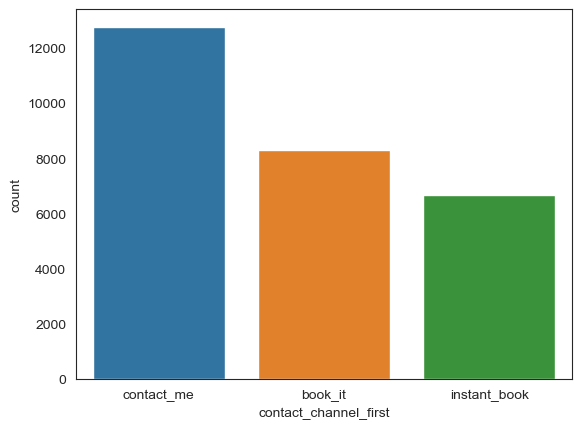

In [ ]:
#contact_channel
sns.countplot(x='contact_channel_first',data=df)

Text(0.5, 1.0, 'For all inquiries through 3 channels')

Text(0.5, 1.0, 'User stage by contact channel')

<AxesSubplot:title={'center':'For all inquiries through 3 channels'}, xlabel='guest_user_stage_first', ylabel='count'>

<AxesSubplot:title={'center':'User stage by contact channel'}, xlabel='contact_channel_first', ylabel='count'>

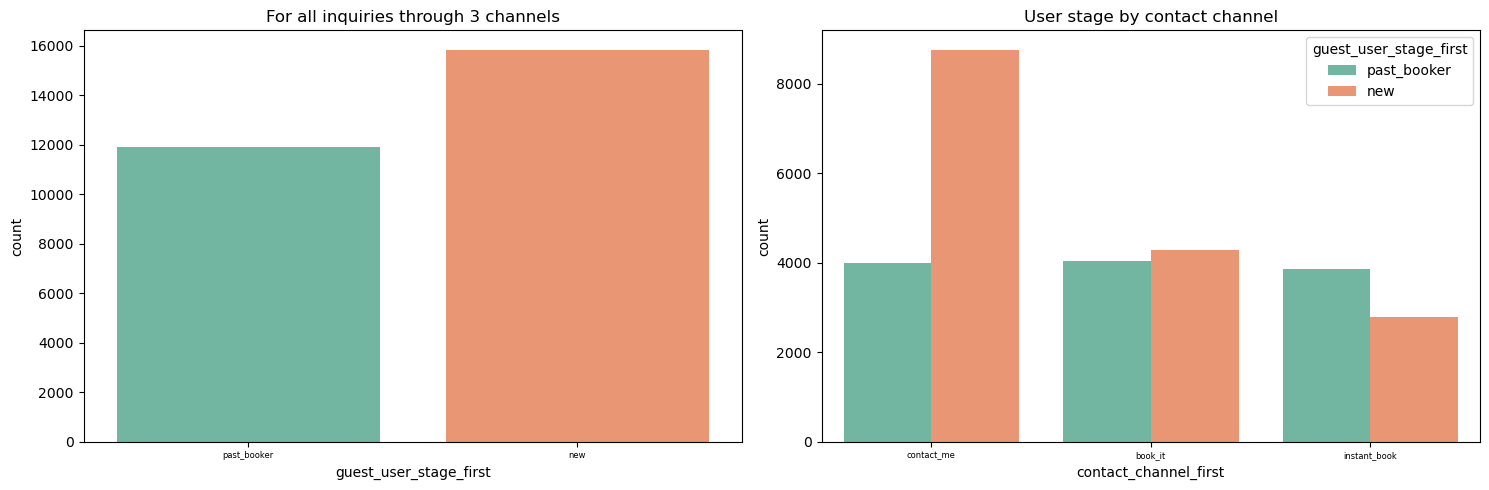

In [ ]:
#guest_user_stage
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
axs[0].set_title("For all inquiries through 3 channels")
axs[1].set_title("User stage by contact channel")

sns.countplot(x='guest_user_stage_first', data=df,ax=axs[0])
sns.countplot(x='contact_channel_first', hue='guest_user_stage_first', data=df,ax=axs[1])

fig.tight_layout()

Text(0.5, 1.0, 'For all inquiries through 3 channels')

Text(0.5, 1.0, 'Room type Selection by contact channel')

<AxesSubplot:title={'center':'For all inquiries through 3 channels'}, xlabel='room_type', ylabel='count'>

<AxesSubplot:title={'center':'Room type Selection by contact channel'}, xlabel='contact_channel_first', ylabel='count'>

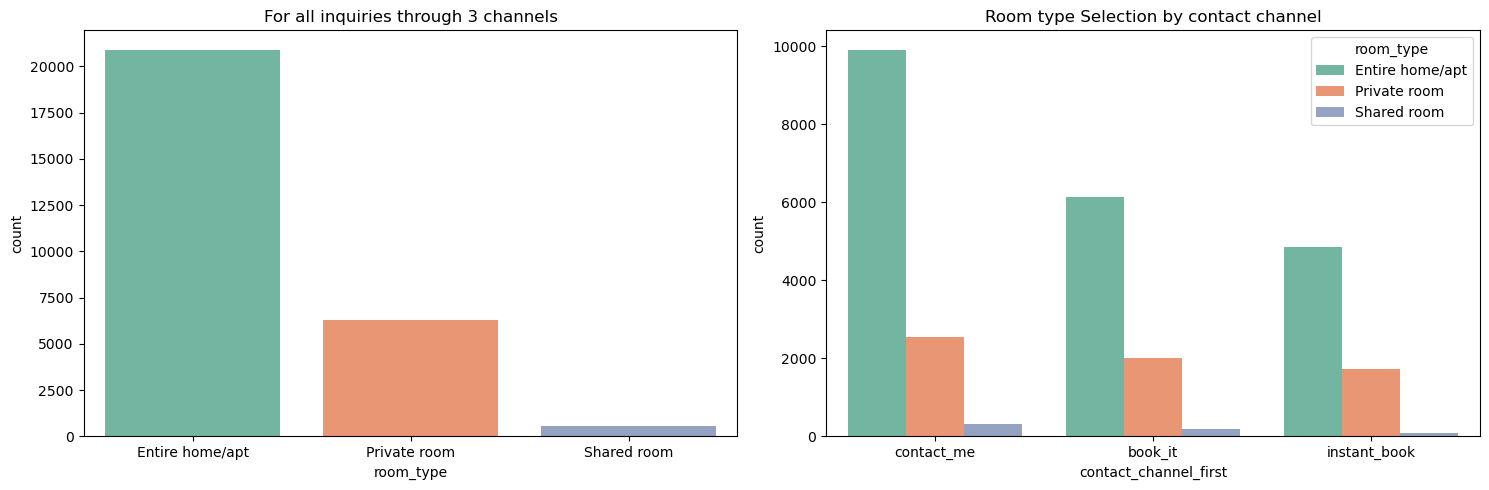

In [ ]:
#Room type
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
axs[0].set_title("For all inquiries through 3 channels")
axs[1].set_title("Room type Selection by contact channel")

sns.countplot(x='room_type', data=df,ax=axs[0])
sns.countplot(x='contact_channel_first', hue='room_type', data=df,ax=axs[1])

fig.tight_layout()

<Figure size 800x500 with 0 Axes>

<AxesSubplot:xlabel='country_guest', ylabel='count'>

Text(0.5, 1.0, "Top 10 Guest Countries' User Stage Distribution")

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Top 10 Guest Countries')

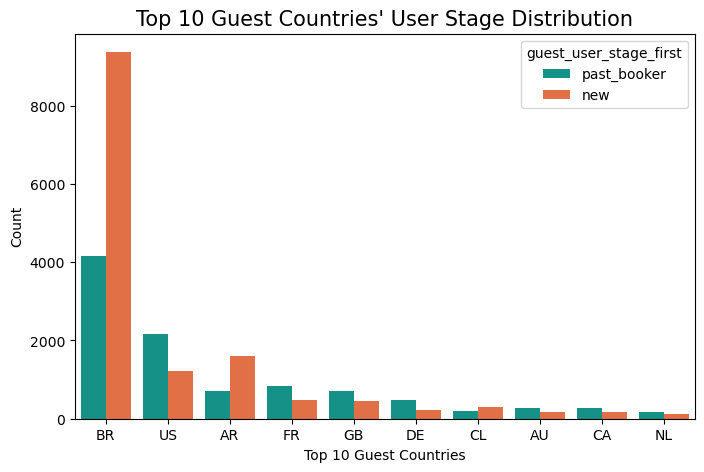

In [70]:
#guest_country
plt.figure(figsize=[8,5])
sns.countplot(x='country_guest', hue='guest_user_stage_first', data=df,palette=['#00A699','#FC642D','#484848'],
              order=df.country_guest.value_counts().iloc[:10].index)
plt.title("Top 10 Guest Countries' User Stage Distribution", fontsize=15)
plt.ylabel('Count')
plt.xlabel('Top 10 Guest Countries')


Text(0.5, 1.0, 'For all inquiries through 3 channels')

Text(0.5, 1.0, 'Contact Channel Selection by Top 10 Guest Country')

<AxesSubplot:title={'center':'For all inquiries through 3 channels'}, xlabel='country_guest', ylabel='count'>

NameError: name 'barPerc' is not defined

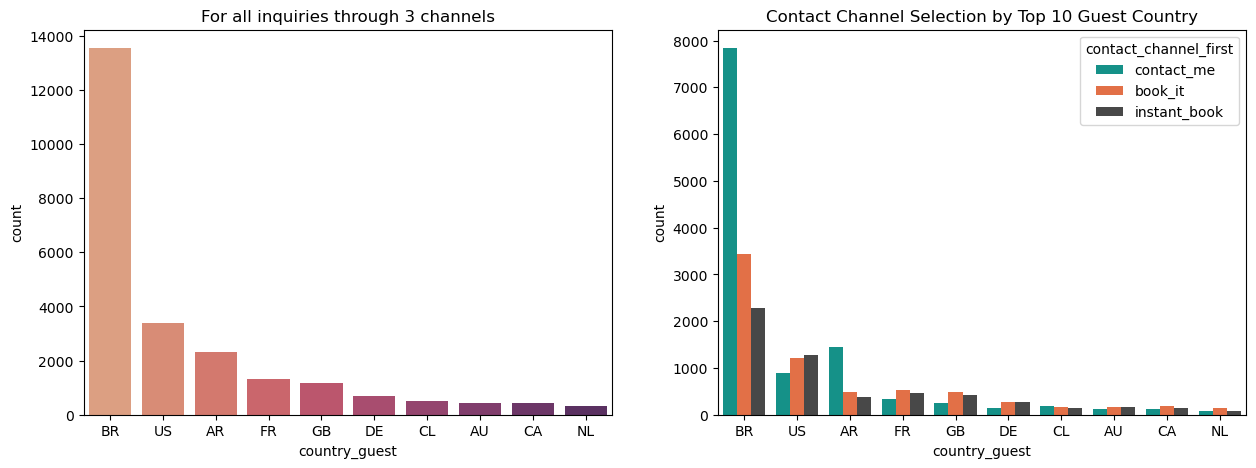

In [61]:
#guest_country
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
axs[0].set_title("For all inquiries through 3 channels")
axs[1].set_title("Contact Channel Selection by Top 10 Guest Country")

sns.countplot(x='country_guest', data=df,palette="flare",
            order=df.country_guest.value_counts().iloc[:10].index ,ax=axs[0])
ax=sns.countplot(x='country_guest', hue='contact_channel_first', data=df,palette=['#00A699','#FC642D','#484848'],
              order=df.country_guest.value_counts().iloc[:10].index,ax=axs[1])
barPerc(df,'m_guests',ax)

fig.tight_layout()

Text(0.5, 1.0, 'For all inquiries through 3 channels')

Text(0.5, 1.0, 'Contact Channel Selection by Top 5 Guest Country')

<AxesSubplot:title={'center':'Top 5 Origin Country of Guests'}, ylabel='country_guest'>

<AxesSubplot:title={'center':'Contact Channel Selection by Top 5 Guest Country'}, xlabel='country_guest', ylabel='count'>

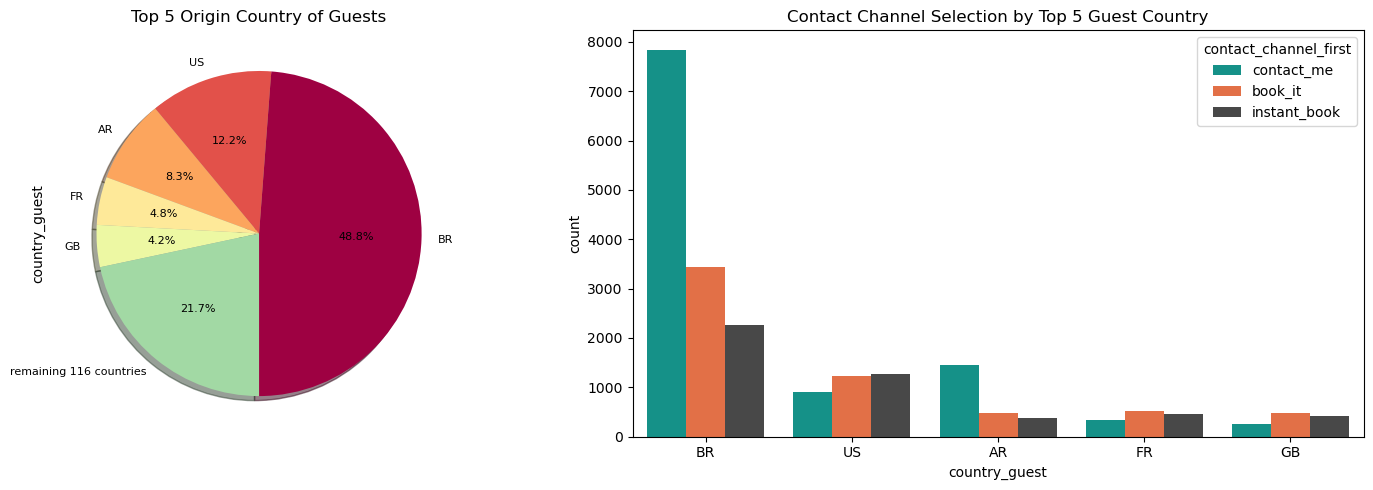

In [116]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
axs[0].set_title("For all inquiries through 3 channels")
axs[1].set_title("Contact Channel Selection by Top 5 Guest Country")

temp=df['country_guest'].value_counts()
temp2 = temp.head(5)
if len(temp) > 5:
    temp2['remaining {0} countries'.format(len(temp) - 5)] = sum(temp[5:])

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]    
temp2.plot(kind='pie',title="Top 5 Origin Country of Guests", autopct='%1.1f%%',pctdistance = 0.6, 
        shadow =True, labeldistance = 1.1,  startangle = 270, radius = 1, textprops={'fontsize': 8},colors=colors, ax=axs[0])

sns.countplot(x='country_guest', hue='contact_channel_first', data=df,palette=['#00A699','#FC642D','#484848'],
              order=df.country_guest.value_counts().iloc[:5].index,ax=axs[1])
fig.tight_layout()

Text(0.5, 1.0, 'For all inquiries through 3 channels')

Text(0.5, 1.0, 'Contact Channel Selection by Top 10 Listing Neighborhood')

<AxesSubplot:title={'center':'For all inquiries through 3 channels'}, xlabel='listing_neighborhood', ylabel='count'>

<AxesSubplot:title={'center':'Contact Channel Selection by Top 10 Listing Neighborhood'}, xlabel='listing_neighborhood', ylabel='count'>

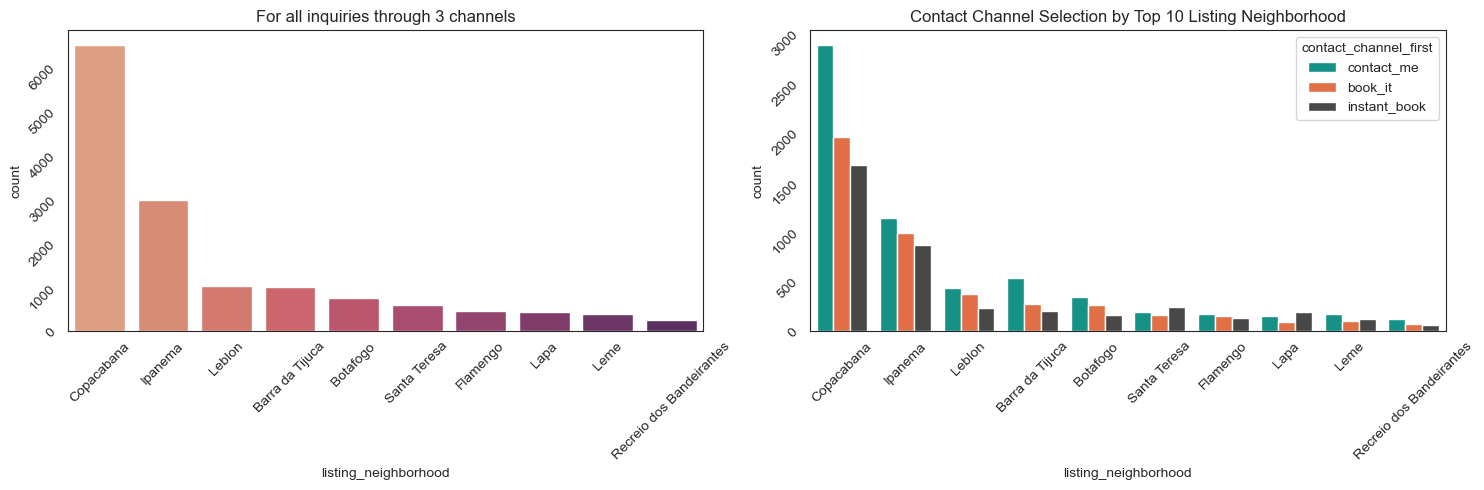

In [ ]:
#listing_neighborhood
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
axs[0].set_title("For all inquiries through 3 channels")
axs[0].tick_params(labelrotation = 45)   
axs[1].set_title("Contact Channel Selection by Top 10 Listing Neighborhood")
axs[1].tick_params(labelrotation = 45)   

sns.countplot(x='listing_neighborhood', data=df,palette="flare",
            order=df.listing_neighborhood.value_counts().iloc[:10].index,ax=axs[0])

sns.countplot(x='listing_neighborhood', hue='contact_channel_first', data=df,palette=['#00A699','#FC642D','#484848'],
              order=df.listing_neighborhood.value_counts().iloc[:10].index, ax=axs[1])

fig.tight_layout()   


<Figure size 1000x400 with 0 Axes>

Text(0.5, 1.0, 'Top 10 Listing Neighborhood')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Copacabana'),
  Text(1, 0, 'Ipanema'),
  Text(2, 0, 'Leblon'),
  Text(3, 0, 'Barra da Tijuca'),
  Text(4, 0, 'Botafogo'),
  Text(5, 0, 'Santa Teresa'),
  Text(6, 0, 'Flamengo'),
  Text(7, 0, 'Lapa'),
  Text(8, 0, 'Leme'),
  Text(9, 0, 'Recreio dos Bandeirantes')])

Text(0.4, 6518, '23.5%')

Text(1.4, 2980, '10.7%')

Text(2.4000000000000004, 1020, '3.7%')

Text(3.4000000000000004, 997, '3.6%')

Text(4.4, 754, '2.7%')

Text(5.3999999999999995, 584, '2.1%')

Text(6.3999999999999995, 446, '1.6%')

Text(7.3999999999999995, 424, '1.5%')

Text(8.4, 385, '1.4%')

Text(9.4, 232, '0.8%')

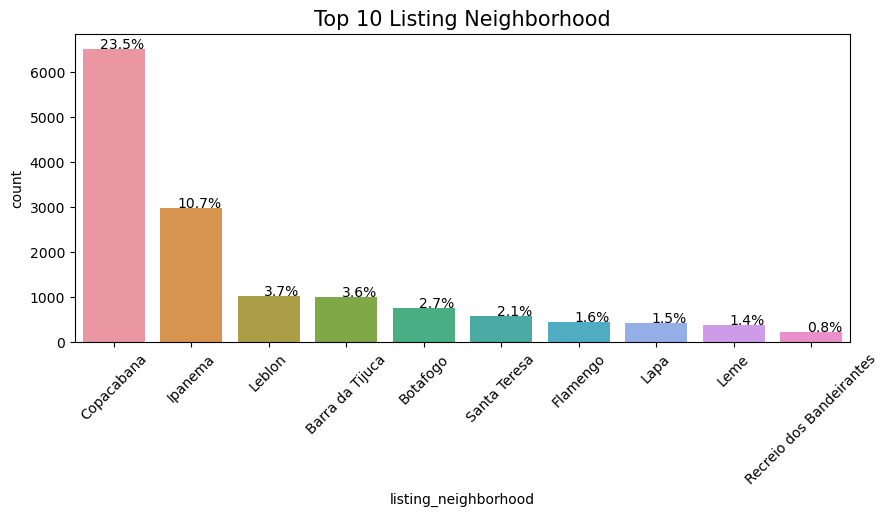

In [165]:
plt.figure(figsize=[10,4])  
total = float(len(df))
ax=sns.countplot(x='listing_neighborhood', data=df,dodge = False,
              order=df.listing_neighborhood.value_counts().iloc[:10].index)

plt.title('Top 10 Listing Neighborhood', fontsize=15)
plt.xticks(rotation=45)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')


Text(0.5, 1.0, 'For all inquiries through 3 channels')

Text(0, 0.5, 'Number of Inquiries')

Text(0.5, 1.0, 'Contact Channel Selection by Top 5 Listing Neighborhood')

<AxesSubplot:title={'center':'Contact Channel Selection by Top 5 Listing Neighborhood'}, xlabel='listing_neighborhood', ylabel='count'>

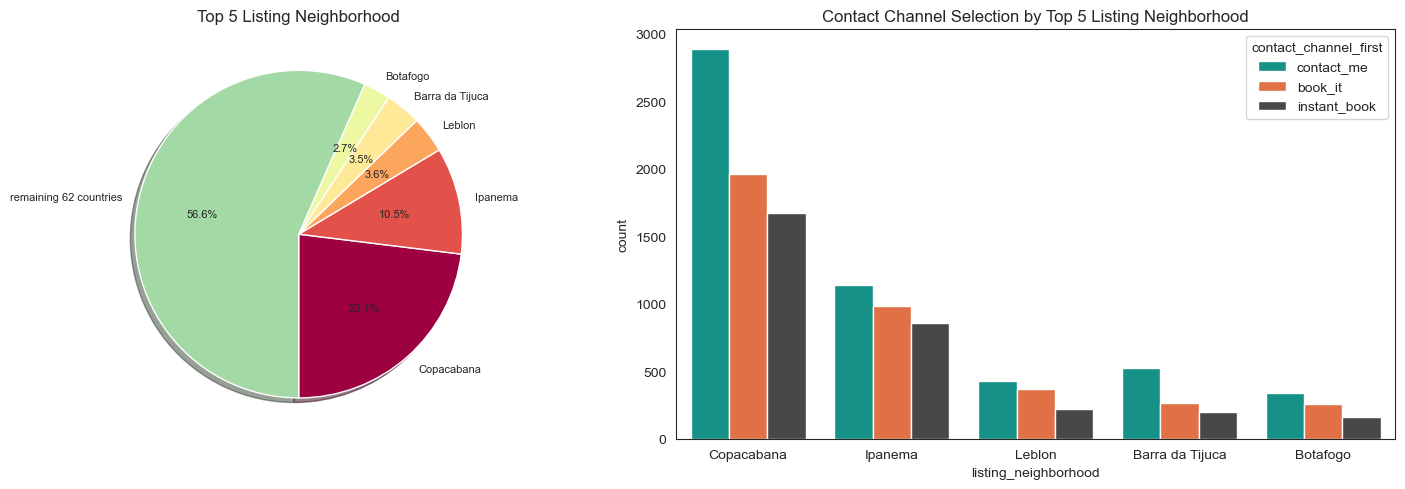

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
axs[0].set_title("For all inquiries through 3 channels")
axs[0].set_ylabel('Number of Inquiries')  
axs[1].set_title("Contact Channel Selection by Top 5 Listing Neighborhood")

temp=df['listing_neighborhood'].value_counts()
temp2 = temp.head(5)
if len(temp) > 5:
    temp2['remaining {0} countries'.format(len(temp) - 5)] = sum(temp[:])

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]     
ax=temp2.plot(kind='pie',title="Top 5 Listing Neighborhood", autopct='%1.1f%%',pctdistance = 0.6, 
        shadow =True, labeldistance = 1.1,  startangle = 270, radius = 1, textprops={'fontsize': 8},colors=colors, ax=axs[0])
ax.yaxis.set_visible(False)
        
sns.countplot(x='listing_neighborhood', hue='contact_channel_first', data=df,palette=['#00A699','#FC642D','#484848'],
              order=df.listing_neighborhood.value_counts().iloc[:5].index,ax=axs[1])
fig.tight_layout()

### Bivariate analysis:

which channel are more popular under the dependent variable?
whats the success booking rate for each channel?

##### user stage

In [86]:
sns.set_theme(style='white')

Text(0.5, 1.0, 'Contact Channel Selection by User Stage (All inquiries)')

Text(0, 0.5, 'Number of Inquiries')

Text(0.5, 0, 'User Stage')

Text(0.5, 1.0, 'Contact Channel Selection by User Stage & Success Booking Rate')

Text(0, 0.5, '% of bookings in all inquiries')

Text(0.5, 0, 'User Stage')

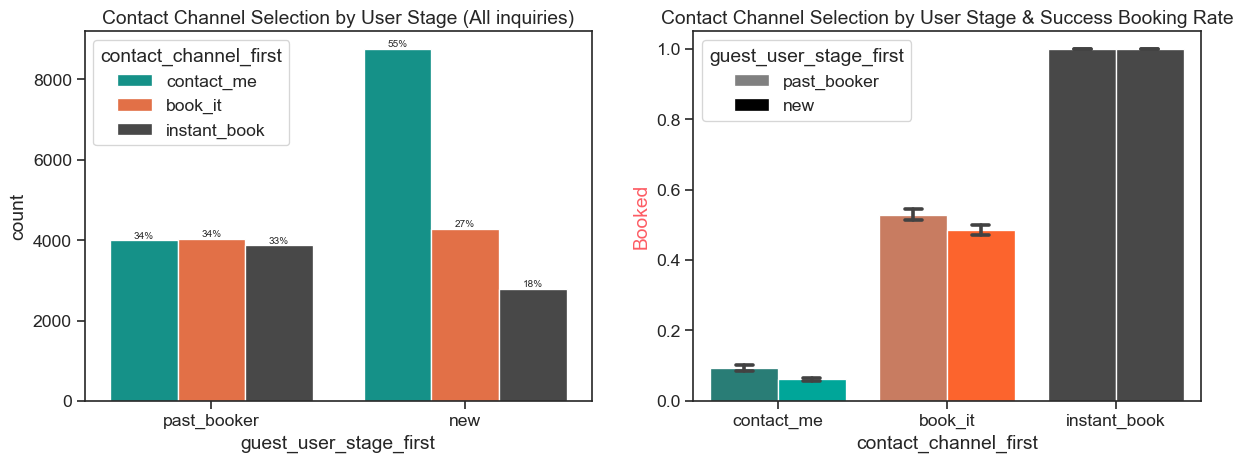

In [101]:
#User Stage
fig, axs = plt.subplots(ncols=2,figsize=(15,5), dpi=96)
axs[0].set_title('Contact Channel Selection by User Stage (All inquiries)')
axs[0].set_ylabel('Number of Inquiries')  
axs[0].set_xlabel('User Stage')


axs[1].set_title('Contact Channel Selection by User Stage & Success Booking Rate')
axs[1].set_ylabel('% of bookings in all inquiries')
axs[1].set_xlabel('User Stage')
axs[1].yaxis.label.set_color('#FD5C64') 

ax=sns.countplot(x='guest_user_stage_first',hue='contact_channel_first',data=df,palette=['#00A699','#FC642D','#484848'], ax=axs[0])
barPerc(df,'guest_user_stage_first',ax)

ax=sns.barplot(x="contact_channel_first", y="Booked", hue="guest_user_stage_first", hue_order=['past_booker', 'new'], palette={'past_booker': 'grey', 'new': 'black'}, capsize=.1, data=df,ax=axs[1])
for bar_group, desaturate_value in zip(ax.containers, [0.5, 1]):
    for bar, color in zip(bar_group, ['#00A699', '#FC642D', '#484848']):
        bar.set_facecolor(sns.desaturate(color, desaturate_value))

# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [182]:
a=df.groupby(['guest_user_stage_first','contact_channel_first'])['Booked'].mean()
a

guest_user_stage_first  contact_channel_first
new                     book_it                  0.485968
                        contact_me               0.060945
                        instant_book             1.000000
past_booker             book_it                  0.529280
                        contact_me               0.092115
                        instant_book             1.000000
Name: Booked, dtype: float64

Text(0.5, 1.0, 'Contact Channel Selection by User Stage (All inquiries)')

Text(0, 0.5, 'Number of Inquiries')

Text(0.5, 0, 'User Stage')

Text(0.5, 1.0, 'Contact Channel Selection by User Stage & Success Booking Rate')

Text(0, 0.5, '% of bookings in all inquiries')

Text(0.5, 0, 'User Stage')

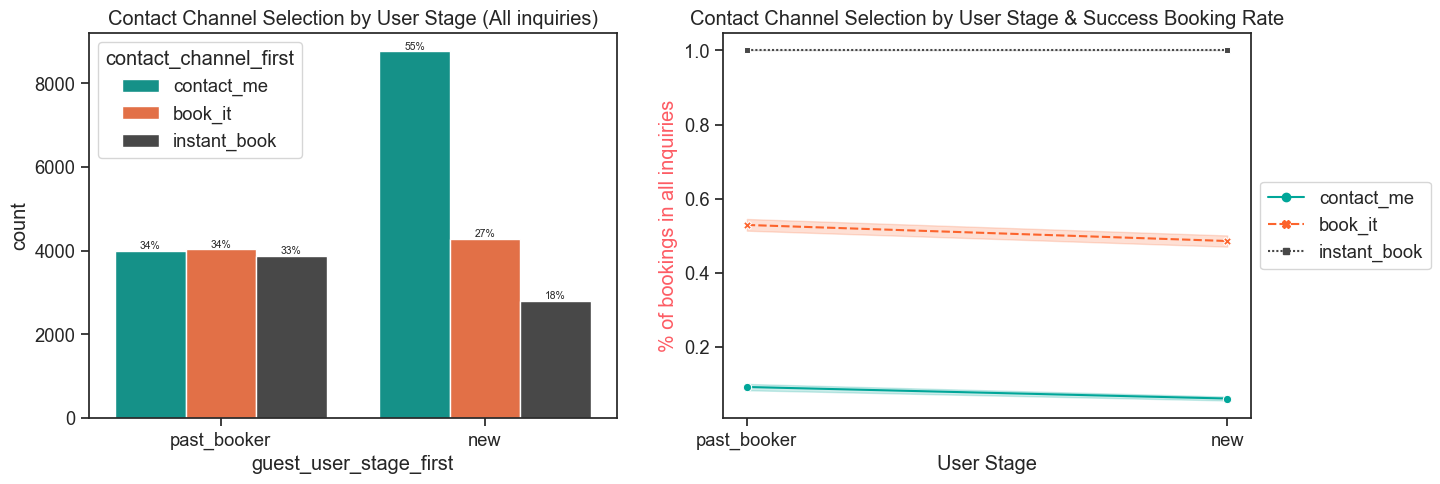

In [100]:
fig, axs = plt.subplots(ncols=2,figsize=(15,5))
axs[0].set_title('Contact Channel Selection by User Stage (All inquiries)')
axs[0].set_ylabel('Number of Inquiries')  
axs[0].set_xlabel('User Stage')


axs[1].set_title('Contact Channel Selection by User Stage & Success Booking Rate')
axs[1].set_ylabel('% of bookings in all inquiries')
axs[1].set_xlabel('User Stage')
axs[1].yaxis.label.set_color('#FD5C64') 


ax=sns.countplot(x='guest_user_stage_first',hue='contact_channel_first',data=df,palette=['#00A699','#FC642D','#484848'], ax=axs[0])
barPerc(df,'guest_user_stage_first',ax)

ax=sns.lineplot(data=df, x="guest_user_stage_first", y="Booked", hue="contact_channel_first",markers=True, style="contact_channel_first",palette=['#00A699','#FC642D','#484848'],ax=axs[1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

##### group size

In [103]:
df['Group_Size'] =pd.cut(df['m_guests'],bins=[0,2,5,9,17],labels=['1-2','3-5','6-9','10+'])

Text(0.5, 1.0, 'Contact Channel Selection by Group Size (All inquiries)')

Text(0, 0.5, 'Number of Inquiries')

Text(0.5, 1.0, 'Contact Channel Selection by Group Size & Success Booking Rate')

Text(0, 0.5, '% of bookings in all inquiries')

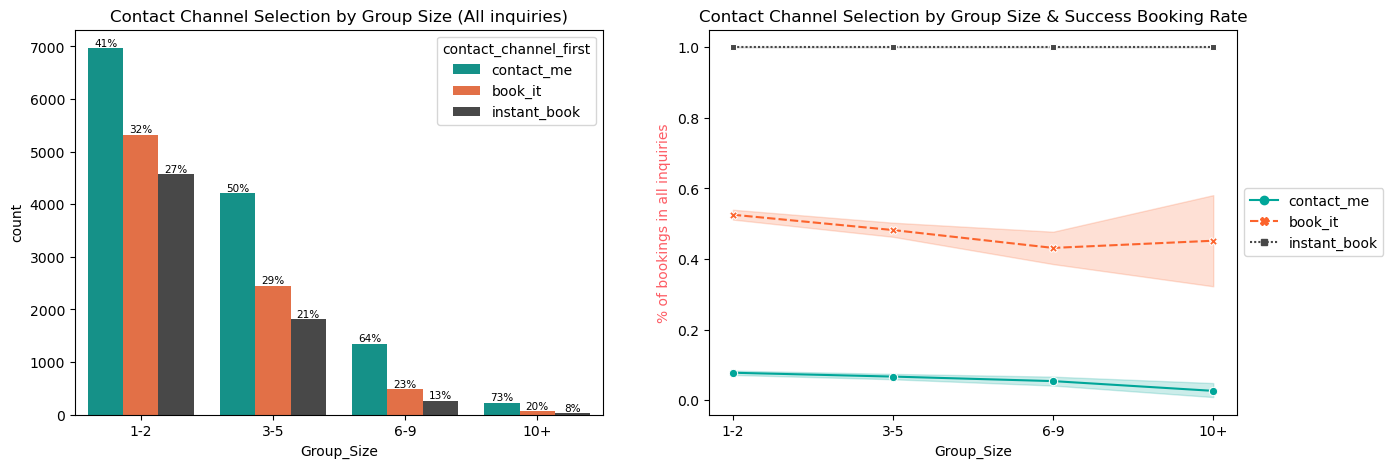

In [186]:
fig, axs = plt.subplots(ncols=2,figsize=(15,5))
axs[0].set_title('Contact Channel Selection by Group Size (All inquiries)')
axs[0].set_ylabel('Number of Inquiries')
axs[1].set_title('Contact Channel Selection by Group Size & Success Booking Rate')
axs[1].set_ylabel('% of bookings in all inquiries')
axs[1].yaxis.label.set_color('#FD5C64') 

ax=sns.countplot(x='Group_Size',hue='contact_channel_first',data=df,palette=['#00A699','#FC642D','#484848'], ax=axs[0])
barPerc(df,'Group_Size',ax)


ax=sns.lineplot(data=df, x="Group_Size", y="Booked", hue="contact_channel_first",markers=True, style="contact_channel_first",palette=['#00A699','#FC642D','#484848'],ax=axs[1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [105]:
a=df.groupby(['Group_Size','contact_channel_first'])['Booked'].mean()
a

Group_Size  contact_channel_first
1-2         book_it                  0.525258
            contact_me               0.077740
            instant_book             1.000000
3-5         book_it                  0.481859
            contact_me               0.066856
            instant_book             1.000000
6-9         book_it                  0.431250
            contact_me               0.054034
            instant_book             1.000000
10+         book_it                  0.451613
            contact_me               0.026432
            instant_book             1.000000
Name: Booked, dtype: float64

##### length of stay

In [123]:
def duration(d1, d2):
    return round((d2 - d1).dt.days)
a=duration(df['ds_checkin_first'],df['ds_checkout_first'])

In [107]:
df['length_of_stay'] =pd.cut(a,bins=[0,1,3,7,15,365],labels=['Day Trip','2-3 Days','4-7 Days','8-15 Days','More than 15 Days'])

In [124]:
df['length_of_stay'] =pd.cut(a,bins=[0,1,4,7,10,365],labels=['1 Day ','2-4 Days','5-7 Days','8-10 Days','11+ Days'])

Text(0.5, 1.0, 'Contact Channel Selection by Length of Stay (All inquiries)')

Text(0, 0.5, 'Number of Inquiries')

Text(0.5, 1.0, 'Contact Channel Selection by Length of Stay & Success Booking Rate')

Text(0, 0.5, '% of bookings in all inquiries')

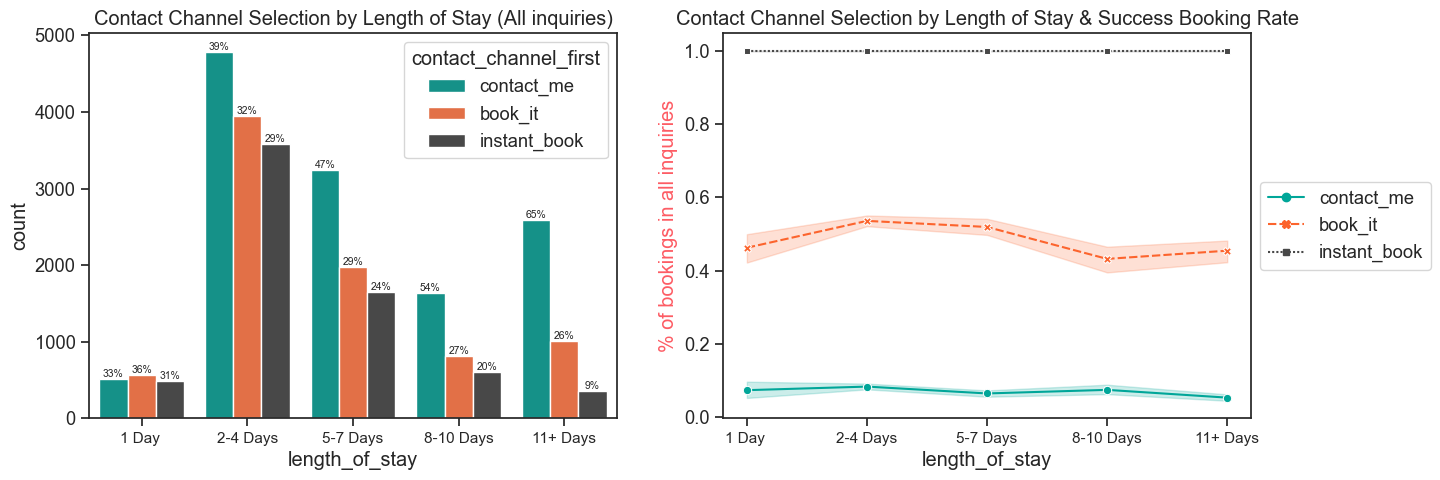

In [125]:
#Trip Length
fig, axs = plt.subplots(ncols=2,figsize=(15,5))
axs[0].set_title('Contact Channel Selection by Length of Stay (All inquiries)')
axs[0].set_ylabel('Number of Inquiries')
axs[0].tick_params(axis='x',labelsize=11) 
axs[1].set_title('Contact Channel Selection by Length of Stay & Success Booking Rate')
axs[1].set_ylabel('% of bookings in all inquiries')
axs[1].yaxis.label.set_color('#FD5C64') 
axs[1].tick_params(axis='x',labelsize=11) 

ax=sns.countplot(x='length_of_stay',hue='contact_channel_first',data=df,palette=['#00A699','#FC642D','#484848'], ax=axs[0])
barPerc(df,'length_of_stay',ax)

ax=sns.lineplot(data=df, x="length_of_stay", y="Booked", hue="contact_channel_first",markers=True, style="contact_channel_first",palette=['#00A699','#FC642D','#484848'],ax=axs[1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [126]:
a=df.groupby(['length_of_stay','contact_channel_first'])['Booked'].mean()
a

length_of_stay  contact_channel_first
1 Day           book_it                  0.462214
                contact_me               0.073359
                instant_book             1.000000
2-4 Days        book_it                  0.535515
                contact_me               0.083124
                instant_book             1.000000
5-7 Days        book_it                  0.518930
                contact_me               0.064407
                instant_book             1.000000
8-10 Days       book_it                  0.431734
                contact_me               0.074188
                instant_book             1.000000
11+ Days        book_it                  0.454187
                contact_me               0.052978
                instant_book             1.000000
Name: Booked, dtype: float64

##### room type

Text(0.5, 1.0, 'Contact Channel Selection by Room Type (All inquiries)')

Text(0, 0.5, 'Number of Inquiries')

Text(0.5, 1.0, 'Contact Channel Selection by Room Type & Success Booking Rate')

Text(0, 0.5, '% of bookings in all inquiries')

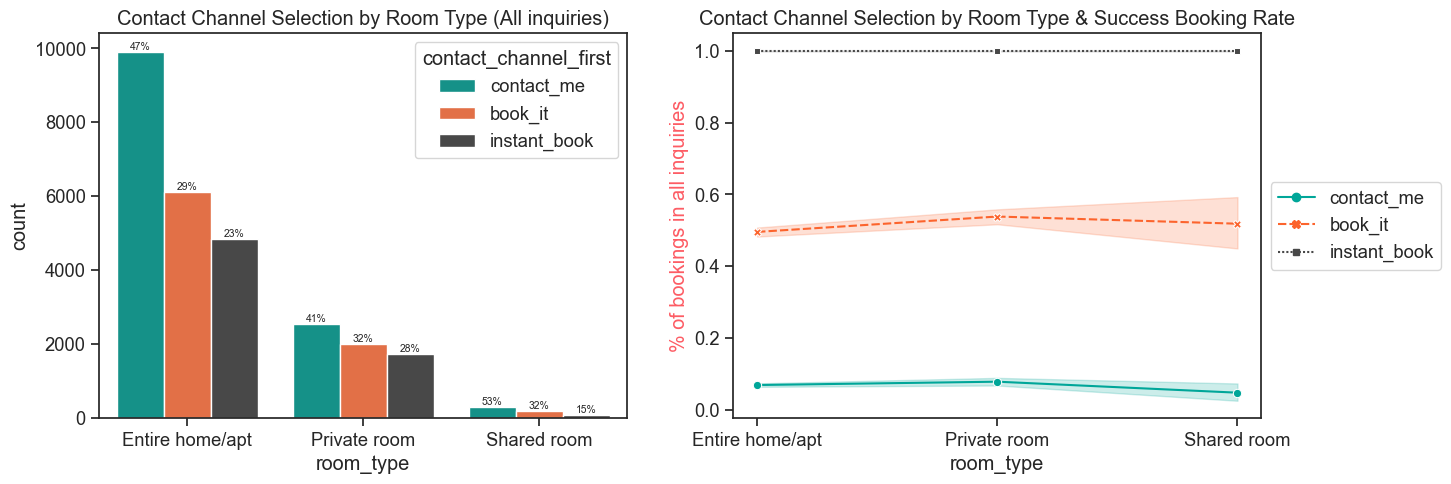

In [113]:
#Room type
fig, axs = plt.subplots(ncols=2,figsize=(15,5))
axs[0].set_title('Contact Channel Selection by Room Type (All inquiries)')
axs[0].set_ylabel('Number of Inquiries')
axs[1].set_title('Contact Channel Selection by Room Type & Success Booking Rate')
axs[1].set_ylabel('% of bookings in all inquiries')
axs[1].yaxis.label.set_color('#FD5C64') 

ax=sns.countplot(x='room_type',hue='contact_channel_first',data=df,palette=['#00A699','#FC642D','#484848'], ax=axs[0])
barPerc(df,'room_type',ax)

ax=sns.lineplot(data=df, x="room_type", y="Booked", hue="contact_channel_first",markers=True, style="contact_channel_first",palette=['#00A699','#FC642D','#484848'],ax=axs[1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

##### lead time

In [127]:
#Booking Lead Time
def duration(d1, d2):
    return abs((d2 - d1).dt.days/7)
a=duration(df['ts_interaction_first'],df['ds_checkin_first'])

In [132]:
df['Lead_Time'] =pd.cut(a,bins=[0,2,4,6,8,10,12,14,53],labels=['<=2','3-4','5-6','7-8','9-10','11-12','13-14','> 15'])

Text(0.5, 1.0, 'Contact Channel Selection by Lead Time (All inquiries)')

Text(0, 0.5, 'Number of Inquiries')

Text(0.5, 0, 'Lead Time (Week)')

Text(0.5, 1.0, 'Contact Channel Selection by Lead Time & Success Booking Rate')

Text(0, 0.5, '% of bookings in all inquiries')

Text(0.5, 0, 'Lead Time (Week)')

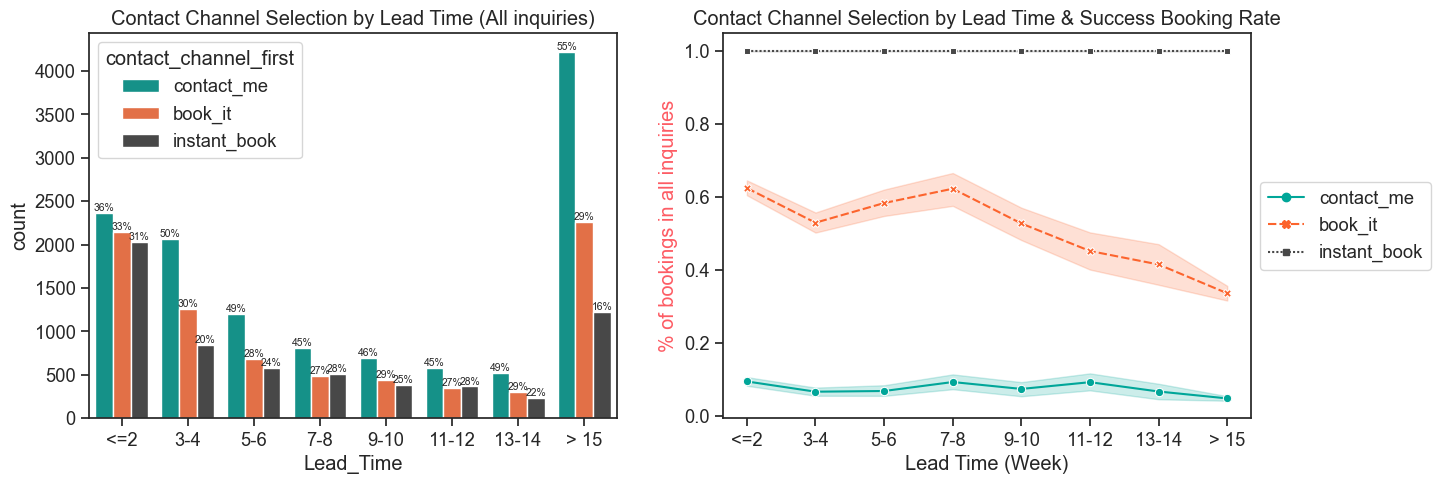

In [134]:
fig, axs = plt.subplots(ncols=2,figsize=(15,5))
axs[0].set_title('Contact Channel Selection by Lead Time (All inquiries)')
axs[0].set_ylabel('Number of Inquiries')
axs[0].set_xlabel('Lead Time (Week)')

axs[1].set_title('Contact Channel Selection by Lead Time & Success Booking Rate')
axs[1].set_ylabel('% of bookings in all inquiries')
axs[1].set_xlabel('Lead Time (Week)')
axs[1].yaxis.label.set_color('#FD5C64') 

ax=sns.countplot(x='Lead_Time',hue='contact_channel_first',data=df,palette=['#00A699','#FC642D','#484848'], ax=axs[0])
barPerc(df,'Lead_Time',ax)

ax=sns.lineplot(data=df, x="Lead_Time", y="Booked", hue="contact_channel_first",markers=True, style="contact_channel_first",palette=['#00A699','#FC642D','#484848'],ax=axs[1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [135]:
a=df.groupby(['Lead_Time','contact_channel_first'])['Booked'].mean()
a

Lead_Time  contact_channel_first
<=2        book_it                  0.624242
           contact_me               0.094977
           instant_book             1.000000
3-4        book_it                  0.529412
           contact_me               0.066925
           instant_book             1.000000
5-6        book_it                  0.583211
           contact_me               0.068823
           instant_book             1.000000
7-8        book_it                  0.622449
           contact_me               0.093366
           instant_book             1.000000
9-10       book_it                  0.527273
           contact_me               0.074499
           instant_book             1.000000
11-12      book_it                  0.451977
           contact_me               0.092943
           instant_book             1.000000
13-14      book_it                  0.415033
           contact_me               0.067437
           instant_book             1.000000
> 15       book_it    

##### Host Responsiveness

In [150]:
#Booking Lead Time
def time_diff(d1, d2):
    return round((d2 - d1).dt.total_seconds() / 60.0)

df['response_time']=time_diff(df['ts_interaction_first'],df['ts_reply_at_first'])

In [151]:
df['response_time'] =pd.cut(df['response_time'],bins=[0,60,120,180,240,300,360,405],labels=['<60 mins','60-119 mins','120-179 mins','180-239 mins','240-299 mins','300-359 mins','>= 360 mins'])

In [164]:
contact_me['response_time'] =pd.cut(contact_me['response_time'],bins=[0,30,60,90,120,150,180,210,240,270,300,330,360,405],labels=['<30','30-59','60-89','90-119','120-149','150-179','180-209','210-239','240-269','270-299','300-329','330-359','>= 360'])

C:\Users\seagu\AppData\Local\Temp\ipykernel_12068\2394643685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contact_me['response_time'] =pd.cut(contact_me['response_time'],bins=[0,30,60,90,120,150,180,210,240,270,300,330,360,405],labels=['<30','30-59','60-89','90-119','120-149','150-179','180-209','210-239','240-269','270-299','300-329','330-359','>= 360'])


In [170]:
#Booking Lead Time
def time_diff(d1, d2):
    return round((d2 - d1).dt.total_seconds() / 60.0)

contact_me['response_time']=time_diff(contact_me['ts_interaction_first'],contact_me['ts_reply_at_first'])

C:\Users\seagu\AppData\Local\Temp\ipykernel_12068\1546986598.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contact_me['response_time']=time_diff(contact_me['ts_interaction_first'],contact_me['ts_reply_at_first'])


In [171]:
contact_me['response_time'] =pd.cut(contact_me['response_time'],bins=[0,60,120,180,240,300,360,405],labels=['<60','60-119','120-179','180-239','240-299','300-359','>= 360'])

C:\Users\seagu\AppData\Local\Temp\ipykernel_12068\1932811277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contact_me['response_time'] =pd.cut(contact_me['response_time'],bins=[0,60,120,180,240,300,360,405],labels=['<60','60-119','120-179','180-239','240-299','300-359','>= 360'])


Text(0, 0.5, 'Number of Inquiries')

Text(0.5, 1.0, 'Response Time Distribution (Contact me only)')

Text(0.5, 0, 'Response Time (minutes)')

Text(0.5, 1.0, 'Response Time & Success Booking Rate')

Text(0, 0.5, '% of bookings in all inquiries')

Text(0.5, 0, 'Response Time (minutes)')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


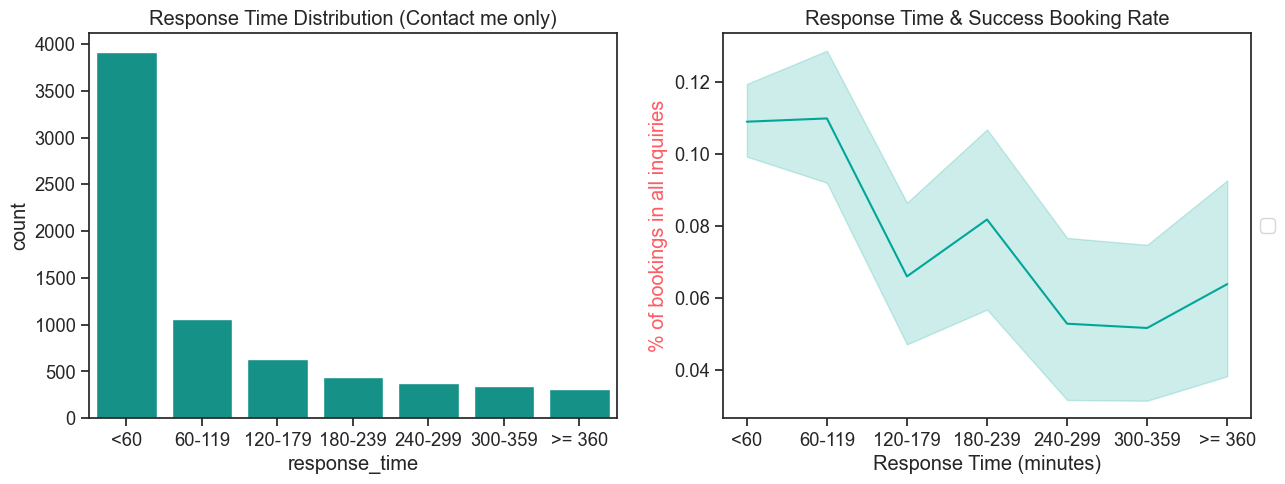

In [181]:
fig, axs = plt.subplots(ncols=2,figsize=(15,5))
axs[0].set_ylabel('Number of Inquiries')
axs[0].set_title('Response Time Distribution (Contact me only)')
axs[0].set_xlabel('Response Time (minutes)')

axs[1].set_title('Response Time & Success Booking Rate')
axs[1].set_ylabel('% of bookings in all inquiries')
axs[1].set_xlabel('Response Time (minutes)')
axs[1].yaxis.label.set_color('#FD5C64') 

ax=sns.countplot(x='response_time',data=contact_me,color='#00A699',ax=axs[0])

ax=sns.lineplot(data=contact_me, x="response_time", y="Booked",color='#00A699',ax=axs[1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [174]:
a=contact_me.groupby(['response_time'])['Booked'].mean()
a

response_time
<60        0.108956
60-119     0.109859
120-179    0.066038
180-239    0.081818
240-299    0.052910
300-359    0.051724
>= 360     0.063898
Name: Booked, dtype: float64

Text(0.5, 1.0, 'Response Time Distribution (All inquiries)')

Text(0.5, 1.0, 'Contact Channel by Response Time & Success Booking Rate')

Text(0, 0.5, '% of bookings in all inquiries')

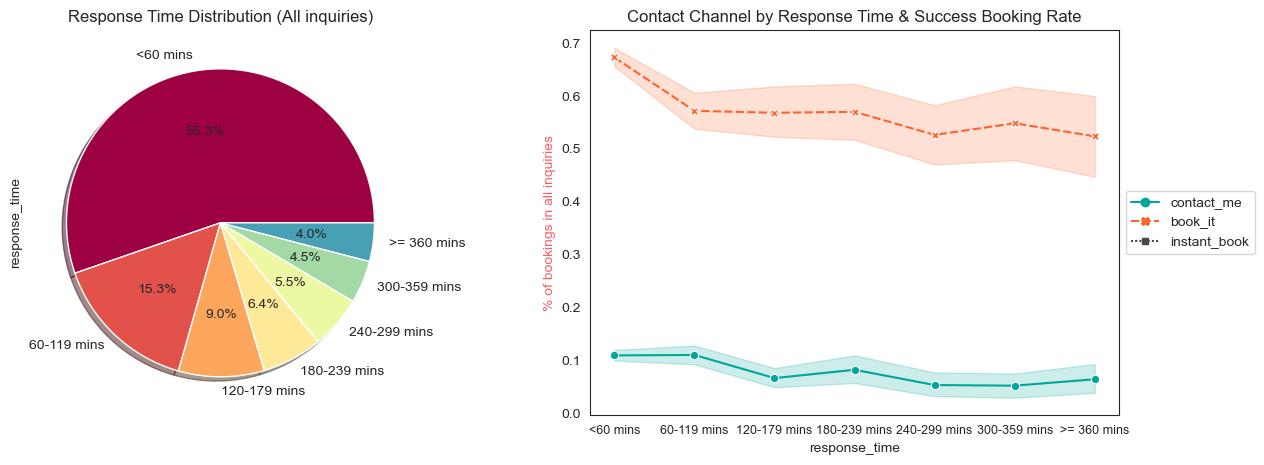

In [ ]:
fig, axs = plt.subplots(ncols=2,figsize=(15,5))
axs[0].set_title('Response Time Distribution (All inquiries)')

axs[1].set_title('Contact Channel by Response Time & Success Booking Rate')
axs[1].set_ylabel('% of bookings in all inquiries')
axs[1].yaxis.label.set_color('#FD5C64') 
axs[1].tick_params(axis='x',labelsize=9) 

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
ax=df['response_time'].value_counts().plot.pie(legend=False,autopct='%1.1f%%',shadow=True,startangle=0,ax=axs[0],colors=colors)

ax=sns.lineplot(data=df, x="response_time", y="Booked", hue="contact_channel_first",markers=True, style="contact_channel_first",palette=['#00A699','#FC642D','#484848'],ax=axs[1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

##### Number of Interaction

In [37]:
df['Number_of_interactions'] =pd.cut(df['m_interactions'],bins=[1,10,20,30,40,50,410],labels=['1-10','11-20','21-30','31-40','41-50','>50'])

Text(0.5, 1.0, 'Number of interactions by Contact Channel (All inquiries)')

Text(0, 0.5, 'Number of Inquiries')

Text(0.5, 1.0, 'Number of interactions by Contact Channel & Success Booking Rate')

Text(0, 0.5, '% of bookings in all inquiries')

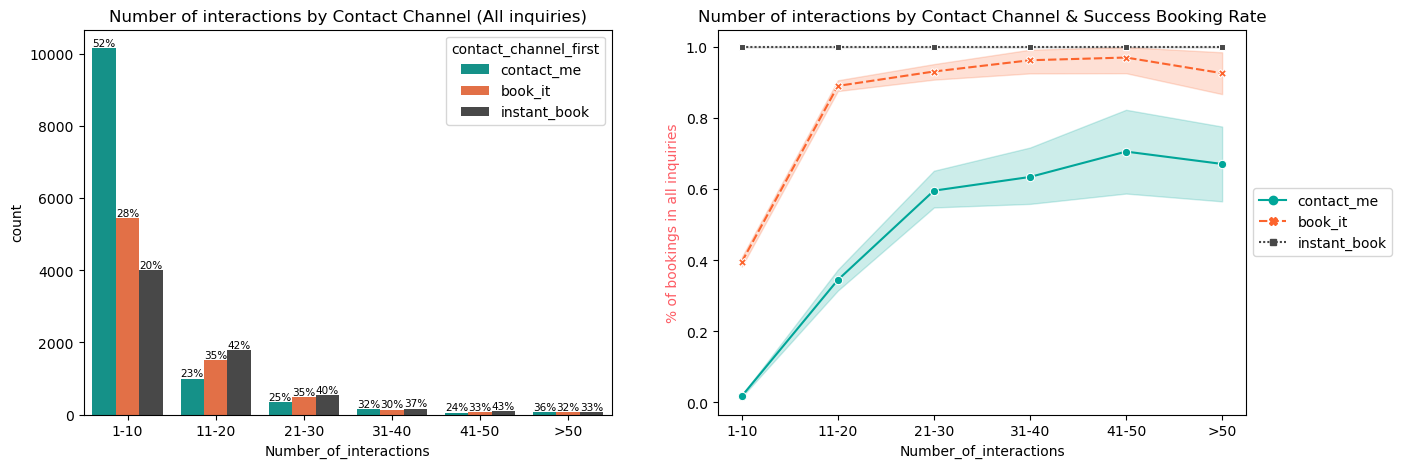

In [43]:
fig, axs = plt.subplots(ncols=2,figsize=(15,5))
axs[0].set_title('Number of interactions by Contact Channel (All inquiries)')
axs[0].set_ylabel('Number of Inquiries')

axs[1].set_title('Number of interactions by Contact Channel & Success Booking Rate')
axs[1].set_ylabel('% of bookings in all inquiries')
axs[1].yaxis.label.set_color('#FD5C64') 

ax=sns.countplot(x='Number_of_interactions',hue='contact_channel_first',data=df, palette=['#00A699','#FC642D','#484848'],ax=axs[0])
barPerc(df,'Number_of_interactions',ax)

ax=sns.lineplot(data=df, x="Number_of_interactions", y="Booked", hue="contact_channel_first",markers=True, style="contact_channel_first",palette=['#00A699','#FC642D','#484848'],ax=axs[1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Text(0.5, 1.0, 'Number of interactions by Contact Channel (All inquiries)')

Text(0, 0.5, 'Number of Inquiries')

Text(0.5, 1.0, 'Number of interactions by Contact Channel & Success Booking Rate')

Text(0, 0.5, '% of bookings in all inquiries')

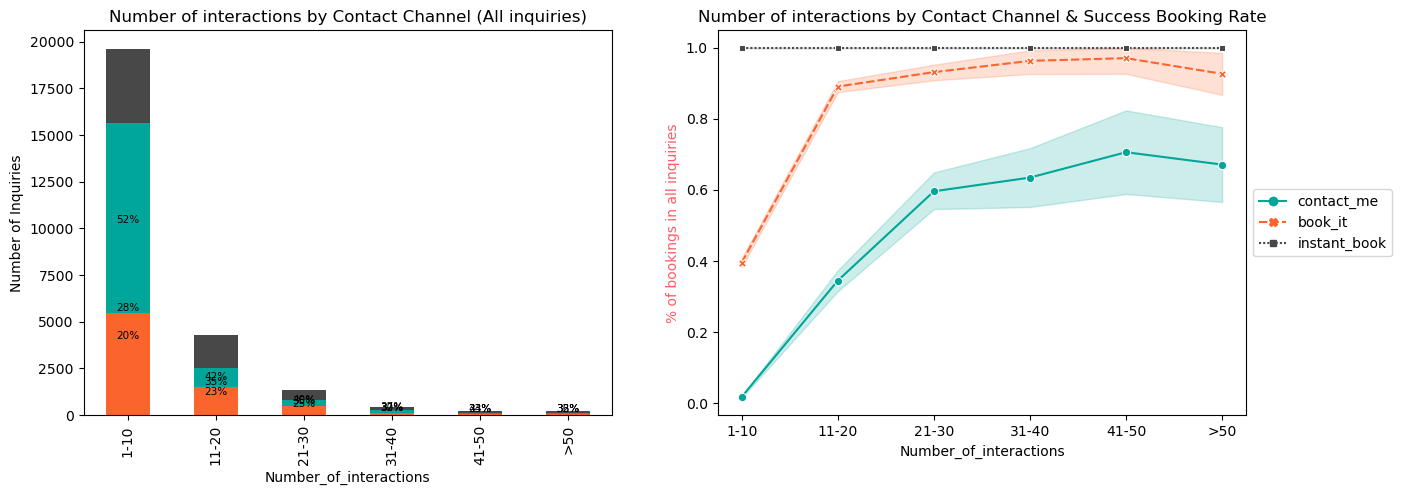

In [47]:
fig, axs = plt.subplots(ncols=2,figsize=(15,5))
axs[0].set_title('Number of interactions by Contact Channel (All inquiries)')
axs[0].set_ylabel('Number of Inquiries')

axs[1].set_title('Number of interactions by Contact Channel & Success Booking Rate')
axs[1].set_ylabel('% of bookings in all inquiries')
axs[1].yaxis.label.set_color('#FD5C64') 

df_plot = df.groupby(['contact_channel_first', 'Number_of_interactions']).size().reset_index().pivot(columns='contact_channel_first', index='Number_of_interactions', values=0)
ax=df_plot.plot(kind='bar', stacked=True, color=['#FC642D','#00A699','#484848'],legend=False, ax=axs[0])
barPerc(df,'Number_of_interactions',ax)

ax=sns.lineplot(data=df, x="Number_of_interactions", y="Booked", hue="contact_channel_first",markers=True, style="contact_channel_first",palette=['#00A699','#FC642D','#484848'],ax=axs[1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [41]:
a=df.groupby(['Number_of_interactions','contact_channel_first'])['Booked'].mean()
a

Number_of_interactions  contact_channel_first
1-10                    book_it                  0.395268
                        contact_me               0.017508
                        instant_book             1.000000
11-20                   book_it                  0.890718
                        contact_me               0.344689
                        instant_book             1.000000
21-30                   book_it                  0.931250
                        contact_me               0.595870
                        instant_book             1.000000
31-40                   book_it                  0.962963
                        contact_me               0.634483
                        instant_book             1.000000
41-50                   book_it                  0.970588
                        contact_me               0.705882
                        instant_book             1.000000
>50                     book_it                  0.926471
                        co

##### Number of reviews per listings

In [136]:
df['Number_of_total_reviews'] =pd.cut(df['total_reviews'],bins=[0,10,20,30,40,50,100],labels=['0-9','10-19','20-29','30-39','40-49','>50'])

Text(0.5, 1.0, 'Contact Channel Selection by Total Reviews (All inquiries)')

Text(0, 0.5, 'Number of Inquiries')

Text(0.5, 1.0, 'Contact Channel Selection by Total Reviews & Success Booking Rate')

Text(0, 0.5, '% of bookings in all inquiries')

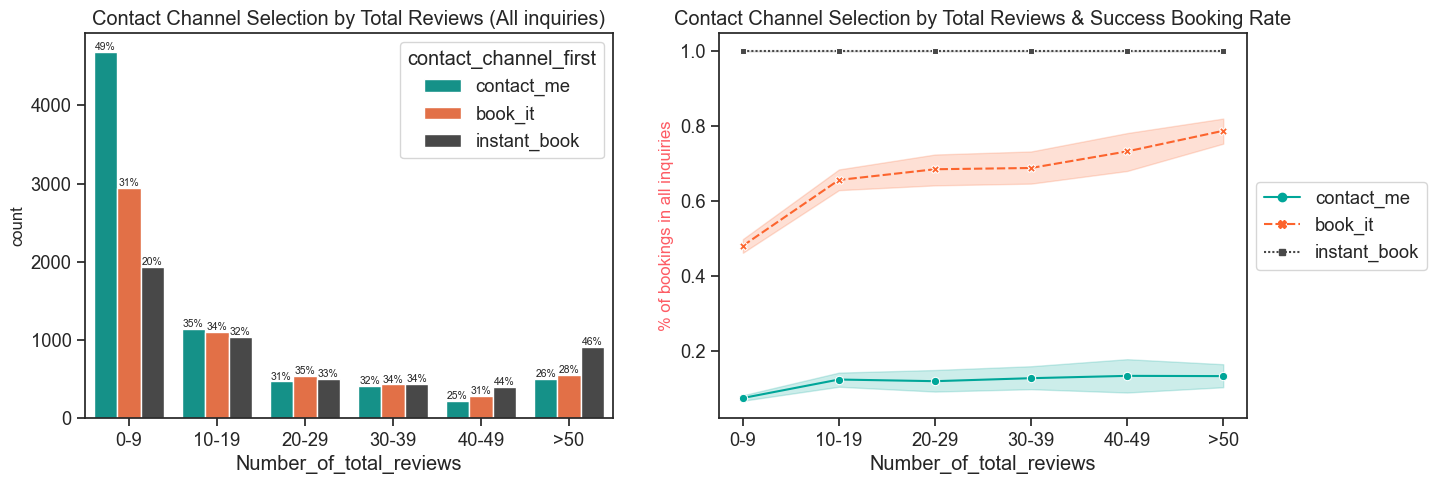

In [137]:
fig, axs = plt.subplots(ncols=2,figsize=(15,5))
axs[0].set_title('Contact Channel Selection by Total Reviews (All inquiries)')
axs[0].set_ylabel('Number of Inquiries', fontsize=12)
axs[1].set_title('Contact Channel Selection by Total Reviews & Success Booking Rate')
axs[1].set_ylabel('% of bookings in all inquiries', fontsize=12)
axs[1].yaxis.label.set_color('#FD5C64') 

ax=sns.countplot(x='Number_of_total_reviews',hue='contact_channel_first',data=df,palette=['#00A699','#FC642D','#484848'], ax=axs[0])
barPerc(df,'Number_of_total_reviews',ax)

ax=sns.lineplot(data=df, x="Number_of_total_reviews", y="Booked", hue="contact_channel_first",markers=True, style="contact_channel_first",palette=['#00A699','#FC642D','#484848'],ax=axs[1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [138]:
a=df.groupby(['Number_of_total_reviews','contact_channel_first'])['Booked'].mean()
a

Number_of_total_reviews  contact_channel_first
0-9                      book_it                  0.480122
                         contact_me               0.074248
                         instant_book             1.000000
10-19                    book_it                  0.655515
                         contact_me               0.123576
                         instant_book             1.000000
20-29                    book_it                  0.684112
                         contact_me               0.119149
                         instant_book             1.000000
30-39                    book_it                  0.687500
                         contact_me               0.127139
                         instant_book             1.000000
40-49                    book_it                  0.731707
                         contact_me               0.133333
                         instant_book             1.000000
>50                      book_it                  0.786618
         

Text(0.5, 1.0, 'Contact Channel Selection by Total Reviews (All inquiries)')

Text(0, 0.5, 'Number of Inquiries')

Text(0.5, 1.0, 'Contact Channel Selection by Total Reviews & Success Booking Rate')

Text(0, 0.5, '% of bookings in all inquiries')

KeyError: 'Number_of_total_reviews'

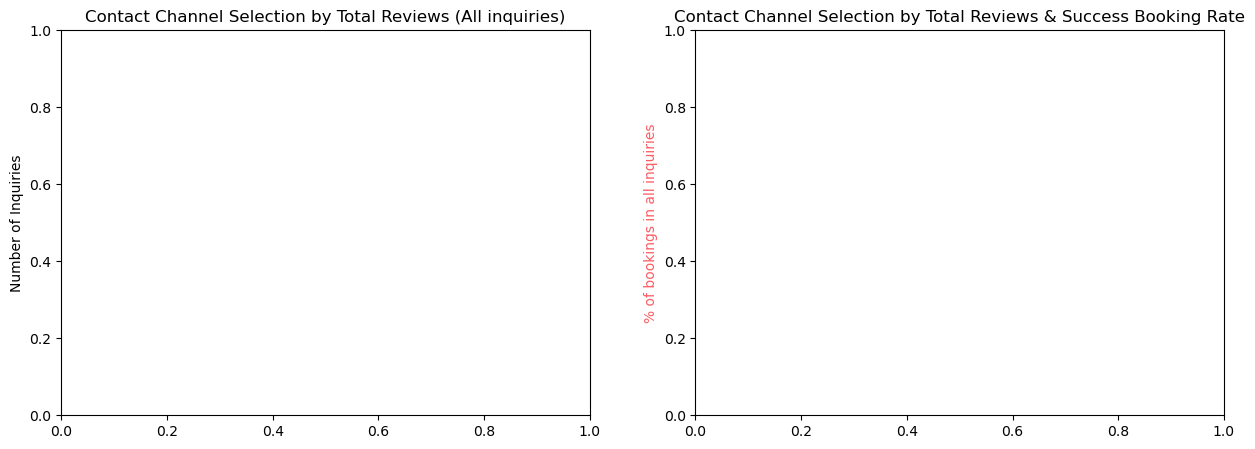

In [44]:
fig, axs = plt.subplots(ncols=2,figsize=(15,5))
axs[0].set_title('Contact Channel Selection by Total Reviews (All inquiries)')
axs[0].set_ylabel('Number of Inquiries')
axs[1].set_title('Contact Channel Selection by Total Reviews & Success Booking Rate')
axs[1].set_ylabel('% of bookings in all inquiries')
axs[1].yaxis.label.set_color('#FD5C64') 

df_plot = df.groupby(['contact_channel_first', 'Number_of_total_reviews']).size().reset_index().pivot(columns='contact_channel_first', index='Number_of_total_reviews', values=0)
df_plot.plot(kind='bar', stacked=True, color=['#FC642D','#00A699','#484848'],legend=False, ax=axs[0])

ax=sns.lineplot(data=df, x="Number_of_total_reviews", y="Booked", hue="contact_channel_first",markers=True, style="contact_channel_first",palette=['#00A699','#FC642D','#484848'],ax=axs[1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

##### msg length

In [141]:
df['message_length'] =pd.cut(df['m_first_message_length_in_characters'],bins=[0,100,200,300,400,500,2341],labels=['<100','100-199','200-299','300-399','400-499','>500'])

Text(0.5, 1.0, 'Message Length by Contact Channel (All inquiries)')

Text(0, 0.5, 'Number of Inquiries')

Text(0.5, 1.0, 'Message Length by Contact Channel & Success Booking Rate')

Text(0, 0.5, '% of bookings in all inquiries')

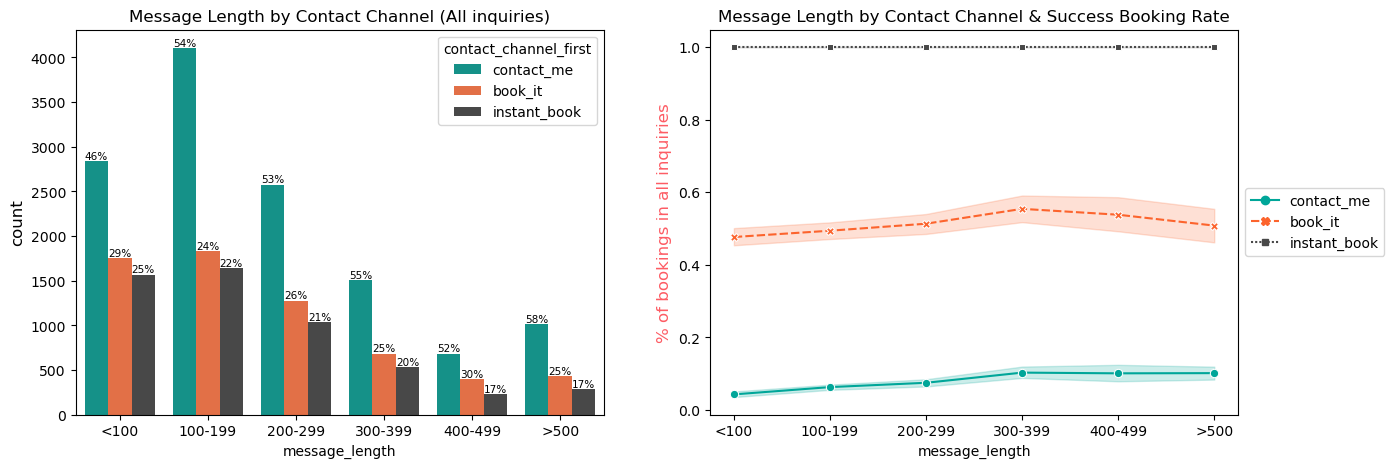

In [297]:
fig, axs = plt.subplots(ncols=2,figsize=(15,5))
axs[0].set_title('Message Length by Contact Channel (All inquiries)')
axs[0].set_ylabel('Number of Inquiries', fontsize=12)
axs[1].set_title('Message Length by Contact Channel & Success Booking Rate')
axs[1].set_ylabel('% of bookings in all inquiries', fontsize=12)
axs[1].yaxis.label.set_color('#FD5C64') 

ax=sns.countplot(x='message_length',hue='contact_channel_first',data=df,palette=['#00A699','#FC642D','#484848'], ax=axs[0])
barPerc(df,'message_length',ax)

ax=sns.lineplot(data=df, x="message_length", y="Booked", hue="contact_channel_first",markers=True, style="contact_channel_first",palette=['#00A699','#FC642D','#484848'],ax=axs[1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [144]:
a=df.groupby(['message_length']).count()
a

,id_host_anon,country_host,words_in_host_profile,id,id_guest_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first,room_type,listing_neighborhood,total_reviews,country_guest,words_in_guest_profile,Booked,Accepted,Replied,Lead_Time,Group_Size,length_of_stay,Number_of_total_reviews,Number_of_interactions
message_length,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
<100,6161,6161,6161,6161,6161,6161,6161,5687,3600,2525,6161,6161,6161,6161,6161,6161,6152,6161,3435,6161,6160,6161,6161,6161,6161,5860,6161,6161,3927,6161
100-199,7578,7578,7578,7578,7578,7578,7578,7023,4235,2803,7578,7578,7578,7578,7578,7578,7571,7578,4323,7578,7578,7578,7578,7578,7578,7262,7578,7578,4912,7578
200-299,4882,4882,4882,4882,4882,4882,4882,4544,2778,1880,4882,4882,4882,4882,4882,4882,4874,4882,2851,4882,4882,4882,4882,4882,4882,4692,4882,4882,3261,4882
300-399,2722,2722,2722,2722,2722,2722,2722,2542,1613,1068,2722,2722,2722,2722,2722,2722,2720,2722,1585,2722,2722,2722,2722,2722,2722,2636,2722,2722,1815,2722
400-499,1305,1305,1305,1305,1305,1305,1305,1226,744,509,1305,1305,1305,1305,1305,1305,1305,1305,760,1305,1305,1305,1305,1305,1305,1251,1305,1305,867,1305
>500,1734,1734,1734,1734,1734,1734,1734,1615,944,610,1734,1734,1734,1734,1734,1734,1732,1734,1029,1734,1734,1734,1734,1734,1734,1697,1734,1734,1177,1734


In [142]:
a=df.groupby(['message_length','contact_channel_first'])['Booked'].mean()
a

message_length  contact_channel_first
<100            book_it                  0.476651
                contact_me               0.042973
                instant_book             1.000000
100-199         book_it                  0.494002
                contact_me               0.063078
                instant_book             1.000000
200-299         book_it                  0.513323
                contact_me               0.074981
                instant_book             1.000000
300-399         book_it                  0.554252
                contact_me               0.102990
                instant_book             1.000000
400-499         book_it                  0.538071
                contact_me               0.101025
                instant_book             1.000000
>500            book_it                  0.508083
                contact_me               0.101578
                instant_book             1.000000
Name: Booked, dtype: float64

## Mosaic Plot

In [188]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

In [278]:
corrMatrix = df.corr()
corrMatrix.style.background_gradient(cmap='coolwarm')

,words_in_host_profile,id,m_guests,m_interactions,m_first_message_length_in_characters,total_reviews,words_in_guest_profile,Booked,Accepted,Replied
words_in_host_profile,1.000000,-0.004670,-0.030159,0.067185,0.019697,0.205407,0.024706,0.106511,0.097591,0.061083
id,-0.004670,1.000000,-0.003030,0.003586,0.010222,0.012457,0.000481,0.004957,0.006949,0.001747
m_guests,-0.030159,-0.003030,1.000000,-0.036795,-0.027971,-0.115648,-0.086699,-0.127728,-0.090112,-0.028459
m_interactions,0.067185,0.003586,-0.036795,1.000000,0.006725,0.105879,0.028138,0.413655,0.358206,0.190928
m_first_message_length_in_characters,0.019697,0.010222,-0.027971,0.006725,1.000000,0.012576,0.143688,-0.104799,-0.051025,0.014139
total_reviews,0.205407,0.012457,-0.115648,0.105879,0.012576,1.000000,0.043620,0.291110,0.264559,0.116929
words_in_guest_profile,0.024706,0.000481,-0.086699,0.028138,0.143688,0.043620,1.000000,0.060713,0.032380,0.008573
Booked,0.106511,0.004957,-0.127728,0.413655,-0.104799,0.291110,0.060713,1.000000,0.718397,0.240897
Accepted,0.097591,0.006949,-0.090112,0.358206,-0.051025,0.264559,0.032380,0.718397,1.000000,0.335326
Replied,0.061083,0.001747,-0.028459,0.190928,0.014139,0.116929,0.008573,0.240897,0.335326,1.000000


In [211]:
mdf=df[(df['contact_channel_first'] == 'book_it')|(df['contact_channel_first'] == 'contact_me')]
mdf.head()

,id_host_anon,country_host,words_in_host_profile,id,id_guest_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first,room_type,listing_neighborhood,total_reviews,country_guest,words_in_guest_profile,Booked,Accepted,Replied,Lead_Time,Group_Size,length_of_stay,Number_of_total_reviews,Number_of_interactions,message_length,response_time
0,55abeba0-18ef-4c58-80f4-3c278b706aca,BR,1,6803,a538ef99-ac40-481c-84f6-6edd8538bc17,bc6e220b-397f-4063-a6d1-e40e3e6b7209,2016-06-07 18:16:00,2016-06-08 13:24:46,2016-06-08 13:24:46,NaT,2016-12-30,2017-01-02,2.0,3,45.0,contact_me,past_booker,Entire home/apt,NaN,0.0,BR,0,0,1,1,> 15,1-2,2-4 Days,NaN,0-10,<100,NaN
1,01942bba-4f2a-4592-bd96-6c0eda4f828a,BR,182,19075,a538ef99-ac40-481c-84f6-6edd8538bc17,04999d40-c22a-4338-8f9f-51aa14366b7b,2016-06-07 20:14:43,2016-06-07 20:56:54,2016-06-07 20:59:20,NaT,2016-12-30,2017-01-02,2.0,4,48.0,contact_me,past_booker,Entire home/apt,NaN,10.0,BR,0,0,1,1,> 15,1-2,2-4 Days,0-9,0-10,<100,<60 mins
2,55abeba0-18ef-4c58-80f4-3c278b706aca,BR,1,19358,5246d8be-9a4a-4d7b-82b3-d34ec350582a,bc6e220b-397f-4063-a6d1-e40e3e6b7209,2016-05-20 17:00:37,2016-05-20 17:19:15,2016-05-20 17:23:20,NaT,2016-06-04,2016-07-09,1.0,8,170.0,contact_me,new,Entire home/apt,NaN,0.0,BR,0,0,1,1,<=2,1-2,11+ Days,NaN,0-10,100-199,<60 mins
3,8611da94-f6df-4ad1-ad8b-c0cee2939581,BR,25,14796,5246d8be-9a4a-4d7b-82b3-d34ec350582a,c33bd587-d6c3-489e-b37e-f108a5f38705,2016-05-21 22:39:40,2016-05-22 00:58:13,NaT,NaT,2016-06-04,2016-07-08,1.0,18,128.0,contact_me,new,Entire home/apt,NaN,4.0,BR,0,0,0,1,<=2,1-2,11+ Days,0-9,11-20,100-199,120-179 mins
4,5d62d35a-7d6d-45dd-ae9b-a5d2f82a7d7b,BR,98,17919,767749be-227f-438f-bf95-e58bf1c53a43,5cdca497-2062-4dc3-a672-ffdc35111b7a,2016-01-11 14:04:18,2016-01-12 12:30:32,NaT,NaT,2016-08-15,2016-08-21,6.0,2,322.0,contact_me,new,Entire home/apt,Copacabana,1.0,BR,0,0,0,1,> 15,6-9,5-7 Days,0-9,0-10,300-399,NaN


### Group size & lead time

In [216]:
a=mdf.groupby(['Group_Size', 'Lead_Time'])['Booked'].mean()
a

Group_Size  Lead_Time
1-2         <=2          0.354939
            3-4          0.280467
            5-6          0.288481
            7-8          0.315175
            9-10         0.287066
            11-12        0.233716
            13-14        0.219758
            > 15         0.159917
3-5         <=2          0.337662
            3-4          0.218919
            5-6          0.244898
            7-8          0.270531
            9-10         0.194712
            11-12        0.245399
            13-14        0.158103
            > 15         0.152090
6-9         <=2          0.269608
            3-4          0.132979
            5-6          0.156951
            7-8          0.228571
            9-10         0.266667
            11-12        0.162162
            13-14        0.158730
            > 15         0.098240
10+         <=2          0.260870
            3-4          0.189189
            5-6          0.113636
            7-8          0.142857
            9-10         0

(<Figure size 2000x1000 with 3 Axes>,
 {('1-2', '<=2', '0'): (0.0, 0.0, 0.359480932535231, 0.26053055462941715),
  ('1-2', '<=2', '1'): (0.361957742653332,
   0.0,
   0.19780134403750146,
   0.26053055462941715),
  ('1-2', '3-4', '0'): (0.0,
   0.2668999813810095,
   0.4009827399045871,
   0.14589386309412983),
  ('1-2', '3-4', '1'): (0.4034595500226882,
   0.2668999813810095,
   0.15629953666814533,
   0.14589386309412983),
  ('1-2', '5-6', '0'): (0.0,
   0.4191632712267317,
   0.39651684918222957,
   0.07964489688110256),
  ('1-2', '5-6', '1'): (0.3989936593003307,
   0.4191632712267317,
   0.16076542739050287,
   0.07964489688110256),
  ('1-2', '7-8', '0'): (0.0,
   0.5051775948594266,
   0.3816407808435833,
   0.06259553057627948),
  ('1-2', '7-8', '1'): (0.3841175909616844,
   0.5051775948594266,
   0.17564149572914914,
   0.06259553057627948),
  ('1-2', '9-10', '0'): (0.0,
   0.5741425521872984,
   0.39730534544302065,
   0.051472848748847076),
  ('1-2', '9-10', '1'): (0.39978215

Text(0.5, -0.1, 'Group Size')

Text(-0.1, 0.5, 'Lead Time')

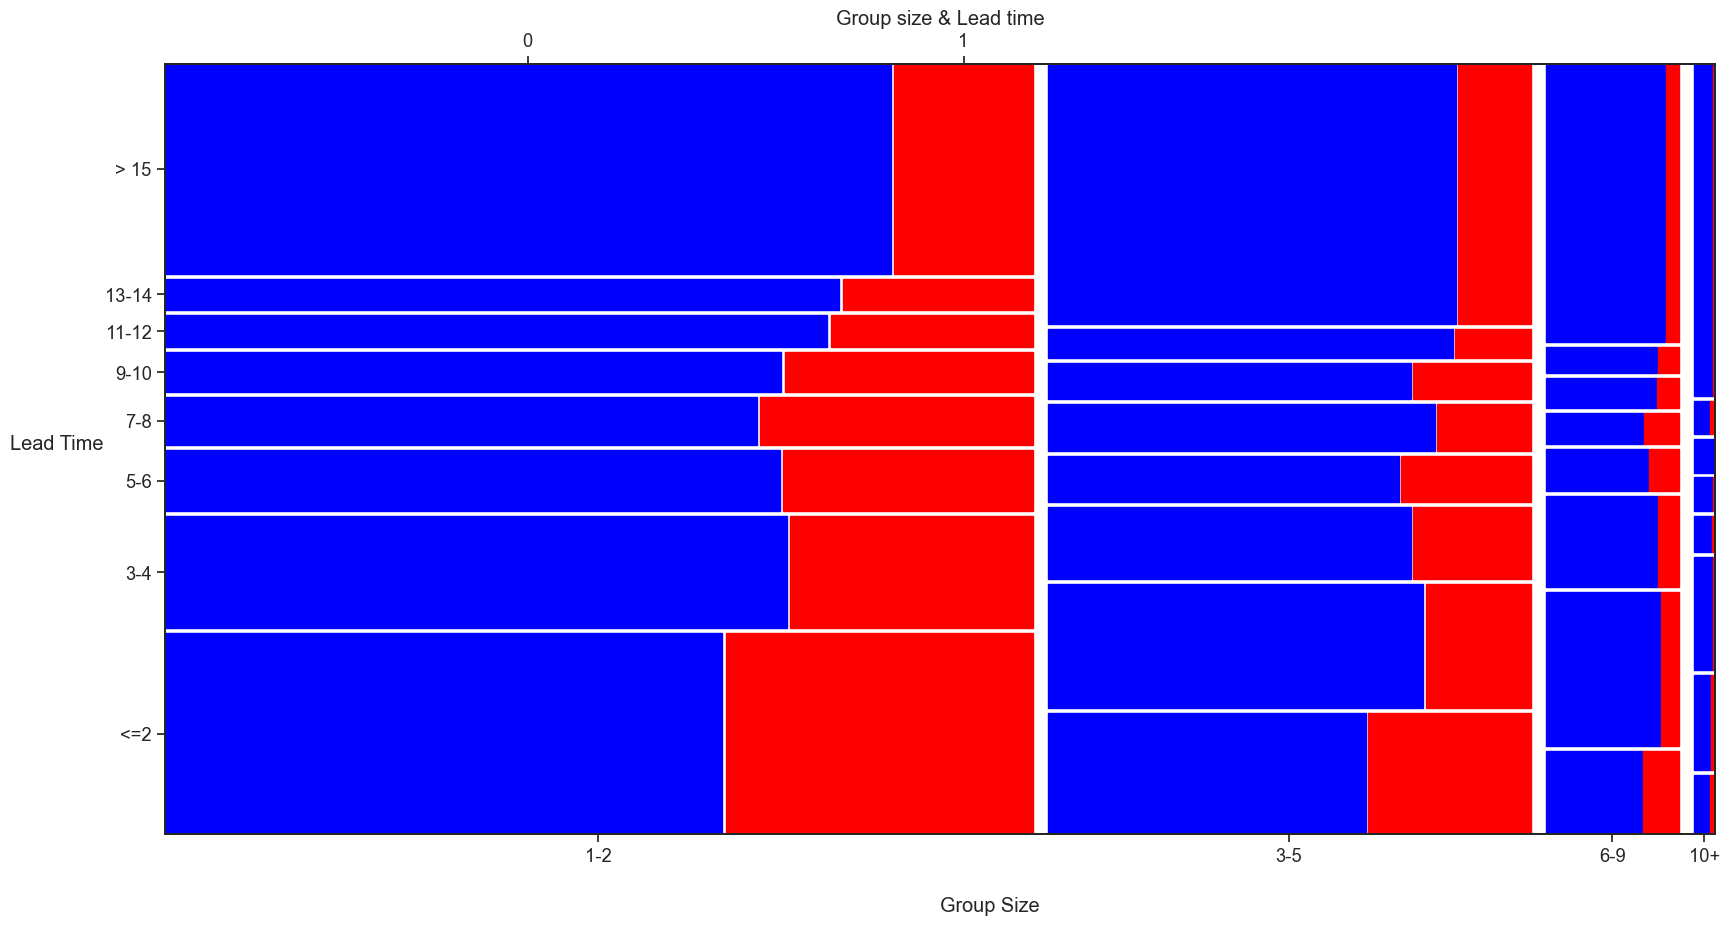

In [206]:
props = lambda key: {'color': 'red' if '1' in key else 'blue'}
mosaic(mdf, ['Group_Size', 'Lead_Time', 'Booked'],gap=0.01,labelizer=lambda k: '', title='Group size & Lead time', properties=props)

plt.text(0.5,-0.1,'Group Size')
plt.text(-0.1,0.5,'Lead Time')
plt.show()

### Group size & # of interactions

In [221]:
a=mdf.groupby(['Group_Size', 'Number_of_interactions'])['Booked'].mean()
a

Group_Size  Number_of_interactions
1-2         0-10                      0.160775
            11-20                     0.709114
            21-30                     0.814815
            31-40                     0.751553
            41-50                     0.888889
            >50                       0.829268
3-5         0-10                      0.113570
            11-20                     0.640992
            21-30                     0.790514
            31-40                     0.870968
            41-50                     0.829268
            >50                       0.740000
6-9         0-10                      0.067183
            11-20                     0.555556
            21-30                     0.666667
            31-40                     0.809524
            41-50                     0.857143
            >50                       0.727273
10+         0-10                      0.029787
            11-20                     0.424242
            21-30        

(<Figure size 2000x1000 with 3 Axes>,
 {('1-2', '0-10', '0'): (0.0, 0.0, 0.47301935832332453, 0.7836687154223295),
  ('1-2', '0-10', '1'): (0.4755244182306191,
   0.0,
   0.09061912081795408,
   0.7836687154223295),
  ('1-2', '11-20', '0'): (0.0,
   0.7901203283255555,
   0.1639543087353429,
   0.12174487876665428),
  ('1-2', '11-20', '1'): (0.16645936864263747,
   0.7901203283255555,
   0.3996841704059358,
   0.12174487876665428),
  ('1-2', '21-30', '0'): (0.0,
   0.9183168199954355,
   0.1043774961372738,
   0.038246936703680734),
  ('1-2', '21-30', '1'): (0.10688255604456838,
   0.9183168199954355,
   0.4592609830040048,
   0.038246936703680734),
  ('1-2', '31-40', '0'): (0.0,
   0.963015369602342,
   0.14003440475559717,
   0.012670281500602005),
  ('1-2', '31-40', '1'): (0.14253946466289175,
   0.963015369602342,
   0.42360407438568143,
   0.012670281500602005),
  ('1-2', '41-50', '0'): (0.0,
   0.9821372640061699,
   0.06262649768236428,
   0.004957936239365983),
  ('1-2', '41-50

Text(0.5, -0.1, 'Group Size')

Text(-0.2, 0.5, 'Number of interactions')

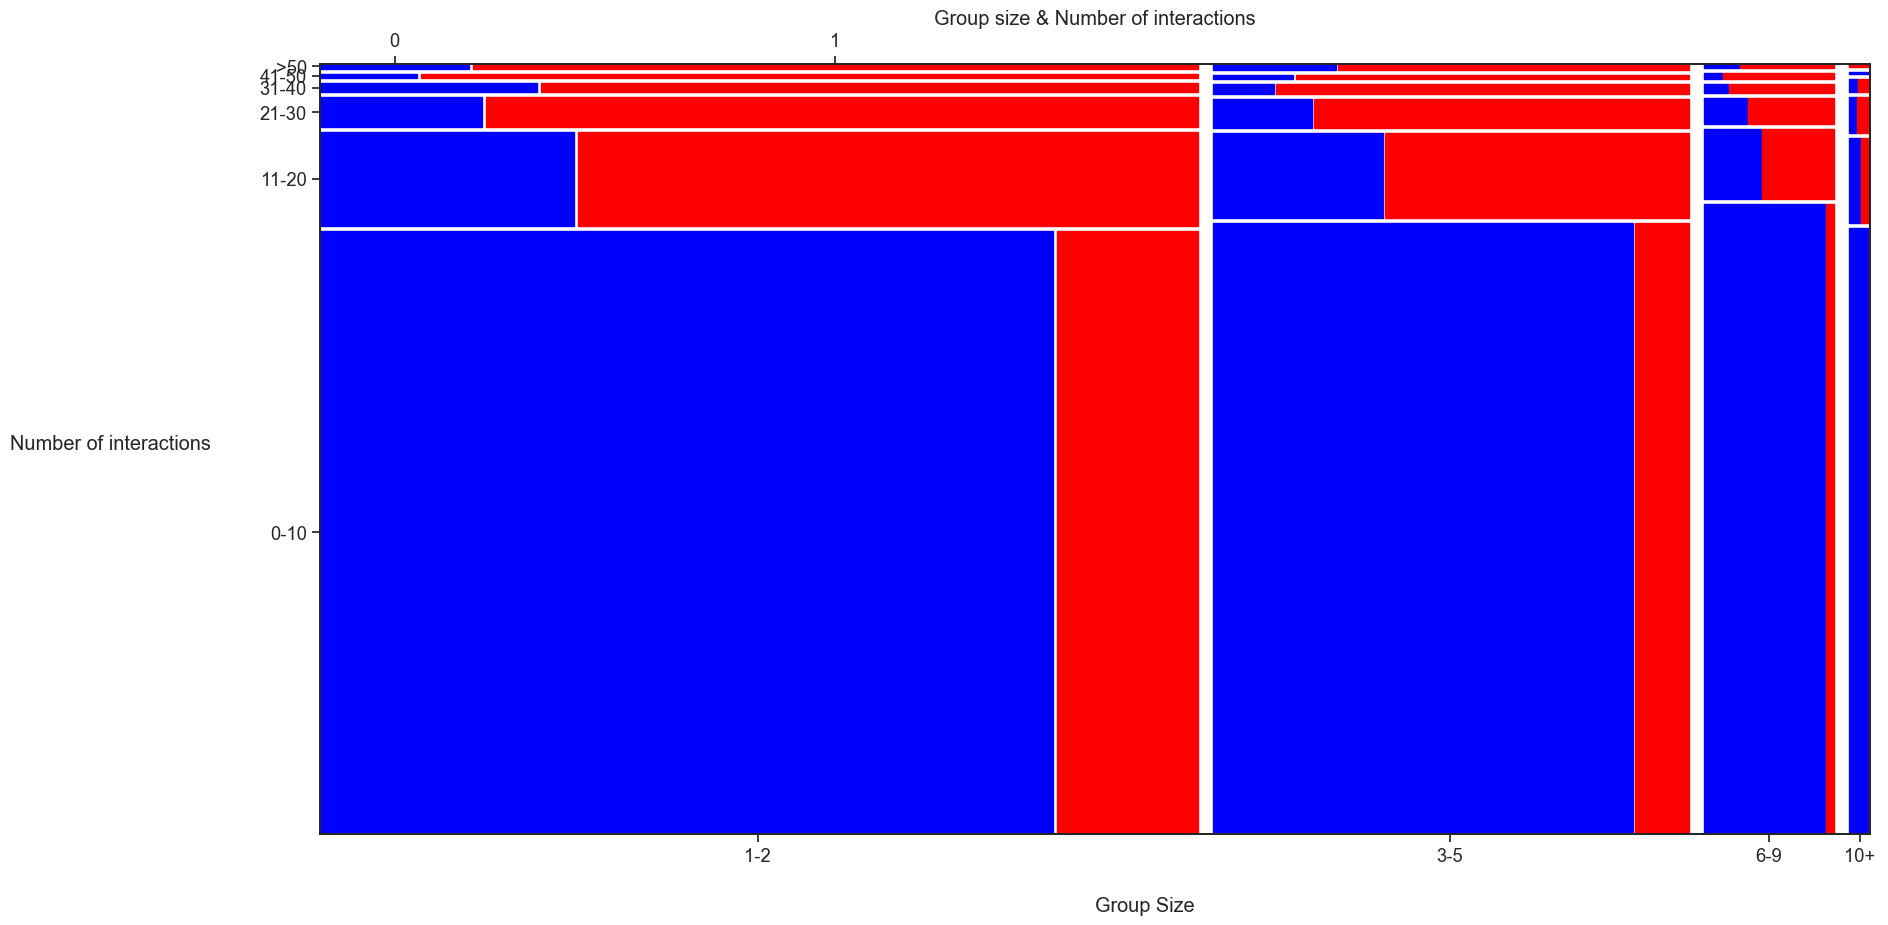

In [220]:
props = lambda key: {'color': 'red' if '1' in key else 'blue'}
mosaic(mdf, ['Group_Size', 'Number_of_interactions', 'Booked'],gap=0.01,labelizer=lambda k: '', title='Group size & Number of interactions', properties=props)

plt.text(0.5,-0.1,'Group Size')
plt.text(-0.2,0.5,'Number of interactions')
plt.show()

### Group size & msg length

In [222]:
a=mdf.groupby(['Group_Size', 'message_length'])['Booked'].mean()
a

Group_Size  message_length
1-2         <100              0.241231
            100-199           0.224349
            200-299           0.250447
            300-399           0.264881
            400-499           0.276827
            >500              0.233998
3-5         <100              0.174655
            100-199           0.174858
            200-299           0.198052
            300-399           0.226727
            400-499           0.276730
            >500              0.214854
6-9         <100              0.150115
            100-199           0.126761
            200-299           0.121662
            300-399           0.154839
            400-499           0.117647
            >500              0.159574
10+         <100              0.123288
            100-199           0.052083
            200-299           0.066667
            300-399           0.090909
            400-499           0.214286
            >500              0.173913
Name: Booked, dtype: float64

(<Figure size 2000x1000 with 3 Axes>,
 {('1-2', '<100', '0'): (0.0, 0.0, 0.4257350880941944, 0.22401676197127768),
  ('1-2', '<100', '1'): (0.4282288077450526,
   0.0,
   0.13535183334889897,
   0.22401676197127768),
  ('1-2', '100-199', '0'): (0.0,
   0.23046837487450347,
   0.4352074146879872,
   0.29185036448557333),
  ('1-2', '100-199', '1'): (0.4377011343388454,
   0.23046837487450347,
   0.1258795067551062,
   0.29185036448557333),
  ('1-2', '200-299', '0'): (0.0,
   0.5287703522633026,
   0.42056425775430434,
   0.19520712383779307),
  ('1-2', '200-299', '1'): (0.42305797740516254,
   0.5287703522633026,
   0.14052266368878902,
   0.19520712383779307),
  ('1-2', '300-399', '0'): (0.0,
   0.7304290890043216,
   0.4124656833227502,
   0.1173337989436466),
  ('1-2', '300-399', '1'): (0.4149594029736084,
   0.7304290890043216,
   0.14862123812034314,
   0.1173337989436466),
  ('1-2', '400-499', '0'): (0.0,
   0.8542145008511939,
   0.4057627036874625,
   0.05613514339342619),
  ('1-

Text(0.5, -0.1, 'Group Size')

Text(-0.15, 0.5, 'Message Length')

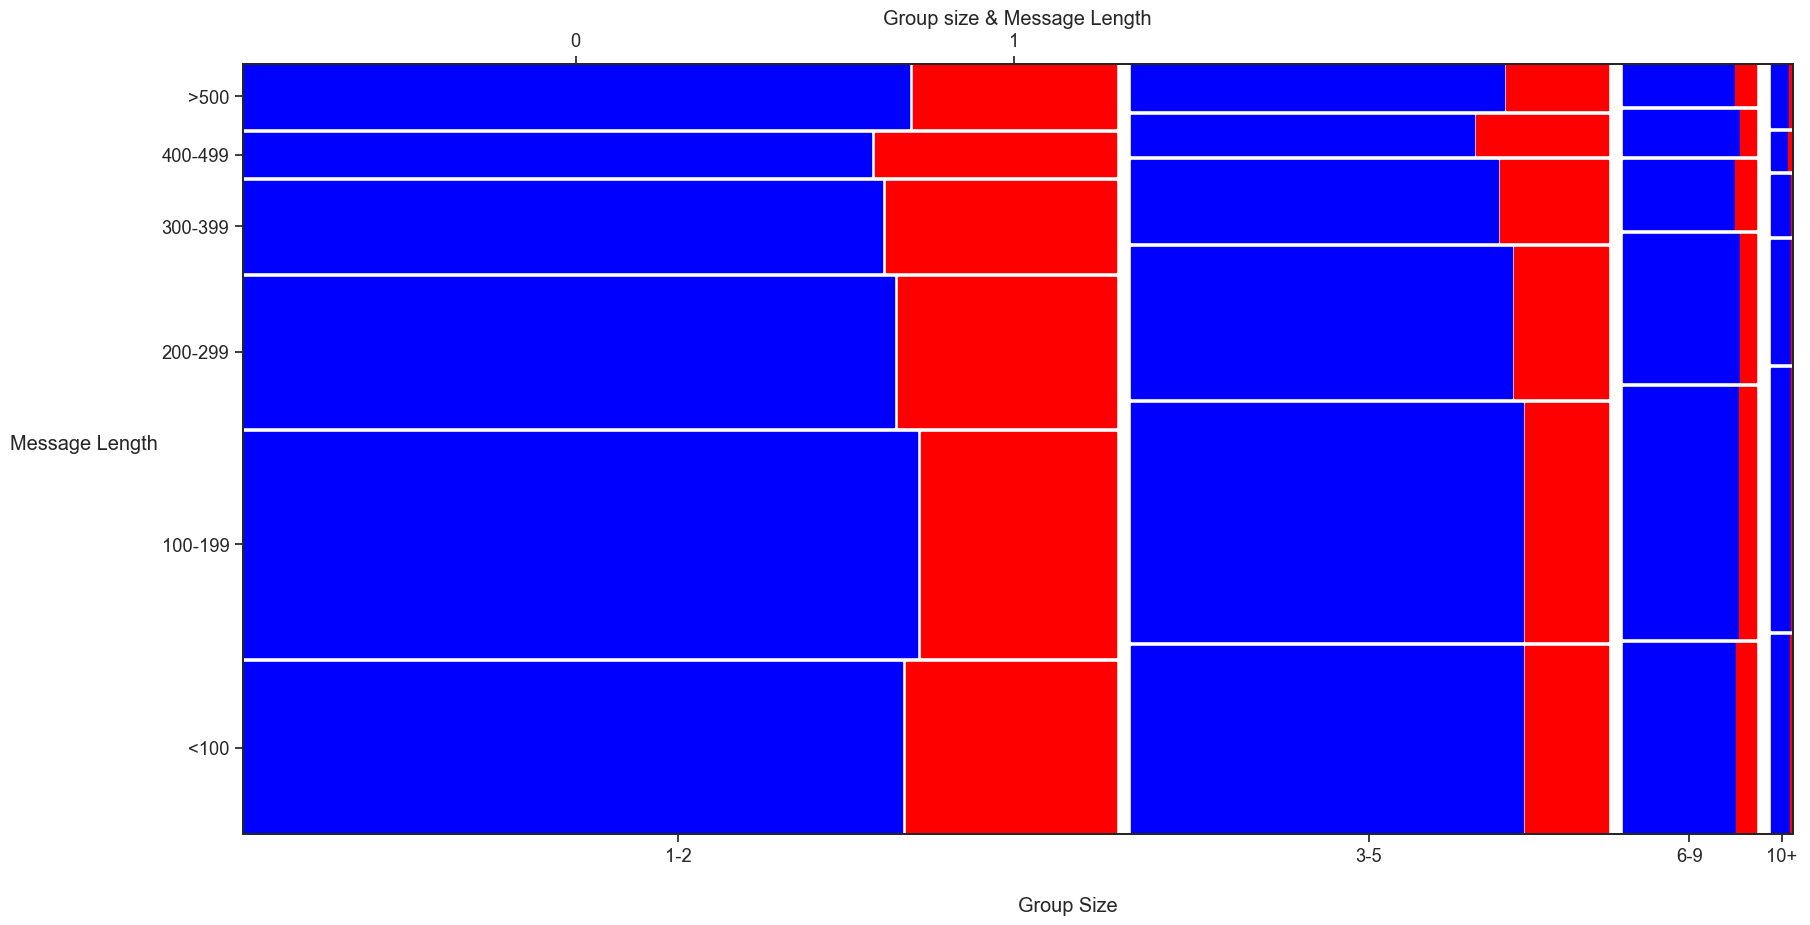

In [239]:
props = lambda key: {'color': 'red' if '1' in key else 'blue'}
mosaic(mdf, ['Group_Size', 'message_length', 'Booked'],gap=0.01,labelizer=lambda k: '', title='Group size & Message Length', properties=props)

plt.text(0.5,-0.1,'Group Size')
plt.text(-0.15,0.5,'Message Length')
plt.show()

### Length of stay & lead time

In [227]:
a=mdf.groupby(['length_of_stay', 'Lead_Time'])['Booked'].mean()
a

length_of_stay  Lead_Time
1 Day           <=2          0.370460
                3-4          0.239669
                5-6          0.200000
                7-8          0.222222
                9-10         0.200000
                11-12        0.235294
                13-14        0.171429
                > 15         0.155660
2-4 Days        <=2          0.368664
                3-4          0.265029
                5-6          0.281657
                7-8          0.348708
                9-10         0.319372
                11-12        0.286119
                13-14        0.202091
                > 15         0.171414
5-7 Days        <=2          0.368421
                3-4          0.215166
                5-6          0.246654
                7-8          0.346429
                9-10         0.306452
                11-12        0.167347
                13-14        0.201183
                > 15         0.155243
8-10 Days       <=2          0.294702
                3-4     

(<Figure size 2000x1000 with 3 Axes>,
 {('1 Day ', '<=2', '0'): (0.0,
   0.0,
   0.029289464087725644,
   0.39776813231970415),
  ('1 Day ', '<=2', '1'): (0.02949624269743899,
   0.0,
   0.017235723097777014,
   0.39776813231970415),
  ('1 Day ', '3-4', '0'): (0.0,
   0.4041375590712965,
   0.03537452248815078,
   0.11653739469899325),
  ('1 Day ', '3-4', '1'): (0.03558130109786413,
   0.4041375590712965,
   0.011150664697351875,
   0.11653739469899325),
  ('1 Day ', '5-6', '0'): (0.0,
   0.5270443805218821,
   0.037220149748402126,
   0.0529715430449969),
  ('1 Day ', '5-6', '1'): (0.03742692835811547,
   0.5270443805218821,
   0.00930503743710053,
   0.0529715430449969),
  ('1 Day ', '7-8', '0'): (0.0,
   0.5863853503184714,
   0.0361862566998354,
   0.06934456544072329),
  ('1 Day ', '7-8', '1'): (0.036393035309548745,
   0.5863853503184714,
   0.010338930485667256,
   0.06934456544072329),
  ('1 Day ', '9-10', '0'): (0.0,
   0.662099342510787,
   0.037220149748402126,
   0.04815594

Text(0.5, -0.2, 'Length of stay')

Text(-0.1, 0.5, 'Lead Time')

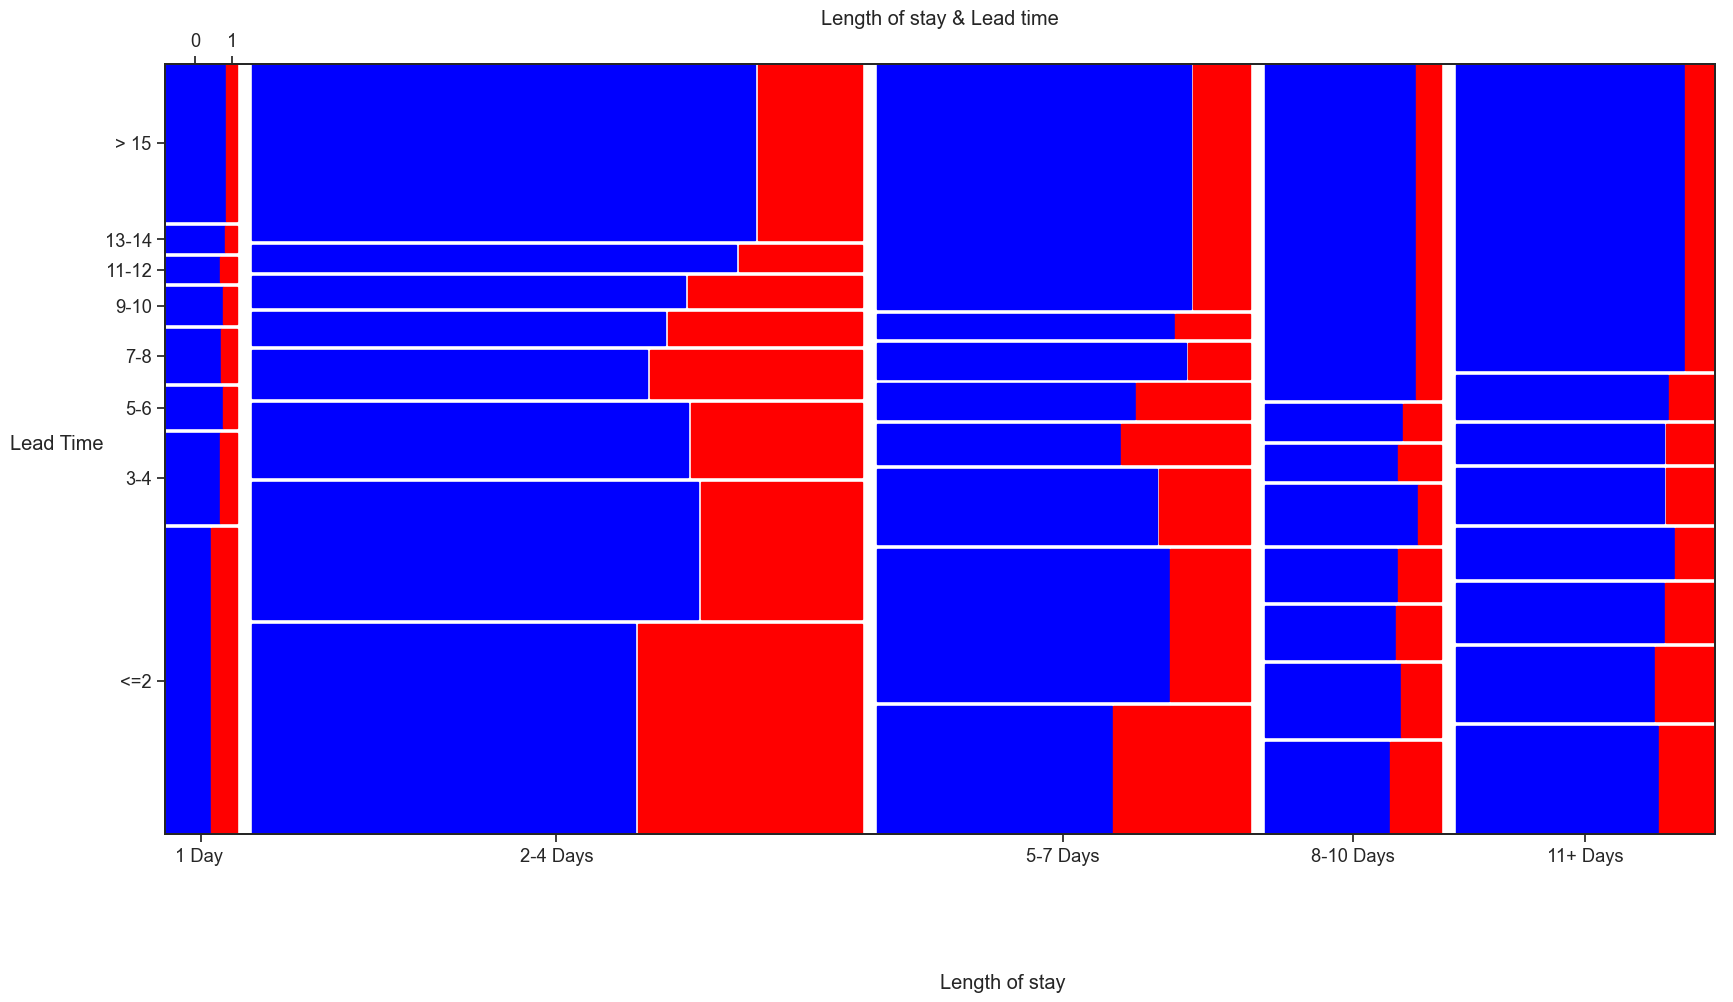

In [235]:
props = lambda key: {'color': 'red' if '1' in key else 'blue'}
mosaic(mdf, ['length_of_stay', 'Lead_Time', 'Booked'],gap=0.01,labelizer=lambda k: '', title='Length of stay & Lead time', properties=props)

plt.text(0.5,-0.2,'Length of stay')
plt.text(-0.1,0.5,'Lead Time')
plt.show()

### Length of stay & number of interactions

In [233]:
a=mdf.groupby(['contact_channel_first','length_of_stay', 'Number_of_interactions'])['Booked'].mean()
a

contact_channel_first  length_of_stay  Number_of_interactions
book_it                1 Day           0-10                      0.367865
                                       11-20                     0.914286
                                       21-30                     0.944444
                                       31-40                     1.000000
                                       41-50                     1.000000
                                       >50                       1.000000
                       2-4 Days        0-10                      0.396253
                                       11-20                     0.903614
                                       21-30                     0.935185
                                       31-40                     0.981481
                                       41-50                     0.925926
                                       >50                       0.875000
                       5-7 Days        0-10       

(<Figure size 2000x1000 with 3 Axes>,
 {('1 Day ', '0-10', '0'): (0.0, 0.0, 0.03961349742188543, 0.8261863073864141),
  ('1 Day ', '0-10', '1'): (0.03983280436063269,
   0.0,
   0.009730563796248365,
   0.8261863073864141),
  ('1 Day ', '11-20', '0'): (0.0,
   0.8326379202896399,
   0.014217780350987702,
   0.10505386236163464),
  ('1 Day ', '11-20', '1'): (0.014437087289734963,
   0.8326379202896399,
   0.03512628086714609,
   0.10505386236163464),
  ('1 Day ', '21-30', '0'): (0.0,
   0.9441433955545003,
   0.008581575864023267,
   0.020476600290827),
  ('1 Day ', '21-30', '1'): (0.008800882802770528,
   0.9441433955545003,
   0.04076248535411052,
   0.020476600290827),
  ('1 Day ', '31-40', '0'): (0.0,
   0.9710716087485531,
   0.016448020406044594,
   0.008012582722497568),
  ('1 Day ', '31-40', '1'): (0.016667327344791857,
   0.9710716087485531,
   0.032896040812089196,
   0.008012582722497568),
  ('1 Day ', '41-50', '0'): (0.0,
   0.9855358043742766,
   0.0,
   0.00356114787666559

Text(0.5, -0.2, 'Length of stay')

Text(-0.2, 0.5, 'Number of interactions')

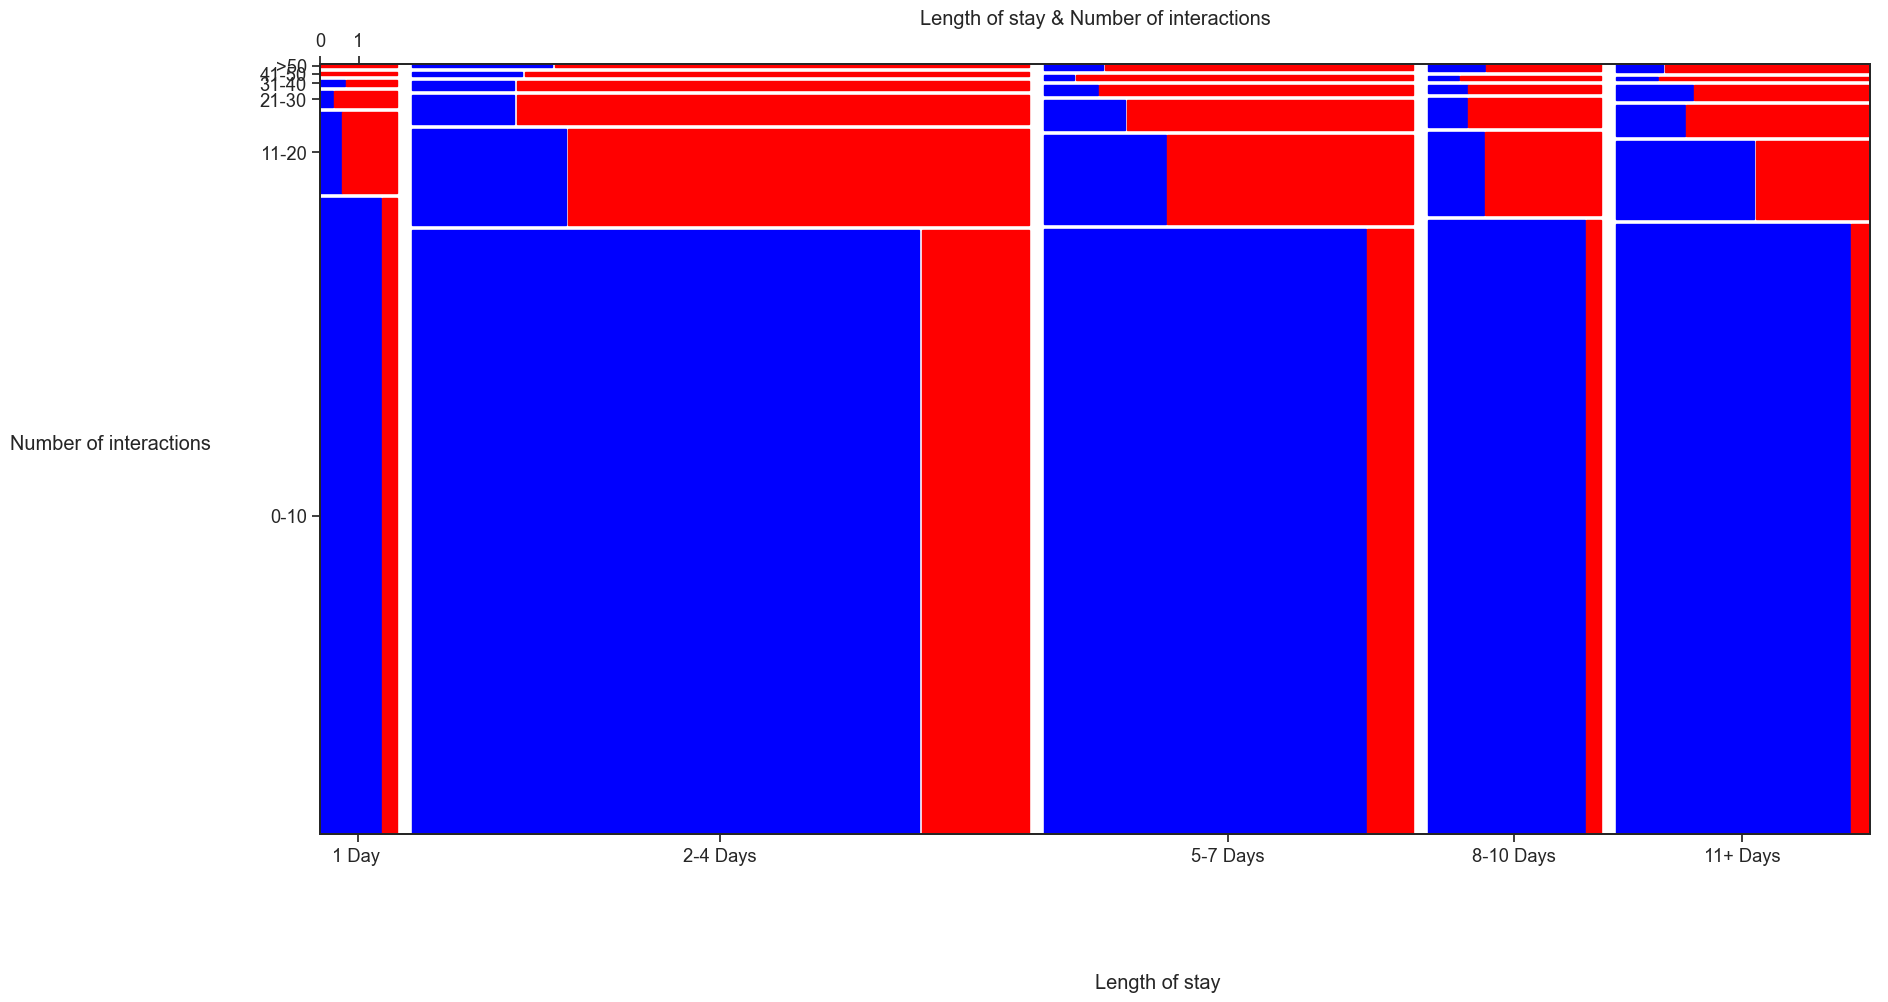

In [234]:
props = lambda key: {'color': 'red' if '1' in key else 'blue'}
mosaic(mdf, ['length_of_stay', 'Number_of_interactions', 'Booked'],gap=0.01,labelizer=lambda k: '', title='Length of stay & Number of interactions', properties=props)

plt.text(0.5,-0.2,'Length of stay')
plt.text(-0.2,0.5,'Number of interactions')
plt.show()

### length of stay & msg length

In [231]:
a=mdf.groupby(['length_of_stay', 'message_length'])['Booked'].mean()
a

length_of_stay  message_length
1 Day           <100              0.295276
                100-199           0.213439
                200-299           0.208092
                300-399           0.188034
                400-499           0.210526
                >500              0.121212
2-4 Days        <100              0.234216
                100-199           0.231016
                200-299           0.273585
                300-399           0.286236
                400-499           0.311170
                >500              0.252927
5-7 Days        <100              0.192405
                100-199           0.186792
                200-299           0.224490
                300-399           0.278293
                400-499           0.292857
                >500              0.274390
8-10 Days       <100              0.159533
                100-199           0.161429
                200-299           0.183486
                300-399           0.218254
                400-499

(<Figure size 2000x1000 with 3 Axes>,
 {('1 Day ', '<100', '0'): (0.0, 0.0, 0.031830425120463635, 0.272815151623644),
  ('1 Day ', '<100', '1'): (0.03203116821122956,
   0.0,
   0.013336770301870238,
   0.272815151623644),
  ('1 Day ', '100-199', '0'): (0.0,
   0.27926676452686977,
   0.03552676635985945,
   0.27174107622355087),
  ('1 Day ', '100-199', '1'): (0.03572750945062538,
   0.27926676452686977,
   0.009640429062474422,
   0.27174107622355087),
  ('1 Day ', '200-299', '0'): (0.0,
   0.5574594536536465,
   0.035768241461616994,
   0.1858150442161041),
  ('1 Day ', '200-299', '1'): (0.03596898455238293,
   0.5574594536536465,
   0.009398953960716876,
   0.1858150442161041),
  ('1 Day ', '300-399', '0'): (0.0,
   0.7497261107729765,
   0.03667421850531383,
   0.1256668218108911),
  ('1 Day ', '300-399', '1'): (0.03687496159607975,
   0.7497261107729765,
   0.008492976917020044,
   0.1256668218108911),
  ('1 Day ', '400-499', '0'): (0.0,
   0.8818445454870932,
   0.035658312175526

Text(0.5, -0.1, 'Length of stay')

Text(-0.15, 0.5, 'Message Length')

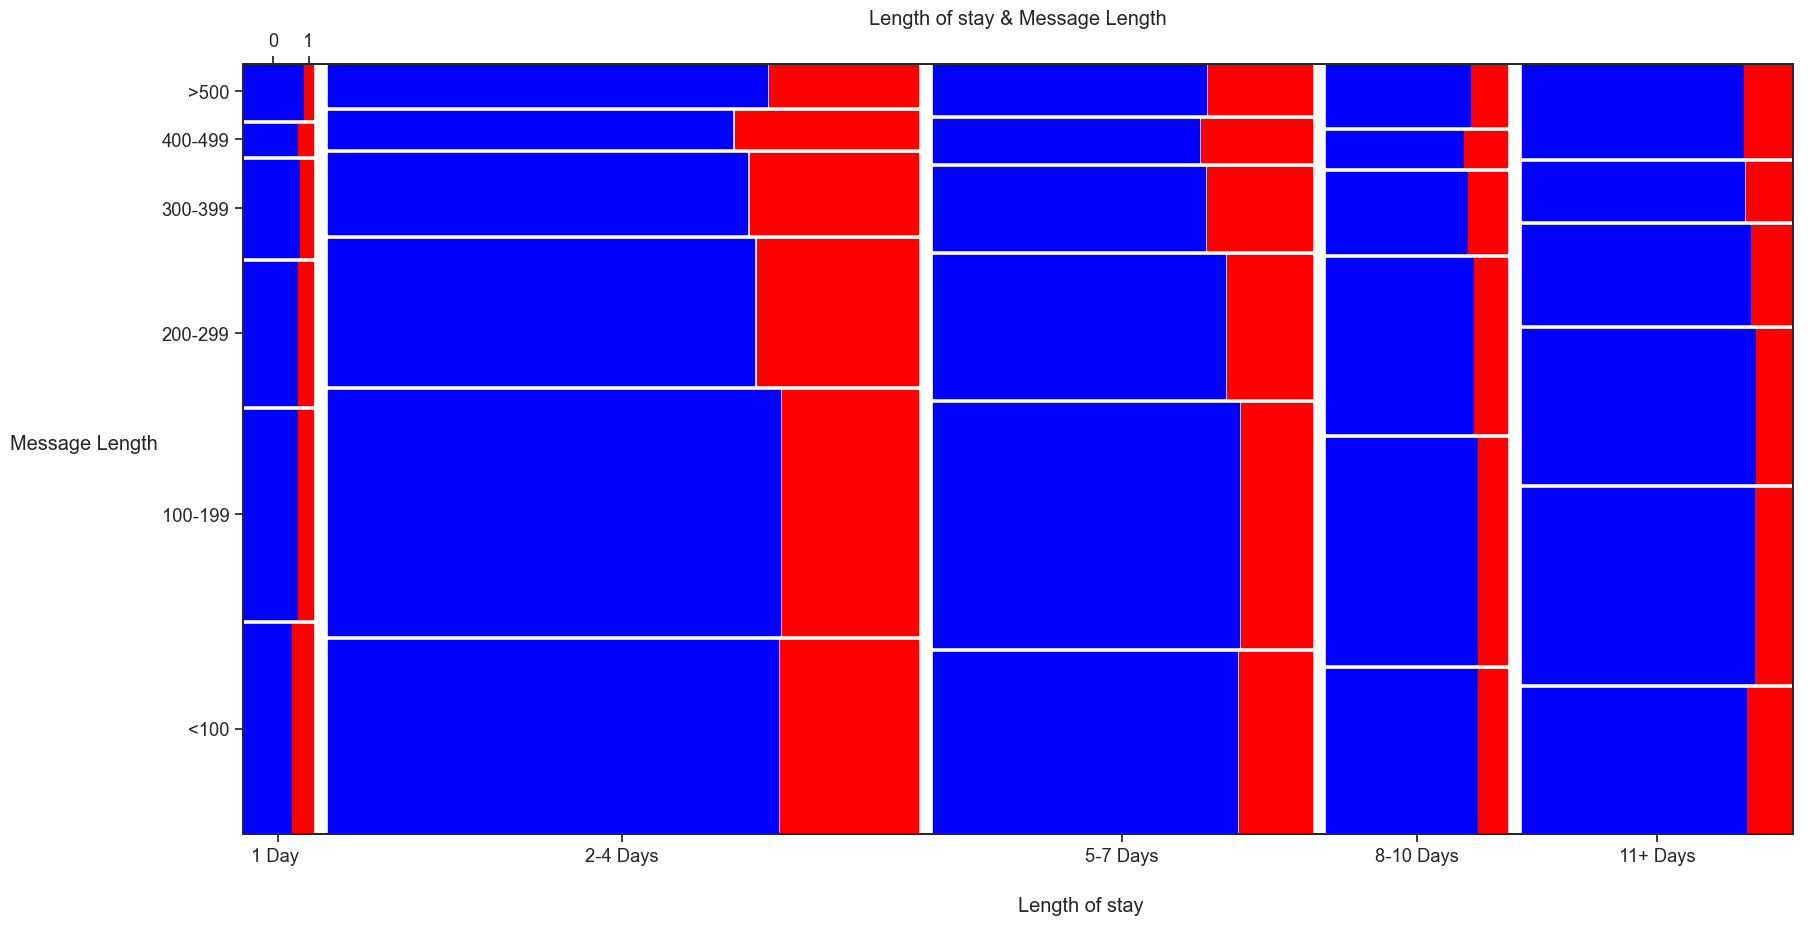

In [238]:
props = lambda key: {'color': 'red' if '1' in key else 'blue'}
mosaic(mdf, ['length_of_stay', 'message_length', 'Booked'],gap=0.01,labelizer=lambda k: '', title='Length of stay & Message Length', properties=props)

plt.text(0.5,-0.1,'Length of stay')
plt.text(-0.15,0.5,'Message Length')
plt.show()